In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel("/Users/adithyakatari/Documents/pallet optimization project/allot_.xlsx")
df.columns

Index(['POSTING DATE', 'EFFECTIVE DATE', 'CREATE DATE', 'Customer/Vendor Code',
       'Customer/Vendor Name', 'LOB', 'Region', 'BP TYPE', 'City', 'STATE',
       'From WhsCode', 'From WhsName', 'To whsCode', 'TO WhsName',
       'Model TYPE', 'Transfer Type', 'U_Frt', 'U_ActShipType',
       'PRODUCT CATEGORY', 'ItemCode', 'QUANTITY', 'UNIT', 'RATE', 'SO ID',
       'SO Creation Date', 'SO Due Date', 'U_DocStatus', 'NumAtCard',
       'U_SOTYPE', 'BP CATEGORY', 'Document Type', 'Vehicle Type',
       'Direct Dispatch', 'Comments', 'U_GRNNO', 'Loading/Unloading',
       'Detention', 'KITITEM', 'U_AssetClass'],
      dtype='object')

In [3]:
df['Customer/Vendor Name'].value_counts()

Customer/Vendor Name
Cart Services Pvt. Ltd. _ Kolkata _Bagnan                          87
Cart Services Pvt. Ltd. _ Coimbatore_ Selakarichal                 67
Cart Services Private Limited_Rewari_Khijuri                       63
Cart Services Private Limited_Bhiwandi_Saidham_G Whse_Unit 2       51
Cart Services Pvt. Ltd. _ Bangalore _Venkatapura Village  Malur    50
                                                                   ..
Cart Services Private Limited. _ Singur                             1
Cart Services Pvt. Ltd. _ Gurgaon _Katari Complex                   1
Cart Services Pvt. Ltd. _ Bangalore _Begur                          1
Cart Services Pvt Ltd _ Bhiwandi _ Bulkhub_BHI                      1
Cart Services Private Limited_Hyderabad_Medchal_Pudur               1
Name: count, Length: 143, dtype: int64

#Measure of central tendency

In [4]:
df.QUANTITY.mean()

300.8482932996207

In [5]:
df.QUANTITY.median()

300.0

In [6]:
df.Region.mode()

0    South
Name: Region, dtype: object

In [7]:
df.City.mode()#Bangalore

0    Bangalore
Name: City, dtype: object

In [8]:
df.STATE.mode()#Tamil Nadu

0    Tamil Nadu
Name: STATE, dtype: object

In [9]:
df['Model TYPE'].mode()#Allot

0    Allot
Name: Model TYPE, dtype: object

In [10]:
df['ItemCode'].mode()#A010000023

0    A010000023
Name: ItemCode, dtype: object

In [11]:
df.U_AssetClass.mode()#Wooden Pallet

0    Wooden Pallet
Name: U_AssetClass, dtype: object

#Measure of dispersion

In [12]:
df.QUANTITY.var()# 16330.032631493932

16330.032631494103

In [13]:
df.QUANTITY.std()#127.78901608312795

127.78901608312862

In [14]:
range_QUANTITY = max(df.QUANTITY) - min(df.QUANTITY) #range
range_QUANTITY# 539.0

539

In [15]:
df.QUANTITY.skew()#-0.007435640737894824

-0.007435640737894824

In [16]:
df.QUANTITY.kurt()#-0.8320066860803159

-0.8320066860803159

In [17]:
df=df.iloc[:,[1,20]]

In [18]:
df

EFFECTIVE DATE  QUANTITY
0        2019-12-06       200
1        2019-12-06       200
2        2019-12-20       200
3        2019-12-26       180
4        2019-12-26       326
...             ...       ...
1577     2022-11-19       500
1578     2022-11-21       490
1579     2022-11-22       200
1580     2022-11-26       200
1581     2022-11-26       200

[1582 rows x 2 columns]

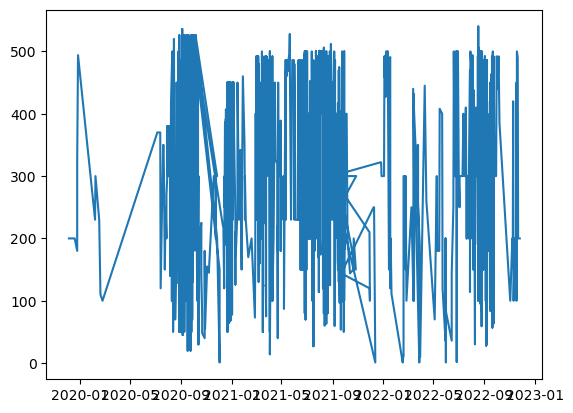

EFFECTIVE DATE    datetime64[ns]
QUANTITY                   int64
dtype: object

In [19]:
import matplotlib.pyplot as plt
plt.plot(df['EFFECTIVE DATE'], df.QUANTITY)
plt.show()
df.dtypes

In [20]:
f1=df.groupby(['EFFECTIVE DATE']).sum()

In [21]:
f1

QUANTITY
EFFECTIVE DATE          
2019-12-06           400
2019-12-20           200
2019-12-26           506
2019-12-28           494
2020-02-07           460
...                  ...
2022-11-18           550
2022-11-19           680
2022-11-21           490
2022-11-22           200
2022-11-26           400

[472 rows x 1 columns]

In [22]:
f1.index

DatetimeIndex(['2019-12-06', '2019-12-20', '2019-12-26', '2019-12-28',
               '2020-02-07', '2020-02-08', '2020-02-17', '2020-02-20',
               '2020-02-25', '2020-07-06',
               ...
               '2022-11-09', '2022-11-10', '2022-11-11', '2022-11-14',
               '2022-11-17', '2022-11-18', '2022-11-19', '2022-11-21',
               '2022-11-22', '2022-11-26'],
              dtype='datetime64[ns]', name='EFFECTIVE DATE', length=472, freq=None)

In [23]:
idx = pd.date_range(min(df['EFFECTIVE DATE']), max(df['EFFECTIVE DATE']))

In [24]:
idx

DatetimeIndex(['2019-12-06', '2019-12-07', '2019-12-08', '2019-12-09',
               '2019-12-10', '2019-12-11', '2019-12-12', '2019-12-13',
               '2019-12-14', '2019-12-15',
               ...
               '2022-11-17', '2022-11-18', '2022-11-19', '2022-11-20',
               '2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24',
               '2022-11-25', '2022-11-26'],
              dtype='datetime64[ns]', length=1087, freq='D')

In [25]:
f1 = f1.reindex(idx)

In [26]:
f1

QUANTITY
2019-12-06     400.0
2019-12-07       NaN
2019-12-08       NaN
2019-12-09       NaN
2019-12-10       NaN
...              ...
2022-11-22     200.0
2022-11-23       NaN
2022-11-24       NaN
2022-11-25       NaN
2022-11-26     400.0

[1087 rows x 1 columns]

In [27]:
f1=f1.resample('1W').sum()

In [28]:
f1

QUANTITY
2019-12-08     400.0
2019-12-15       0.0
2019-12-22     200.0
2019-12-29    1000.0
2020-01-05       0.0
...              ...
2022-10-30       0.0
2022-11-06     100.0
2022-11-13     875.0
2022-11-20    1600.0
2022-11-27    1090.0

[156 rows x 1 columns]

<Axes: >

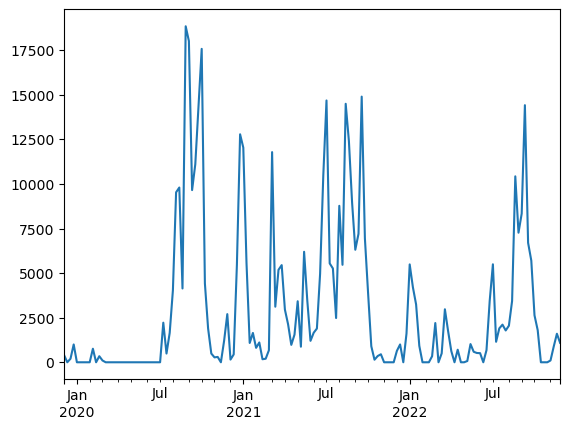

In [29]:
f1.QUANTITY.plot()

In [30]:
f1[f1['QUANTITY']==0.0]=np.nan

# Linear interpolation

In [31]:
f1

QUANTITY
2019-12-08     400.0
2019-12-15       NaN
2019-12-22     200.0
2019-12-29    1000.0
2020-01-05       NaN
...              ...
2022-10-30       NaN
2022-11-06     100.0
2022-11-13     875.0
2022-11-20    1600.0
2022-11-27    1090.0

[156 rows x 1 columns]

In [32]:
f1.dtypes

QUANTITY    float64
dtype: object

In [33]:
f1.dtypes

QUANTITY    float64
dtype: object

<Axes: >

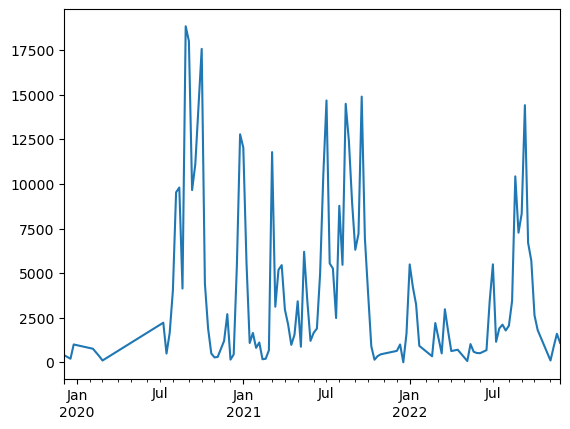

In [34]:
d1=pd.DataFrame()
d1 = f1.interpolate(method='linear')
d1.QUANTITY.plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x167743b60>,
 'caps': [<matplotlib.lines.Line2D at 0x167778050>,
 'boxes': [<matplotlib.lines.Line2D at 0x167743890>],
 'medians': [<matplotlib.lines.Line2D at 0x167778650>],
 'fliers': [<matplotlib.lines.Line2D at 0x167778950>],
 'means': []}

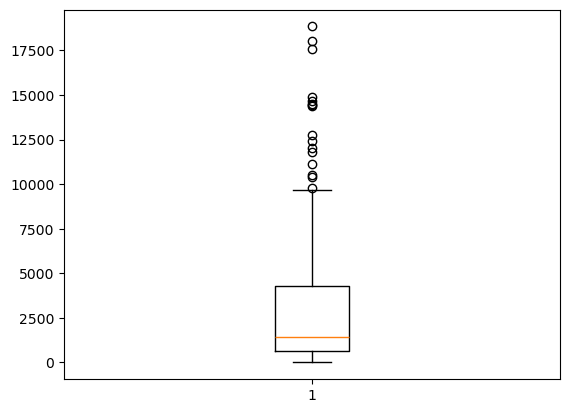

In [35]:
plt.boxplot(d1['QUANTITY'])

In [36]:
IQR=(d1['QUANTITY'].quantile(0.75))-(d1['QUANTITY'].quantile(0.25))
ll=d1['QUANTITY'].quantile(0.25)-(1.5*IQR)
ul=d1['QUANTITY'].quantile(0.75)+(1.5*IQR)
d1['QUANTITY']=np.where(d1['QUANTITY']>ul,ul,np.where(d1['QUANTITY']<ll,ll,d1['QUANTITY']))

In [37]:
d1

QUANTITY
2019-12-08     400.0
2019-12-15     300.0
2019-12-22     200.0
2019-12-29    1000.0
2020-01-05     960.0
...              ...
2022-10-30     525.5
2022-11-06     100.0
2022-11-13     875.0
2022-11-20    1600.0
2022-11-27    1090.0

[156 rows x 1 columns]

In [38]:
d1.QUANTITY.max()

9709.125

{'whiskers': [<matplotlib.lines.Line2D at 0x1677a31a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1677a37d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1677a2ea0>],
 'medians': [<matplotlib.lines.Line2D at 0x1677a3dd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1677ec110>],
 'means': []}

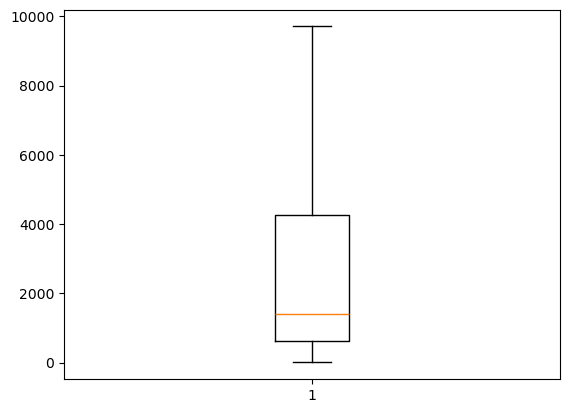

In [39]:
plt.boxplot(d1['QUANTITY'])

<Axes: >

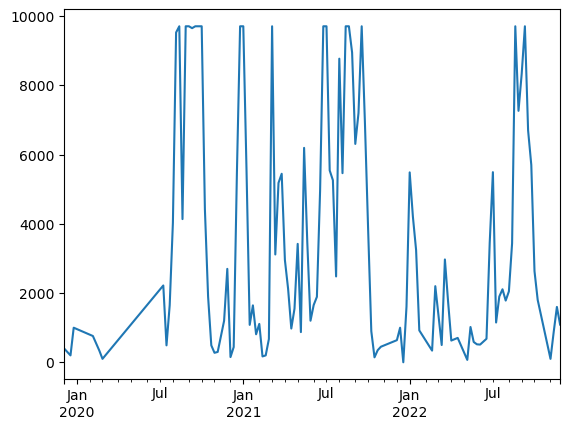

In [40]:
d1.QUANTITY.plot()

# Linear interpolation backward

<Axes: >

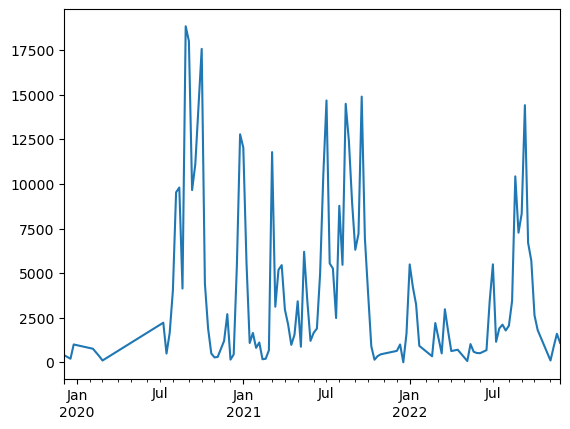

In [41]:
d2=f1.interpolate(method ='linear', limit_direction ='backward')
d2.QUANTITY.plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x169492090>,
 'caps': [<matplotlib.lines.Line2D at 0x16953ddc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1677effb0>],
 'medians': [<matplotlib.lines.Line2D at 0x16953e360>],
 'fliers': [<matplotlib.lines.Line2D at 0x16953e690>],
 'means': []}

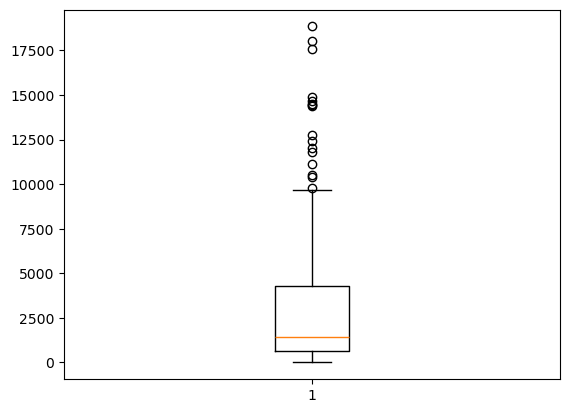

In [42]:
plt.boxplot(d2['QUANTITY'])

In [43]:
IQR=(d2['QUANTITY'].quantile(0.75))-(d2['QUANTITY'].quantile(0.25))
ll=d2['QUANTITY'].quantile(0.25)-(1.5*IQR)
ul=d2['QUANTITY'].quantile(0.75)+(1.5*IQR)
d2['QUANTITY']=np.where(d2['QUANTITY']>ul,ul,np.where(d2['QUANTITY']<ll,ll,d2['QUANTITY']))

{'whiskers': [<matplotlib.lines.Line2D at 0x169587d10>,
 'caps': [<matplotlib.lines.Line2D at 0x1695b53d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1695b4cb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1695b5970>],
 'fliers': [<matplotlib.lines.Line2D at 0x1695b5c40>],
 'means': []}

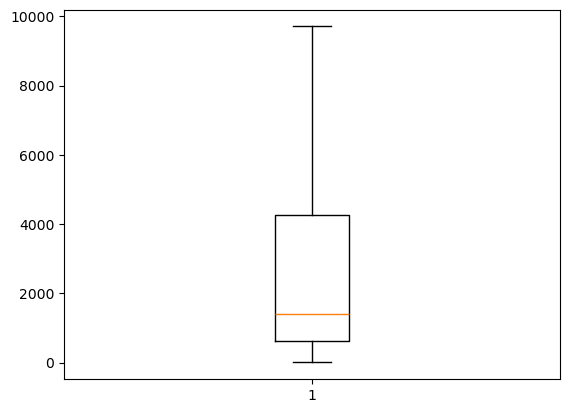

In [44]:
plt.boxplot(d2['QUANTITY'])

<Axes: >

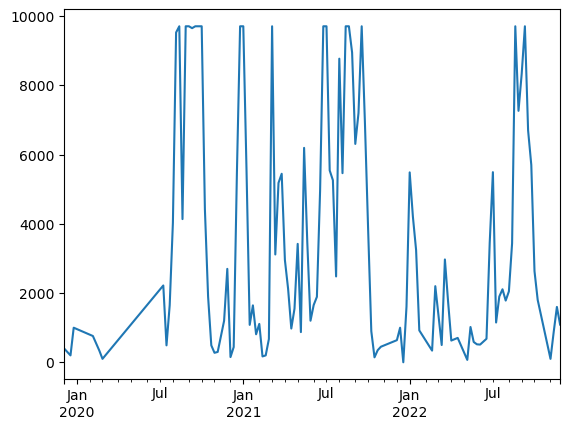

In [45]:
d2.QUANTITY.plot()

# Polynomial interpolation

<Axes: >

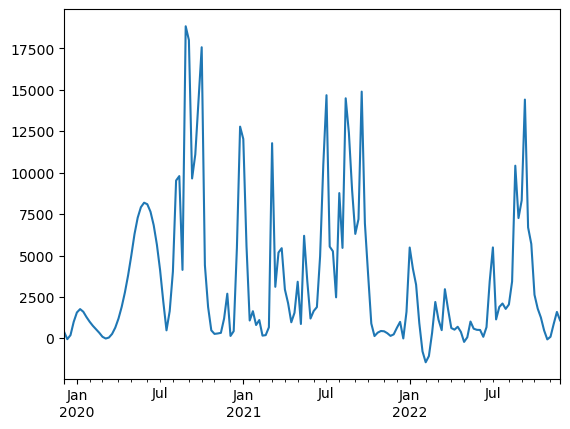

In [46]:
d3=f1.interpolate(method='polynomial', order=2)
d3.QUANTITY.plot()

In [47]:
d3

QUANTITY
2019-12-08   400.000000
2019-12-15   -43.809497
2019-12-22   200.000000
2019-12-29  1000.000000
2020-01-05  1567.619554
...                 ...
2022-10-30   -56.593811
2022-11-06   100.000000
2022-11-13   875.000000
2022-11-20  1600.000000
2022-11-27  1090.000000

[156 rows x 1 columns]

{'whiskers': [<matplotlib.lines.Line2D at 0x16b732cc0>,
 'caps': [<matplotlib.lines.Line2D at 0x16b7c9940>,
 'boxes': [<matplotlib.lines.Line2D at 0x16b7c9310>],
 'medians': [<matplotlib.lines.Line2D at 0x16b7c9f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x16b7ca180>],
 'means': []}

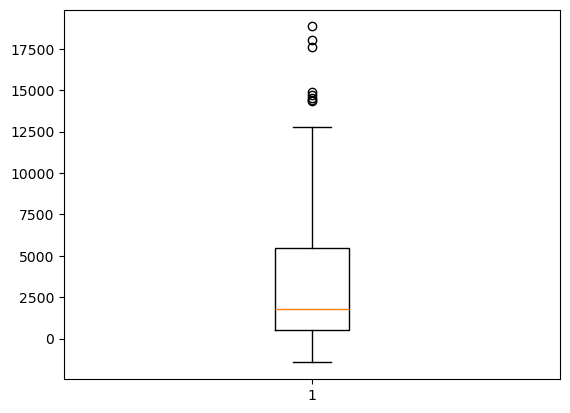

In [48]:
plt.boxplot(d3['QUANTITY'])

In [49]:
IQR=(d3['QUANTITY'].quantile(0.75))-(d3['QUANTITY'].quantile(0.25))
ll=d3['QUANTITY'].quantile(0.25)-(1.5*IQR)
ul=d3['QUANTITY'].quantile(0.75)+(1.5*IQR)
d3['QUANTITY']=np.where(d3['QUANTITY']>ul,ul,np.where(d3['QUANTITY']<ll,ll,d3['QUANTITY']))

<Axes: >

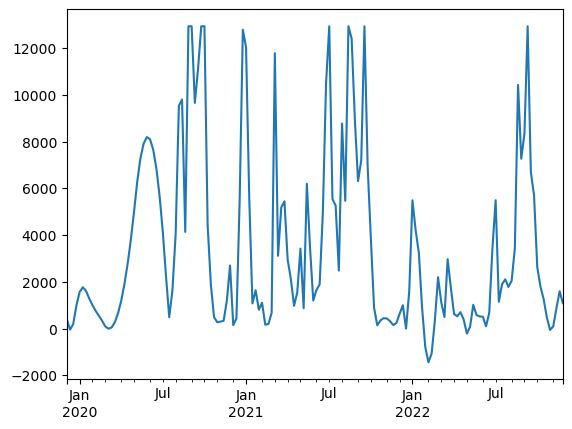

In [50]:
d3.QUANTITY.plot()

In [51]:
# forward imputation

<Axes: >

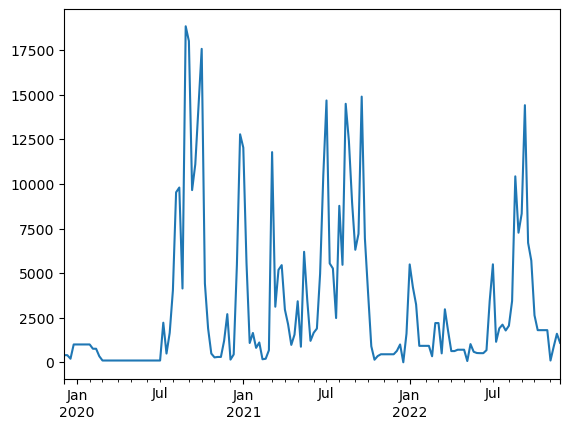

In [52]:
d4=f1.ffill()
d4.QUANTITY.plot()


{'whiskers': [<matplotlib.lines.Line2D at 0x16b9caae0>,
 'caps': [<matplotlib.lines.Line2D at 0x16b9cb080>,
 'boxes': [<matplotlib.lines.Line2D at 0x16b9ca870>],
 'medians': [<matplotlib.lines.Line2D at 0x16b9cb650>],
 'fliers': [<matplotlib.lines.Line2D at 0x16b9cb8f0>],
 'means': []}

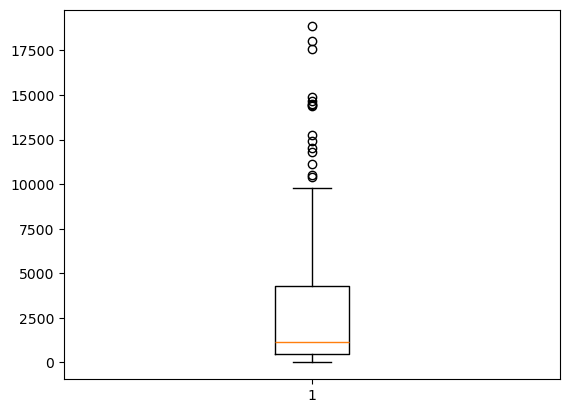

In [53]:
plt.boxplot(d4['QUANTITY'])

In [54]:
IQR=(d4['QUANTITY'].quantile(0.75))-(d4['QUANTITY'].quantile(0.25))
ll=d4['QUANTITY'].quantile(0.25)-(1.5*IQR)
ul=d4['QUANTITY'].quantile(0.75)+(1.5*IQR)
d4['QUANTITY']=np.where(d4['QUANTITY']>ul,ul,np.where(d4['QUANTITY']<ll,ll,d4['QUANTITY']))

{'whiskers': [<matplotlib.lines.Line2D at 0x16ba42330>,
 'caps': [<matplotlib.lines.Line2D at 0x16ba428a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16ba421b0>],
 'medians': [<matplotlib.lines.Line2D at 0x16ba42de0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16ba430b0>],
 'means': []}

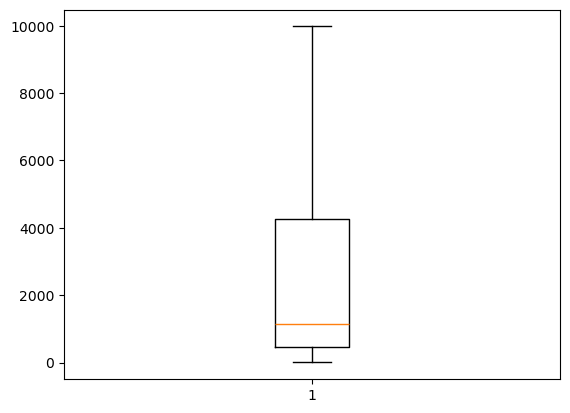

In [55]:
plt.boxplot(d4['QUANTITY'])

<Axes: >

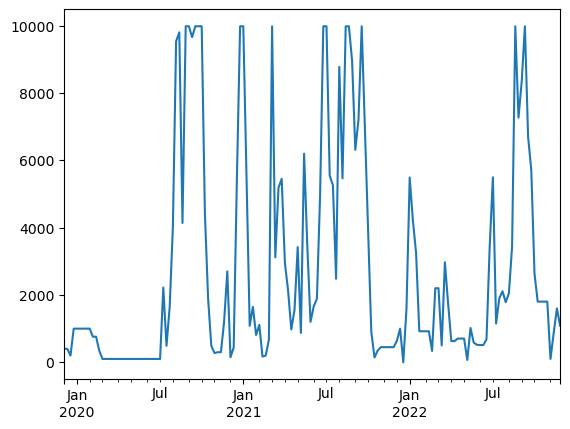

In [56]:
d4.QUANTITY.plot()

# BACK Fill imputation

<Axes: >

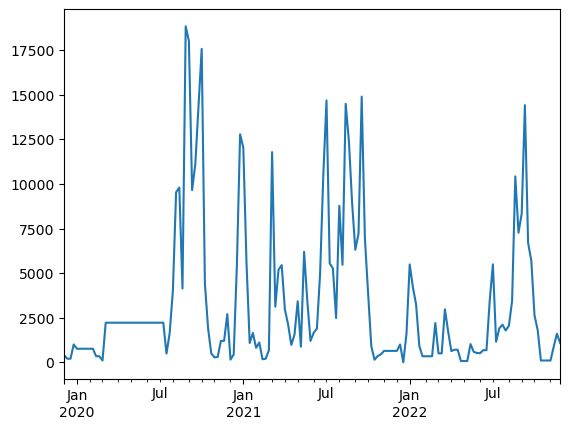

In [57]:
d5=f1.bfill()
d5.QUANTITY.plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x16bc2fbc0>,
 'caps': [<matplotlib.lines.Line2D at 0x16bba9550>,
 'boxes': [<matplotlib.lines.Line2D at 0x16bc2f8f0>],
 'medians': [<matplotlib.lines.Line2D at 0x16bc2fe90>],
 'fliers': [<matplotlib.lines.Line2D at 0x16bc701d0>],
 'means': []}

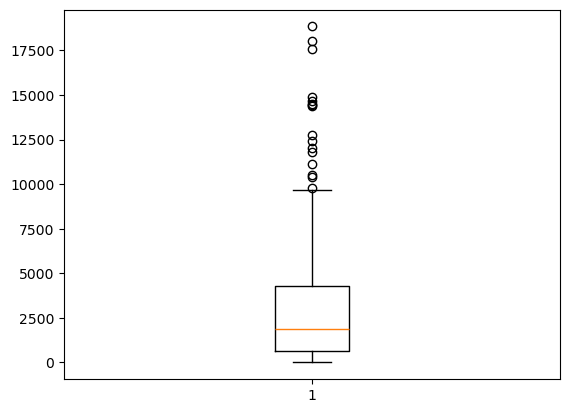

In [58]:
plt.boxplot(d5['QUANTITY'])

In [59]:
IQR=(d5['QUANTITY'].quantile(0.75))-(d5['QUANTITY'].quantile(0.25))
ll=d5['QUANTITY'].quantile(0.25)-(1.5*IQR)
ul=d5['QUANTITY'].quantile(0.75)+(1.5*IQR)
d5['QUANTITY']=np.where(d5['QUANTITY']>ul,ul,np.where(d5['QUANTITY']<ll,ll,d5['QUANTITY']))

{'whiskers': [<matplotlib.lines.Line2D at 0x16bca6930>,
 'caps': [<matplotlib.lines.Line2D at 0x16bca6f00>,
 'boxes': [<matplotlib.lines.Line2D at 0x16bca6630>],
 'medians': [<matplotlib.lines.Line2D at 0x16bca7500>],
 'fliers': [<matplotlib.lines.Line2D at 0x16bca77d0>],
 'means': []}

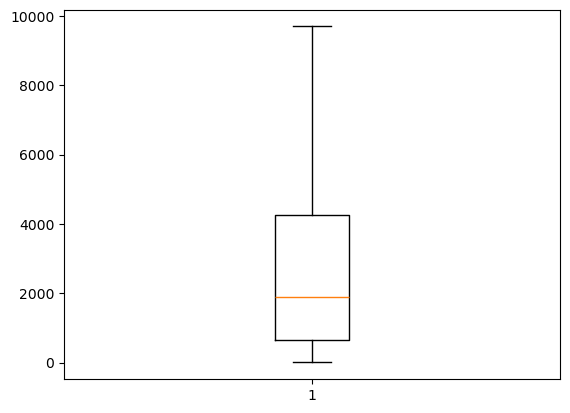

In [60]:
plt.boxplot(d5['QUANTITY'])

<Axes: >

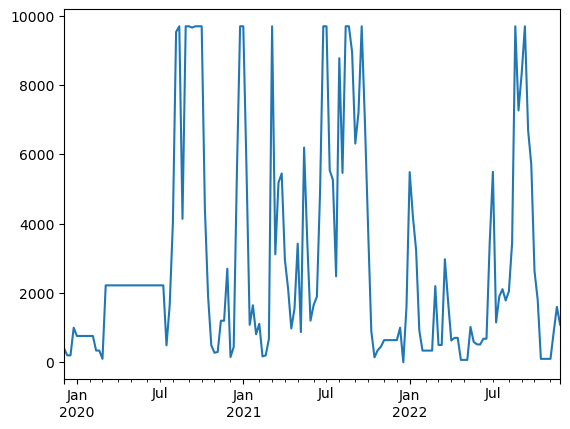

In [61]:
d5.QUANTITY.plot()

# SPLINE imputation

<Axes: >

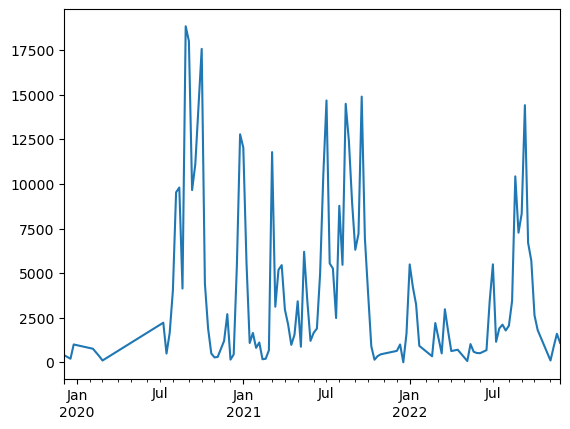

In [62]:
d6=f1.interpolate(method='spline',order=1)
d6.QUANTITY.plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x16bad7e30>,
 'caps': [<matplotlib.lines.Line2D at 0x16bb507a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16bad6fc0>],
 'medians': [<matplotlib.lines.Line2D at 0x16b8d8110>],
 'fliers': [<matplotlib.lines.Line2D at 0x16b8d9b20>],
 'means': []}

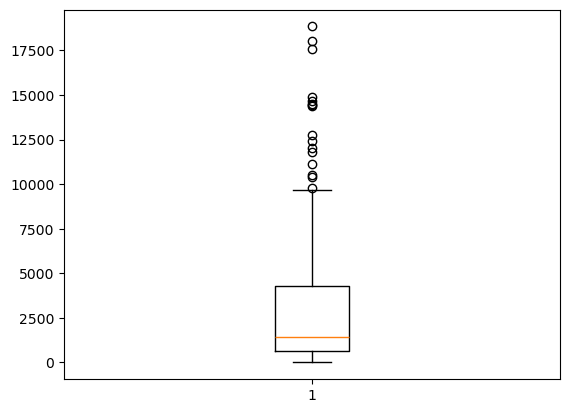

In [63]:
plt.boxplot(d6['QUANTITY'])

In [64]:
IQR=(d6['QUANTITY'].quantile(0.75))-(d6['QUANTITY'].quantile(0.25))
ll=d6['QUANTITY'].quantile(0.25)-(1.5*IQR)
ul=d6['QUANTITY'].quantile(0.75)+(1.5*IQR)
d6['QUANTITY']=np.where(d6['QUANTITY']>ul,ul,np.where(d6['QUANTITY']<ll,ll,d6['QUANTITY']))

{'whiskers': [<matplotlib.lines.Line2D at 0x16bf05550>,
 'caps': [<matplotlib.lines.Line2D at 0x16bf05a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x16bf05250>],
 'medians': [<matplotlib.lines.Line2D at 0x16bf06000>],
 'fliers': [<matplotlib.lines.Line2D at 0x16bf06330>],
 'means': []}

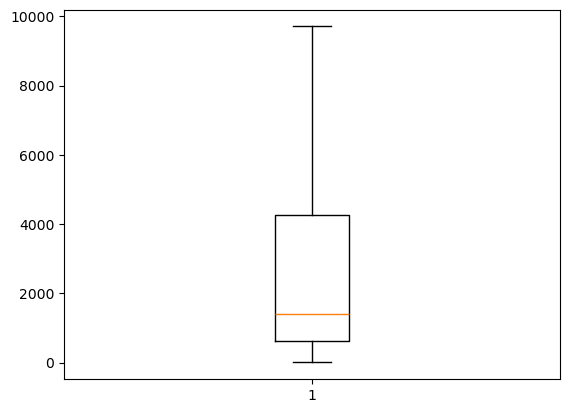

In [65]:
plt.boxplot(d6['QUANTITY'])

<Axes: >

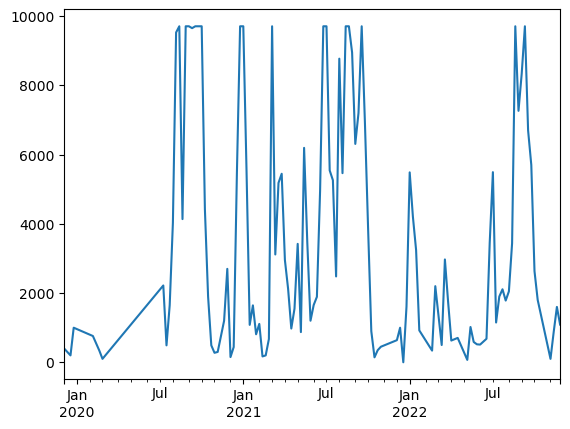

In [66]:
d6.QUANTITY.plot()

# Cubic imputation

<Axes: >

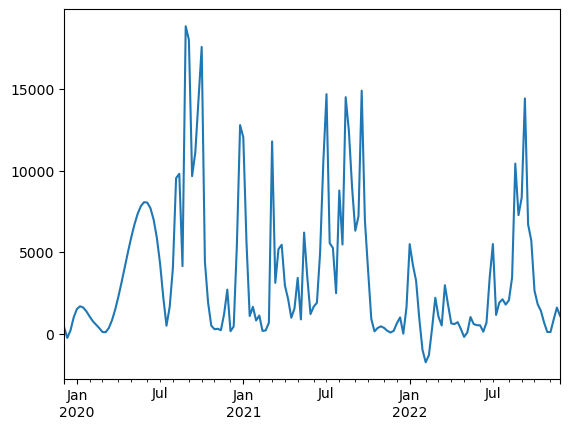

In [67]:
d7=f1.interpolate(method='cubic')
d7.QUANTITY.plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x16c9d7ec0>,
 'caps': [<matplotlib.lines.Line2D at 0x16ca04440>,
 'boxes': [<matplotlib.lines.Line2D at 0x16c9d7da0>],
 'medians': [<matplotlib.lines.Line2D at 0x16ca04a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x16ca04d40>],
 'means': []}

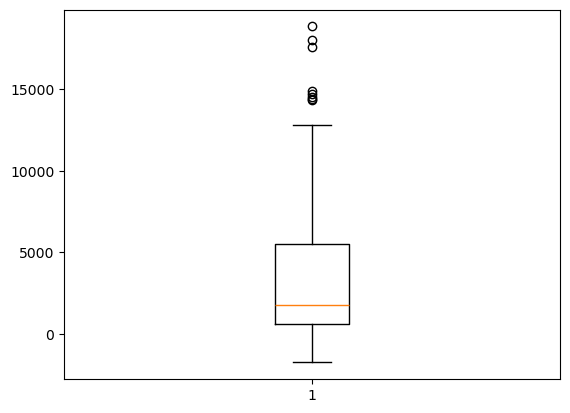

In [68]:
plt.boxplot(d7['QUANTITY'])

In [69]:
IQR=(d7['QUANTITY'].quantile(0.75))-(d7['QUANTITY'].quantile(0.25))
ll=d7['QUANTITY'].quantile(0.25)-(1.5*IQR)
ul=d7['QUANTITY'].quantile(0.75)+(1.5*IQR)
d7['QUANTITY']=np.where(d7['QUANTITY']>ul,ul,np.where(d7['QUANTITY']<ll,ll,d7['QUANTITY']))

{'whiskers': [<matplotlib.lines.Line2D at 0x16ca64a10>,
 'caps': [<matplotlib.lines.Line2D at 0x16c8c3dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16ca64740>],
 'medians': [<matplotlib.lines.Line2D at 0x16ca65070>],
 'fliers': [<matplotlib.lines.Line2D at 0x16ca65370>],
 'means': []}

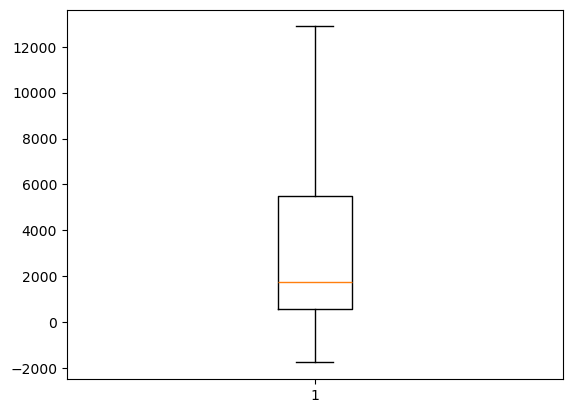

In [70]:
plt.boxplot(d7['QUANTITY'])

<Axes: >

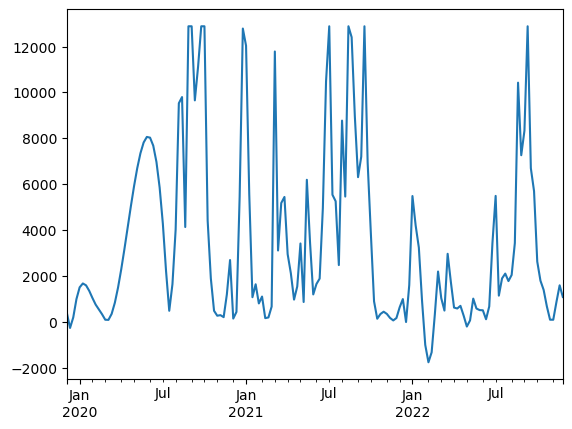

In [71]:
d7['QUANTITY'].plot()

# KNN Imputation

In [72]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
d8=imputer.fit_transform(f1)

In [73]:
d8

array([[4.00000000e+02],
       [4.13862609e+03],
       [2.00000000e+02],
       [1.00000000e+03],
       [4.13862609e+03],
       [4.13862609e+03],
       [4.13862609e+03],
       [4.13862609e+03],
       [4.13862609e+03],
       [7.60000000e+02],
       [4.13862609e+03],
       [3.40000000e+02],
       [1.00000000e+02],
       [4.13862609e+03],
       [4.13862609e+03],
       [4.13862609e+03],
       [4.13862609e+03],
       [4.13862609e+03],
       [4.13862609e+03],
       [4.13862609e+03],
       [4.13862609e+03],
       [4.13862609e+03],
       [4.13862609e+03],
       [4.13862609e+03],
       [4.13862609e+03],
       [4.13862609e+03],
       [4.13862609e+03],
       [4.13862609e+03],
       [4.13862609e+03],
       [4.13862609e+03],
       [4.13862609e+03],
       [2.22000000e+03],
       [4.90000000e+02],
       [1.65000000e+03],
       [4.03200000e+03],
       [9.53000000e+03],
       [9.79900000e+03],
       [4.13800000e+03],
       [1.88400000e+04],
       [1.80120000e+04],


In [74]:
d8 = pd.DataFrame(d8, columns = ['QUANTITY'])

In [75]:
d8

QUANTITY
0     400.000000
1    4138.626087
2     200.000000
3    1000.000000
4    4138.626087
..           ...
151  4138.626087
152   100.000000
153   875.000000
154  1600.000000
155  1090.000000

[156 rows x 1 columns]

<Axes: >

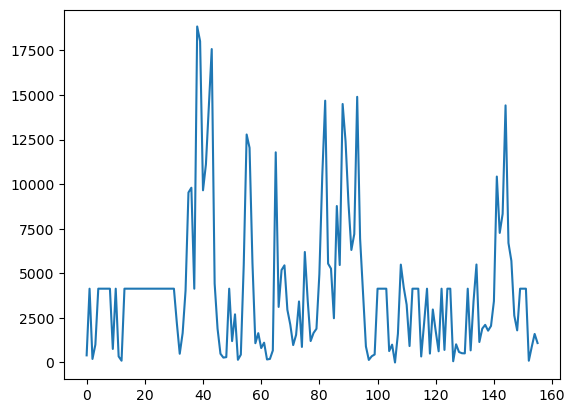

In [76]:
d8.QUANTITY.plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x178c31010>,
 'caps': [<matplotlib.lines.Line2D at 0x178c315e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x178c30d40>],
 'medians': [<matplotlib.lines.Line2D at 0x178c31bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x178c31ee0>],
 'means': []}

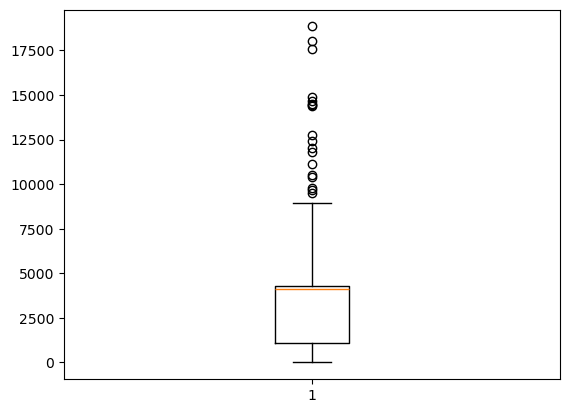

In [77]:
plt.boxplot(d8['QUANTITY'])

In [78]:
IQR=(d8['QUANTITY'].quantile(0.75))-(d8['QUANTITY'].quantile(0.25))
ll=d8['QUANTITY'].quantile(0.25)-(1.5*IQR)
ul=d8['QUANTITY'].quantile(0.75)+(1.5*IQR)
d8['QUANTITY']=np.where(d8['QUANTITY']>ul,ul,np.where(d8['QUANTITY']<ll,ll,d8['QUANTITY']))

{'whiskers': [<matplotlib.lines.Line2D at 0x178ca1040>,
 'caps': [<matplotlib.lines.Line2D at 0x178ca1520>,
 'boxes': [<matplotlib.lines.Line2D at 0x178ca0d70>],
 'medians': [<matplotlib.lines.Line2D at 0x178ca1b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x178ca1e80>],
 'means': []}

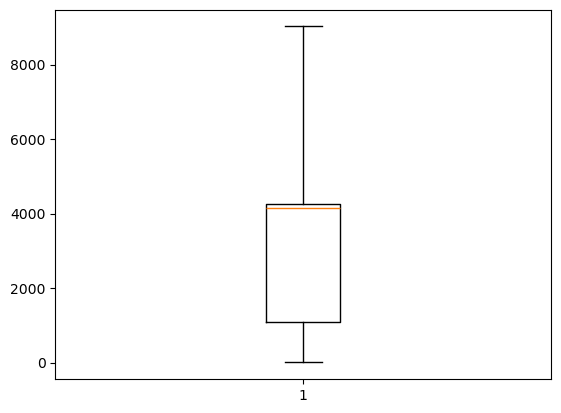

In [79]:
plt.boxplot(d8['QUANTITY'])

<Axes: >

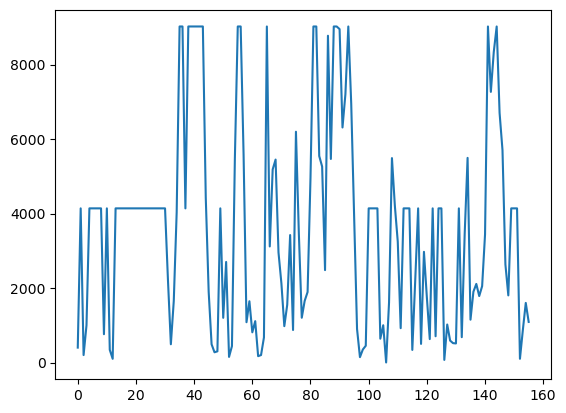

In [80]:
d8.QUANTITY.plot()

In [81]:
d8=d8.set_index(d7.index)

# Seasonality

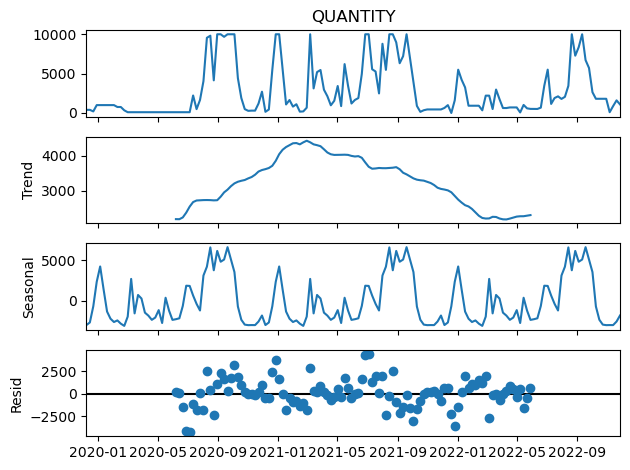

In [82]:
import statsmodels.api as sm
# multiplicative
res = sm.tsa.seasonal_decompose(d4.QUANTITY,model="additive")
#plt.figure(figsize=(16,12))
fig = res.plot()
#fig.show()

# Finding stationary or not

In [83]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(d1.QUANTITY.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
result

ADF Statistic: -4.586863
p-value: 0.000137


(-4.586863100228223,
 0.00013656613483342773,
 0,
 155,
 {'1%': -3.4732590518613002,
  '5%': -2.880374082105334,
  '10%': -2.5768120811654525},
 2565.197603332662)

In [84]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(d2.QUANTITY.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
result

ADF Statistic: -4.586863
p-value: 0.000137


(-4.586863100228223,
 0.00013656613483342773,
 0,
 155,
 {'1%': -3.4732590518613002,
  '5%': -2.880374082105334,
  '10%': -2.5768120811654525},
 2565.197603332662)

In [85]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(d3.QUANTITY.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
result

ADF Statistic: -4.846035
p-value: 0.000044


(-4.8460345353646614,
 4.436756537692912e-05,
 0,
 155,
 {'1%': -3.4732590518613002,
  '5%': -2.880374082105334,
  '10%': -2.5768120811654525},
 2634.495315153286)

In [86]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(d4.QUANTITY.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
result

ADF Statistic: -4.550360
p-value: 0.000159


(-4.550360256009334,
 0.00015929852953825403,
 0,
 155,
 {'1%': -3.4732590518613002,
  '5%': -2.880374082105334,
  '10%': -2.5768120811654525},
 2574.4715152130984)

In [87]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(d5.QUANTITY.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
result

ADF Statistic: -4.671262
p-value: 0.000095


(-4.671261890938534,
 9.525968272022111e-05,
 0,
 155,
 {'1%': -3.4732590518613002,
  '5%': -2.880374082105334,
  '10%': -2.5768120811654525},
 2565.416243236145)

In [88]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(d6.QUANTITY.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
result

ADF Statistic: -4.586825
p-value: 0.000137


(-4.586825176547862,
 0.0001365880606350454,
 0,
 155,
 {'1%': -3.4732590518613002,
  '5%': -2.880374082105334,
  '10%': -2.5768120811654525},
 2565.1907964315787)

In [89]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(d7.QUANTITY.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
result

ADF Statistic: -4.841031
p-value: 0.000045


(-4.841031434043549,
 4.536385296314321e-05,
 0,
 155,
 {'1%': -3.4732590518613002,
  '5%': -2.880374082105334,
  '10%': -2.5768120811654525},
 2633.9214330800805)

In [90]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(d8.QUANTITY.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
result

ADF Statistic: -6.153243
p-value: 0.000000


(-6.153242721972806,
 7.474059634792589e-08,
 0,
 155,
 {'1%': -3.4732590518613002,
  '5%': -2.880374082105334,
  '10%': -2.5768120811654525},
 2572.7952717823955)

# ARIMA

In [91]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

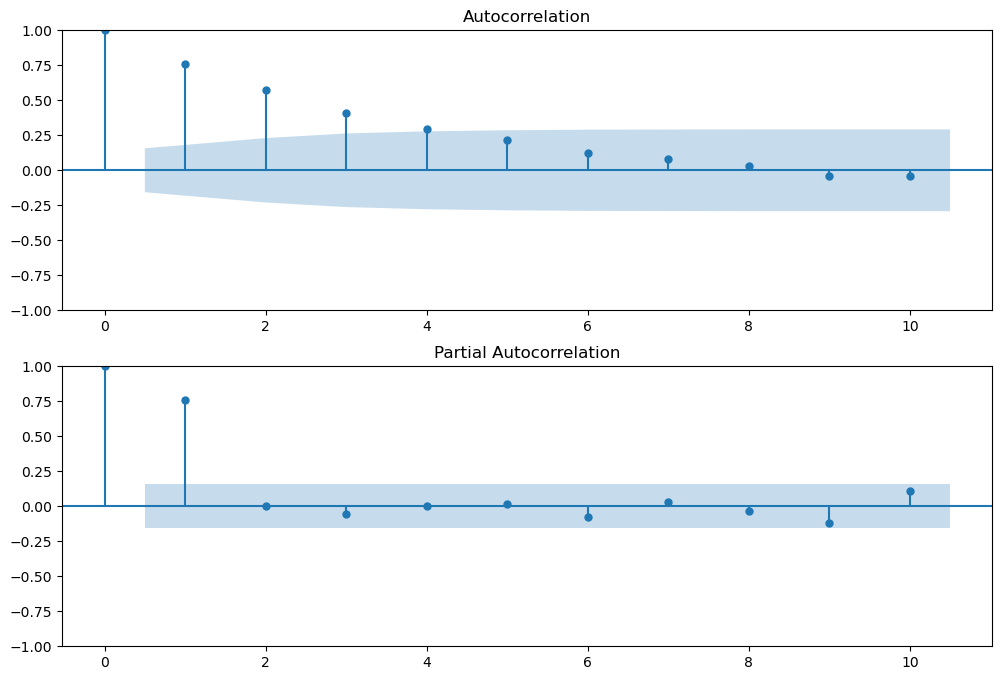

In [92]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(d1.QUANTITY,lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(d1.QUANTITY,lags=10,ax=ax2)

In [93]:
import statsmodels.api as sm

In [94]:
f1

QUANTITY
2019-12-08     400.0
2019-12-15       NaN
2019-12-22     200.0
2019-12-29    1000.0
2020-01-05       NaN
...              ...
2022-10-30       NaN
2022-11-06     100.0
2022-11-13     875.0
2022-11-20    1600.0
2022-11-27    1090.0

[156 rows x 1 columns]

In [95]:
model = sm.tsa.arima.ARIMA(d1.iloc[:115,:], order=(1,0,3))
result = model.fit()

In [96]:
start = 115
end = 156
  
# Predictions for one-year against the test set
d1_predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

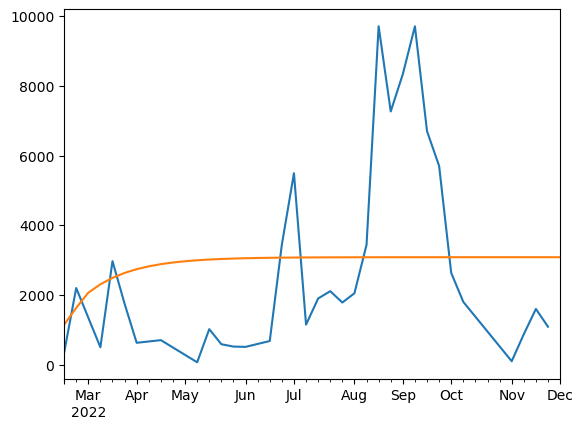

In [97]:
import matplotlib.pyplot as plt
d1.iloc[115:,:].QUANTITY.plot()
d1_predictions.plot()

In [98]:
model = sm.tsa.arima.ARIMA(d2.iloc[:115,:], order=(1,0,4))
result = model.fit()

In [99]:
start1 = 115
end1 = 156
  
# Predictions for one-year against the test set
d2_predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [100]:
d2_predictions

2022-02-20    1166.129032
2022-02-27    1647.969832
2022-03-06    2080.917909
2022-03-13    2323.309236
2022-03-20    2492.681365
2022-03-27    2624.387782
2022-04-03    2726.804751
2022-04-10    2806.445788
2022-04-17    2868.375904
2022-04-24    2916.533730
2022-05-01    2953.982009
2022-05-08    2983.102376
2022-05-15    3005.746829
2022-05-22    3023.355510
2022-05-29    3037.048296
2022-06-05    3047.696020
2022-06-12    3055.975857
2022-06-19    3062.414387
2022-06-26    3067.421089
2022-07-03    3071.314379
2022-07-10    3074.341862
2022-07-17    3076.696080
2022-07-24    3078.526757
2022-07-31    3079.950320
2022-08-07    3081.057305
2022-08-14    3081.918114
2022-08-21    3082.587492
2022-08-28    3083.108011
2022-09-04    3083.512775
2022-09-11    3083.827525
2022-09-18    3084.072280
2022-09-25    3084.262606
2022-10-02    3084.410605
2022-10-09    3084.525693
2022-10-16    3084.615186
2022-10-23    3084.684778
2022-10-30    3084.738893
2022-11-06    3084.780974
2022-11-13  

<Axes: >

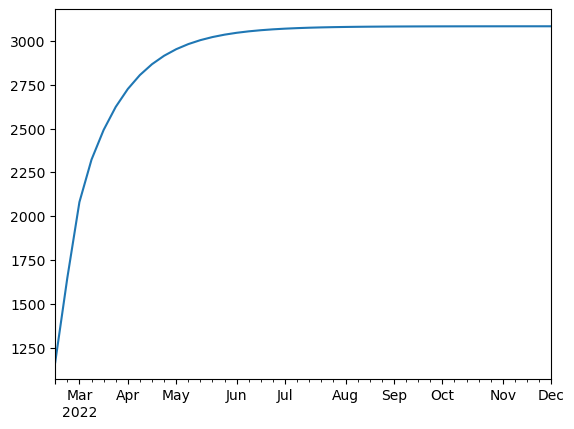

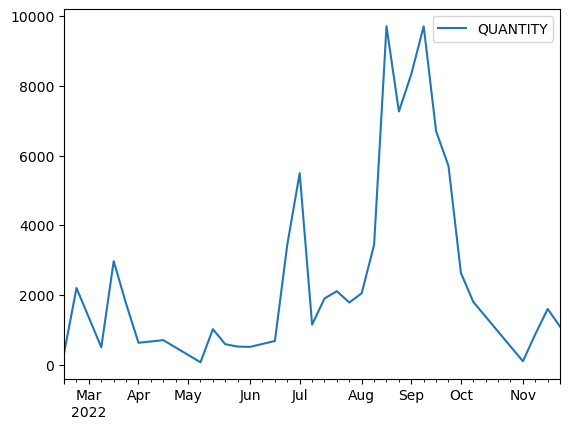

In [101]:
d2_predictions.plot()
d2.iloc[115:,:].plot()

In [102]:
model = sm.tsa.arima.ARIMA(d3.iloc[:115,:], order=(1,0,4))
result = model.fit()

In [103]:
start1 = 115
end1 = 156
  
# Predictions for one-year against the test set
d3_predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [104]:
d3_predictions

2022-02-20     383.539864
2022-02-27    1399.401067
2022-03-06    2156.643110
2022-03-13    2635.002979
2022-03-20    3030.267258
2022-03-27    3296.720209
2022-04-03    3476.339715
2022-04-10    3597.423633
2022-04-17    3679.047925
2022-04-24    3734.071955
2022-05-01    3771.164392
2022-05-08    3796.168900
2022-05-15    3813.024775
2022-05-22    3824.387546
2022-05-29    3832.047342
2022-06-05    3837.210914
2022-06-12    3840.691747
2022-06-19    3843.038223
2022-06-26    3844.620013
2022-07-03    3845.686320
2022-07-10    3846.405131
2022-07-17    3846.889692
2022-07-24    3847.216341
2022-07-31    3847.436539
2022-08-07    3847.584978
2022-08-14    3847.685042
2022-08-21    3847.752497
2022-08-28    3847.797969
2022-09-04    3847.828622
2022-09-11    3847.849286
2022-09-18    3847.863216
2022-09-25    3847.872606
2022-10-02    3847.878936
2022-10-09    3847.883204
2022-10-16    3847.886080
2022-10-23    3847.888019
2022-10-30    3847.889326
2022-11-06    3847.890208
2022-11-13  

<Axes: >

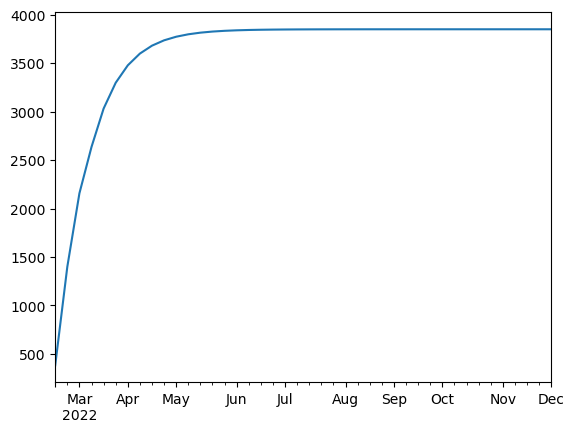

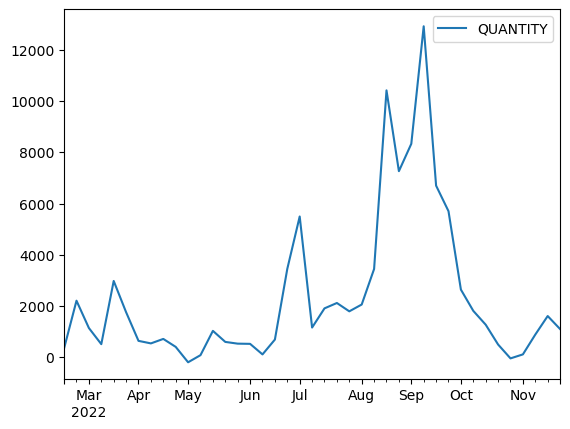

In [105]:
d3_predictions.plot()
d3.iloc[115:,:].plot()

In [106]:
model = sm.tsa.arima.ARIMA(d4.iloc[:115,:], order=(1,0,4))
result = model.fit()

In [107]:
start1 = 115
end1 = 156
  
# Predictions for one-year against the test set
d4_predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [108]:
d4_predictions

2022-02-20    1410.638166
2022-02-27    1767.938793
2022-03-06    2085.816102
2022-03-13    2274.882590
2022-03-20    2426.484794
2022-03-27    2544.471361
2022-04-03    2636.296081
2022-04-10    2707.759972
2022-04-17    2763.377760
2022-04-24    2806.663092
2022-05-01    2840.350517
2022-05-08    2866.568233
2022-05-15    2886.972542
2022-05-22    2902.852486
2022-05-29    2915.211277
2022-06-05    2924.829682
2022-06-12    2932.315342
2022-06-19    2938.141163
2022-06-26    2942.675191
2022-07-03    2946.203863
2022-07-10    2948.950101
2022-07-17    2951.087401
2022-07-24    2952.750784
2022-07-31    2954.045336
2022-08-07    2955.052839
2022-08-14    2955.836943
2022-08-21    2956.447183
2022-08-28    2956.922111
2022-09-04    2957.291730
2022-09-11    2957.579392
2022-09-18    2957.803268
2022-09-25    2957.977504
2022-10-02    2958.113105
2022-10-09    2958.218638
2022-10-16    2958.300771
2022-10-23    2958.364692
2022-10-30    2958.414439
2022-11-06    2958.453156
2022-11-13  

<Axes: >

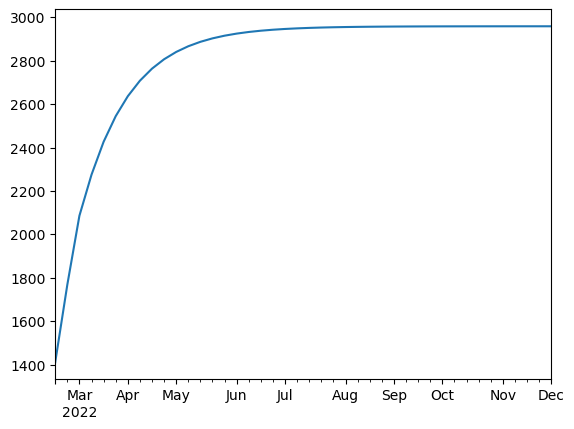

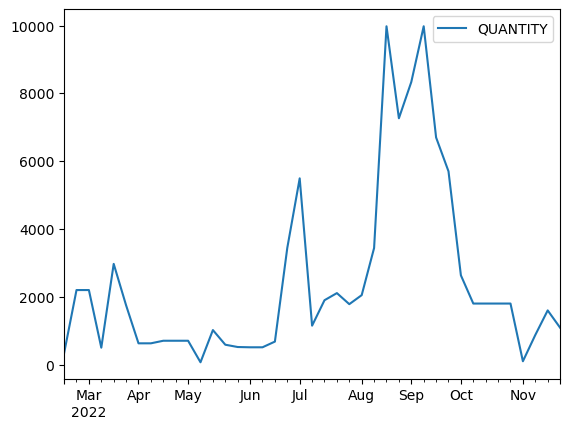

In [109]:
d4_predictions.plot()
d4.iloc[115:,:].plot()

In [110]:
model = sm.tsa.arima.ARIMA(d5.iloc[:115,:], order=(1,0,4))
result = model.fit()

In [111]:
start1 = 115
end1 = 156
  
# Predictions for one-year against the test set
d5_predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [112]:
d5_predictions

2022-02-20    1194.053925
2022-02-27    1766.102526
2022-03-06    2248.574580
2022-03-13    2522.250667
2022-03-20    2703.128438
2022-03-27    2838.465412
2022-04-03    2939.727697
2022-04-10    3015.494504
2022-04-17    3072.184999
2022-04-24    3114.602152
2022-05-01    3146.339656
2022-05-08    3170.086398
2022-05-15    3187.854266
2022-05-22    3201.148599
2022-05-29    3211.095730
2022-06-05    3218.538405
2022-06-12    3224.107189
2022-06-19    3228.273883
2022-06-26    3231.391501
2022-07-03    3233.724175
2022-07-10    3235.469537
2022-07-17    3236.775457
2022-07-24    3237.752577
2022-07-31    3238.483681
2022-08-07    3239.030710
2022-08-14    3239.440010
2022-08-21    3239.746258
2022-08-28    3239.975400
2022-09-04    3240.146849
2022-09-11    3240.275132
2022-09-18    3240.371115
2022-09-25    3240.442933
2022-10-02    3240.496668
2022-10-09    3240.536874
2022-10-16    3240.566957
2022-10-23    3240.589466
2022-10-30    3240.606308
2022-11-06    3240.618909
2022-11-13  

<Axes: >

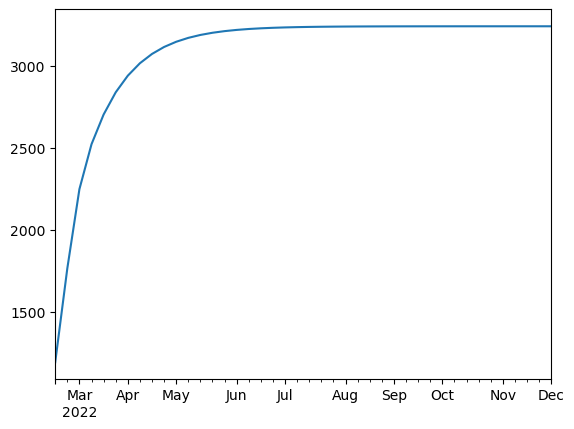

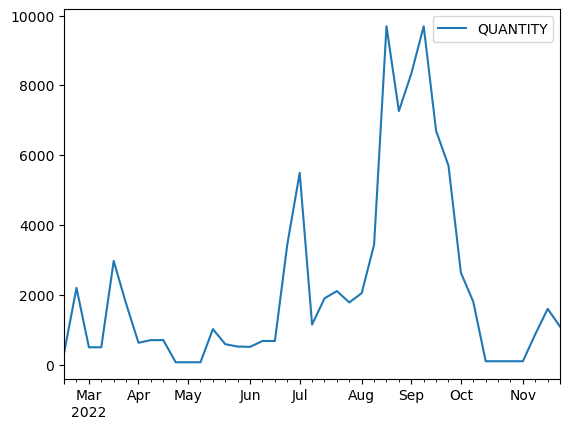

In [113]:
d5_predictions.plot()
d5.iloc[115:,:].plot()

In [114]:
model = sm.tsa.arima.ARIMA(d6.iloc[:115,:], order=(1,0,4))
result = model.fit()

In [115]:
start1 = 115
end1 = 156
  
# Predictions for one-year against the test set
d6_predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [116]:
d6_predictions

2022-02-20    1166.272298
2022-02-27    1648.050674
2022-03-06    2080.959841
2022-03-13    2323.326011
2022-03-20    2492.682650
2022-03-27    2624.377545
2022-04-03    2726.785963
2022-04-10    2806.420667
2022-04-17    2868.346106
2022-04-24    2916.500487
2022-05-01    2953.946236
2022-05-08    2983.064753
2022-05-15    3005.707856
2022-05-22    3023.315558
2022-05-29    3037.007637
2022-06-05    3047.654854
2022-06-12    3055.934329
2022-06-19    3062.372605
2022-06-26    3067.379128
2022-07-03    3071.272295
2022-07-10    3074.299694
2022-07-17    3076.653856
2022-07-24    3078.484497
2022-07-31    3079.908037
2022-08-07    3081.015009
2022-08-14    3081.875811
2022-08-21    3082.545187
2022-08-28    3083.065706
2022-09-04    3083.470472
2022-09-11    3083.785225
2022-09-18    3084.029983
2022-09-25    3084.220311
2022-10-02    3084.368314
2022-10-09    3084.483404
2022-10-16    3084.572900
2022-10-23    3084.642494
2022-10-30    3084.696611
2022-11-06    3084.738694
2022-11-13  

<Axes: >

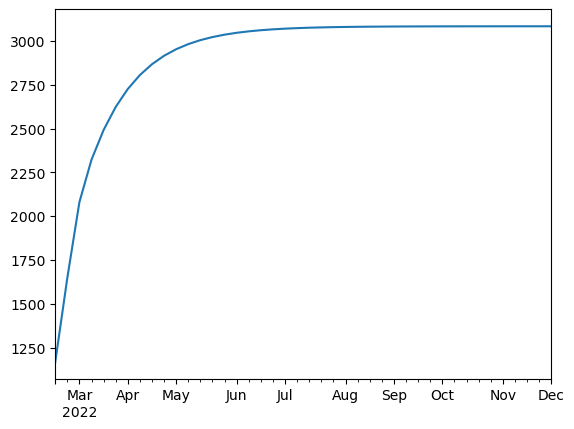

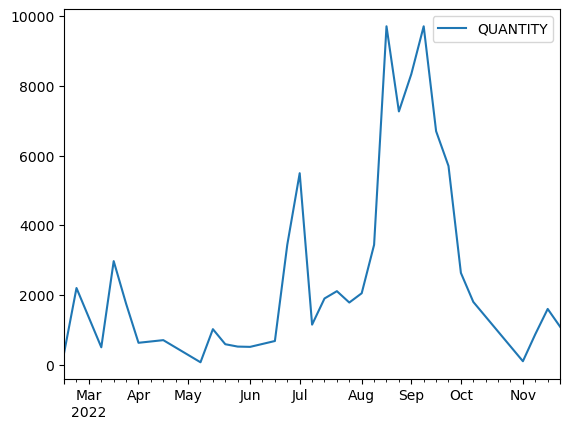

In [117]:
d6_predictions.plot()
d6.iloc[115:,:].plot()

In [118]:
model = sm.tsa.arima.ARIMA(d7.iloc[:115,:], order=(1,0,4))
result = model.fit()

In [119]:
start1 = 115
end1 = 156
  
# Predictions for one-year against the test set
d7_predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [120]:
d7_predictions

2022-02-20     233.345736
2022-02-27    1315.672929
2022-03-06    2109.747723
2022-03-13    2617.767534
2022-03-20    3032.715217
2022-03-27    3313.822485
2022-04-03    3504.259255
2022-04-10    3633.271085
2022-04-17    3720.670449
2022-04-24    3779.879350
2022-05-01    3819.990557
2022-05-08    3847.163987
2022-05-15    3865.572690
2022-05-22    3878.043709
2022-05-29    3886.492229
2022-06-05    3892.215699
2022-06-12    3896.093076
2022-06-19    3898.719815
2022-06-26    3900.499305
2022-07-03    3901.704825
2022-07-10    3902.521507
2022-07-17    3903.074770
2022-07-24    3903.449580
2022-07-31    3903.703495
2022-08-07    3903.875511
2022-08-14    3903.992043
2022-08-21    3904.070988
2022-08-28    3904.124470
2022-09-04    3904.160701
2022-09-11    3904.185246
2022-09-18    3904.201874
2022-09-25    3904.213139
2022-10-02    3904.220770
2022-10-09    3904.225940
2022-10-16    3904.229442
2022-10-23    3904.231815
2022-10-30    3904.233422
2022-11-06    3904.234511
2022-11-13  

<Axes: >

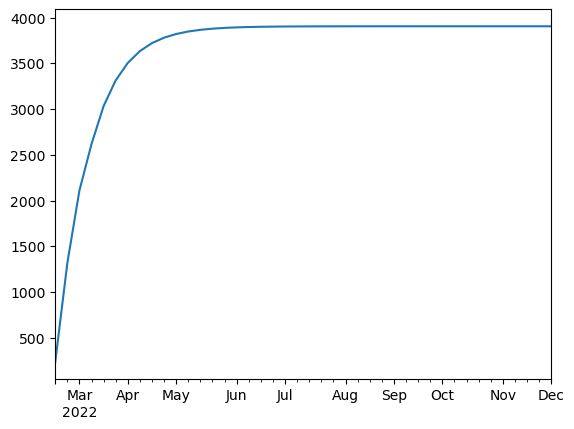

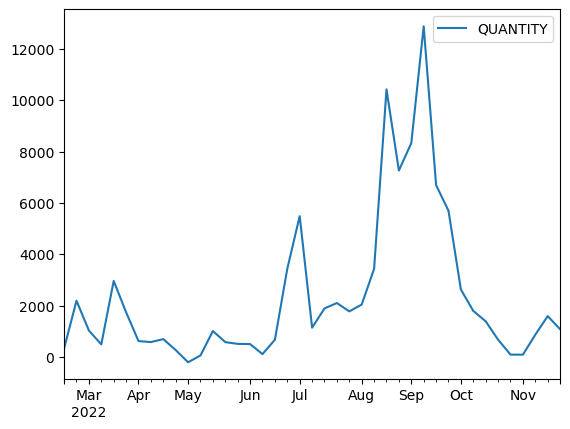

In [121]:
d7_predictions.plot()
d7.iloc[115:,:].plot()

In [122]:
model = sm.tsa.arima.ARIMA(d8.iloc[:115,:], order=(1,0,4))
result = model.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [123]:
start1 = 115
end1 = 156
  
# Predictions for one-year against the test set
d8_predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [124]:
d8_predictions

2022-02-20    4199.692634
2022-02-27    3744.993638
2022-03-06    3813.190844
2022-03-13    3905.244053
2022-03-20    3908.301895
2022-03-27    3909.306055
2022-04-03    3909.635809
2022-04-10    3909.744097
2022-04-17    3909.779657
2022-04-24    3909.791335
2022-05-01    3909.795170
2022-05-08    3909.796429
2022-05-15    3909.796843
2022-05-22    3909.796978
2022-05-29    3909.797023
2022-06-05    3909.797038
2022-06-12    3909.797043
2022-06-19    3909.797044
2022-06-26    3909.797045
2022-07-03    3909.797045
2022-07-10    3909.797045
2022-07-17    3909.797045
2022-07-24    3909.797045
2022-07-31    3909.797045
2022-08-07    3909.797045
2022-08-14    3909.797045
2022-08-21    3909.797045
2022-08-28    3909.797045
2022-09-04    3909.797045
2022-09-11    3909.797045
2022-09-18    3909.797045
2022-09-25    3909.797045
2022-10-02    3909.797045
2022-10-09    3909.797045
2022-10-16    3909.797045
2022-10-23    3909.797045
2022-10-30    3909.797045
2022-11-06    3909.797045
2022-11-13  

<Axes: >

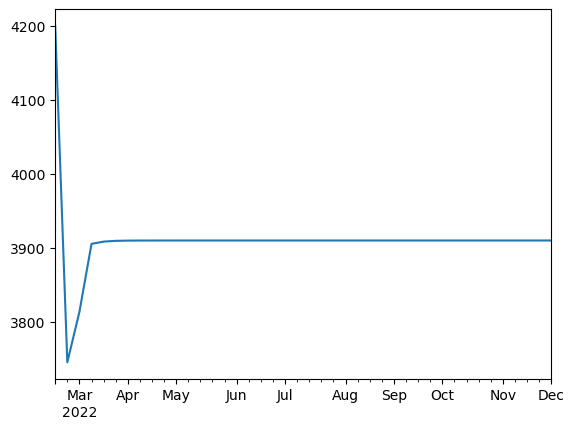

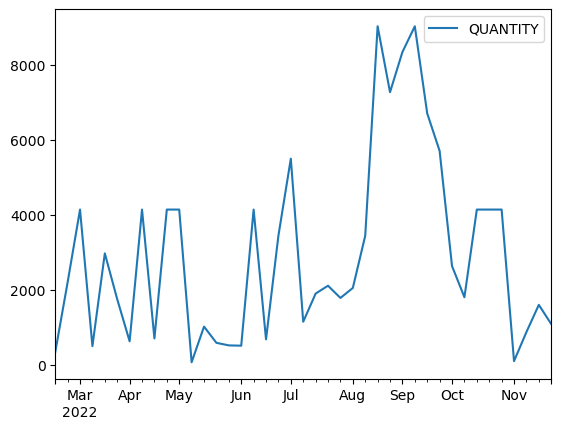

In [125]:
d8_predictions.plot()
d8.iloc[115:,:].plot()

In [126]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(d1.iloc[114:,:],d1_predictions ))
print(mean_absolute_percentage_error(d2.iloc[114:,:],d2_predictions ))
print(mean_absolute_percentage_error(d3.iloc[114:,:],d3_predictions ))
print(mean_absolute_percentage_error(d4.iloc[114:,:],d4_predictions ))
print(mean_absolute_percentage_error(d5.iloc[114:,:],d5_predictions ))
print(mean_absolute_percentage_error(d6.iloc[114:,:],d6_predictions ))
print(mean_absolute_percentage_error(d7.iloc[114:,:],d7_predictions ))
print(mean_absolute_percentage_error(d8.iloc[114:,:],d8_predictions ))

3.657679301325703
3.6505431013319614
7.2846002473145575
3.163323788761811
7.73014101614675
3.650366893000287
6.480080255119176
3.99327426980307


AUTO ARIMA 

In [127]:
from pmdarima import auto_arima

In [128]:
d4

QUANTITY
2019-12-08     400.0
2019-12-15     400.0
2019-12-22     200.0
2019-12-29    1000.0
2020-01-05    1000.0
...              ...
2022-10-30    1802.0
2022-11-06     100.0
2022-11-13     875.0
2022-11-20    1600.0
2022-11-27    1090.0

[156 rows x 1 columns]

In [129]:
d4

QUANTITY
2019-12-08     400.0
2019-12-15     400.0
2019-12-22     200.0
2019-12-29    1000.0
2020-01-05    1000.0
...              ...
2022-10-30    1802.0
2022-11-06     100.0
2022-11-13     875.0
2022-11-20    1600.0
2022-11-27    1090.0

[156 rows x 1 columns]

In [130]:
import pmdarima as pm

In [131]:
smodel = pm.auto_arima(d4, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=52,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[52]             : AIC=inf, Time=47.05 sec
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=1959.257, Time=0.44 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=inf, Time=15.96 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=10.68 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=inf, Time=6.48 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=inf, Time=8.22 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=inf, Time=16.34 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=1952.571, Time=0.21 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=inf, Time=13.24 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=inf, Time=20.27 sec
 ARIMA(2,1,0)(0,1,0)[52]             : AIC=1951.789, Time=0.32 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=inf, Time=10.77 sec
 ARIMA(2,1,0)(0,1,1)[52]             : AIC=inf, Time=17.75 sec
 ARIMA(2,1,0)(1,1,1)[52]             : AIC=inf, Time=16.69 sec
 ARIMA(3,1,0)(0,1,0)[52]             : AIC=1949.175, Time=0.32 se

In [132]:
import statsmodels.api as sm

In [133]:
d1

QUANTITY
2019-12-08     400.0
2019-12-15     300.0
2019-12-22     200.0
2019-12-29    1000.0
2020-01-05     960.0
...              ...
2022-10-30     525.5
2022-11-06     100.0
2022-11-13     875.0
2022-11-20    1600.0
2022-11-27    1090.0

[156 rows x 1 columns]

In [134]:
model=sm.tsa.statespace.SARIMAX(d4.QUANTITY,order=(1, 1, 1),seasonal_order=(2,1,0,52))
results=model.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.20509D+00    |proj g|=  2.88153D-01

At iterate    5    f=  6.09567D+00    |proj g|=  7.27869D-03

At iterate   10    f=  6.09365D+00    |proj g|=  9.91187D-05

At iterate   15    f=  6.09364D+00    |proj g|=  7.17633D-04

At iterate   20    f=  6.09230D+00    |proj g|=  1.18755D-02

At iterate   25    f=  6.03152D+00    |proj g|=  1.27113D-01

At iterate   30    f=  5.96311D+00    |proj g|=  8.93833D-03

At iterate   35    f=  5.96242D+00    |proj g|=  1.79902D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

<Axes: >

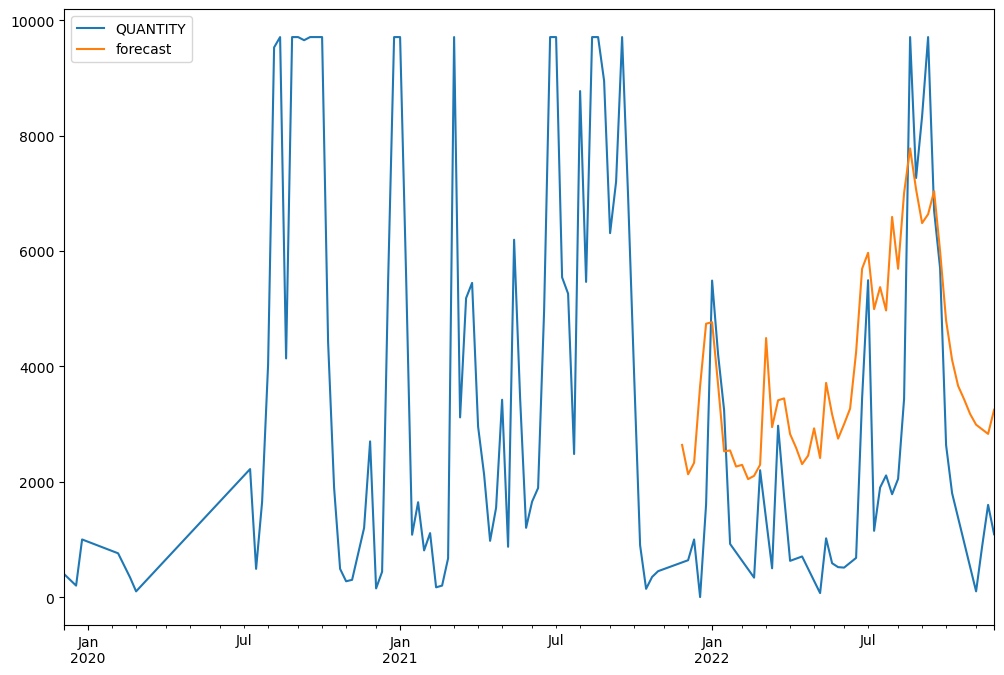

In [135]:
d1['forecast']=results.predict(start=103,end=155,dynamic=True)
d1[['QUANTITY','forecast']].plot(figsize=(12,8))

In [136]:
d1['forecast']

2019-12-08            NaN
2019-12-15            NaN
2019-12-22            NaN
2019-12-29            NaN
2020-01-05            NaN
                 ...     
2022-10-30    3175.717481
2022-11-06    2989.108874
2022-11-13    2908.930445
2022-11-20    2829.779648
2022-11-27    3248.516150
Freq: W-SUN, Name: forecast, Length: 156, dtype: float64

In [137]:
d2

QUANTITY
2019-12-08     400.0
2019-12-15     300.0
2019-12-22     200.0
2019-12-29    1000.0
2020-01-05     960.0
...              ...
2022-10-30     525.5
2022-11-06     100.0
2022-11-13     875.0
2022-11-20    1600.0
2022-11-27    1090.0

[156 rows x 1 columns]

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.18439D+00    |proj g|=  2.87604D-01


 This problem is unconstrained.



At iterate    5    f=  6.07103D+00    |proj g|=  7.53936D-03

At iterate   10    f=  6.06896D+00    |proj g|=  2.69592D-04

At iterate   15    f=  6.06895D+00    |proj g|=  9.44302D-04

At iterate   20    f=  6.06832D+00    |proj g|=  1.30998D-02

At iterate   25    f=  5.98632D+00    |proj g|=  7.38455D-02

At iterate   30    f=  5.95921D+00    |proj g|=  9.86197D-03

At iterate   35    f=  5.95877D+00    |proj g|=  1.21454D-03

At iterate   40    f=  5.95017D+00    |proj g|=  1.69755D-01

At iterate   45    f=  5.94352D+00    |proj g|=  1.10394D-02

At iterate   50    f=  5.94320D+00    |proj g|=  1.11499D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: >

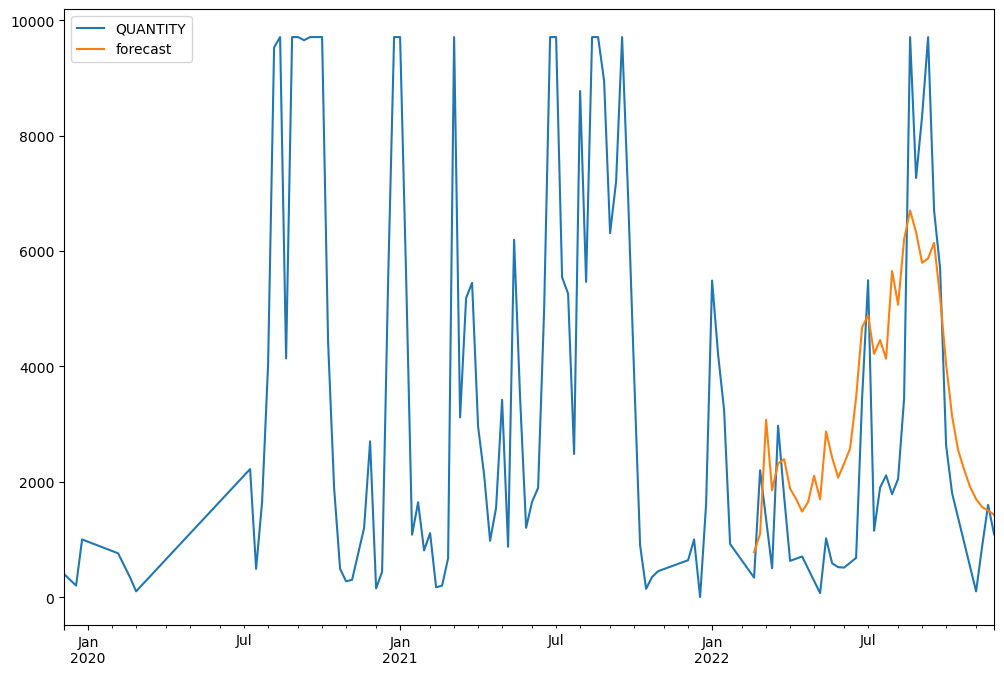

In [138]:
model=sm.tsa.statespace.SARIMAX(d2.QUANTITY,order=(1, 1, 1),seasonal_order=(2,1,0,52))
results=model.fit()
d2['forecast']=results.predict(start=115,end=155,dynamic=True)
d2[['QUANTITY','forecast']].plot(figsize=(12,8))

In [139]:
d3

QUANTITY
2019-12-08   400.000000
2019-12-15   -43.809497
2019-12-22   200.000000
2019-12-29  1000.000000
2020-01-05  1567.619554
...                 ...
2022-10-30   -56.593811
2022-11-06   100.000000
2022-11-13   875.000000
2022-11-20  1600.000000
2022-11-27  1090.000000

[156 rows x 1 columns]

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.74014D+00    |proj g|=  7.12240D-01

At iterate    5    f=  6.26019D+00    |proj g|=  2.80990D-02

At iterate   10    f=  6.25313D+00    |proj g|=  9.19167D-04

At iterate   15    f=  6.25312D+00    |proj g|=  3.40578D-04

At iterate   20    f=  6.25303D+00    |proj g|=  4.16025D-03

At iterate   25    f=  6.20310D+00    |proj g|=  8.66047D-02

At iterate   30    f=  6.17058D+00    |proj g|=  2.93825D-02

At iterate   35    f=  6.13964D+00    |proj g|=  1.56413D-01

At iterate   40    f=  6.12141D+00    |proj g|=  1.10788D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

<Axes: >

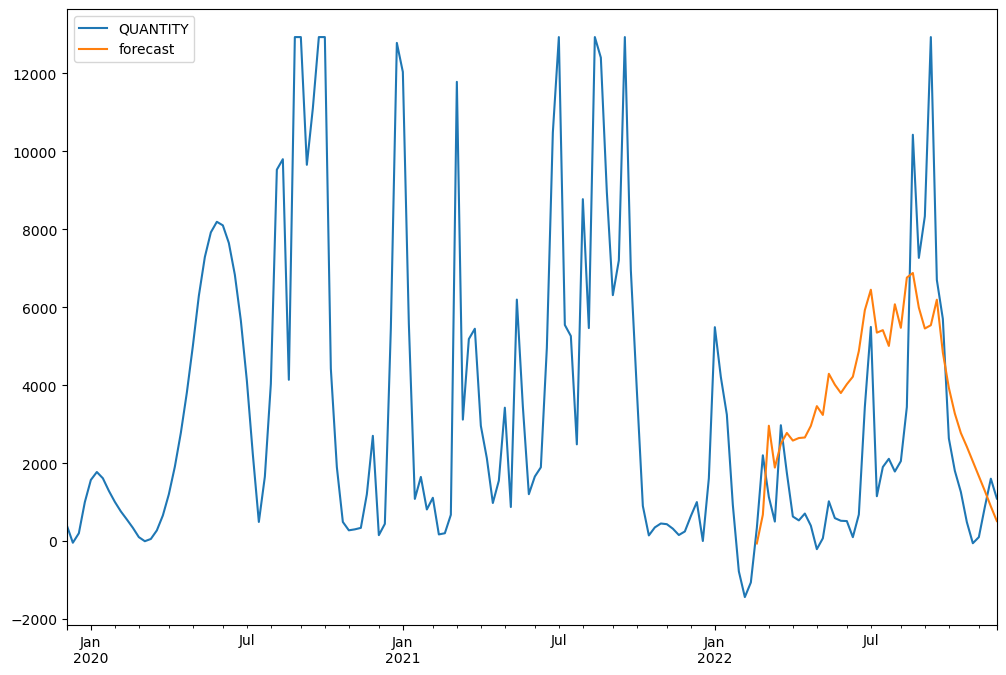

In [140]:
model=sm.tsa.statespace.SARIMAX(d3.QUANTITY,order=(1, 1, 1),seasonal_order=(2,1,0,52))
results=model.fit()
d3['forecast']=results.predict(start=115,end=155,dynamic=True)
d3[['QUANTITY','forecast']].plot(figsize=(12,8))

In [141]:
d4

QUANTITY
2019-12-08     400.0
2019-12-15     400.0
2019-12-22     200.0
2019-12-29    1000.0
2020-01-05    1000.0
...              ...
2022-10-30    1802.0
2022-11-06     100.0
2022-11-13     875.0
2022-11-20    1600.0
2022-11-27    1090.0

[156 rows x 1 columns]

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.20509D+00    |proj g|=  2.88153D-01

At iterate    5    f=  6.09567D+00    |proj g|=  7.27869D-03

At iterate   10    f=  6.09365D+00    |proj g|=  9.91187D-05

At iterate   15    f=  6.09364D+00    |proj g|=  7.17633D-04

At iterate   20    f=  6.09230D+00    |proj g|=  1.18755D-02

At iterate   25    f=  6.03152D+00    |proj g|=  1.27113D-01

At iterate   30    f=  5.96311D+00    |proj g|=  8.93833D-03

At iterate   35    f=  5.96242D+00    |proj g|=  1.79902D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

<Axes: >

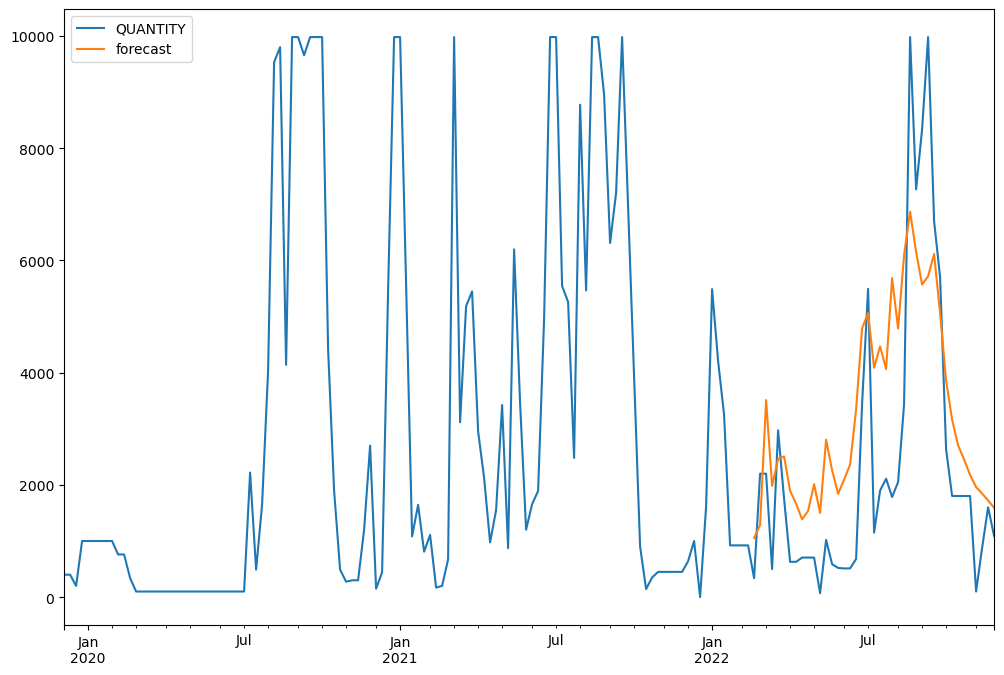

In [142]:
model1=sm.tsa.statespace.SARIMAX(d4.QUANTITY,order=(1, 1, 1),seasonal_order=(2,1,0,52))
results=model1.fit()
d4['forecast']=results.predict(start=115,end=155,dynamic=True)
d4[['QUANTITY','forecast']].plot(figsize=(12,8))

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.17718D+00    |proj g|=  2.76011D-01


 This problem is unconstrained.



At iterate    5    f=  6.06835D+00    |proj g|=  9.57321D-03

At iterate   10    f=  6.06639D+00    |proj g|=  1.03741D-04

At iterate   15    f=  6.06638D+00    |proj g|=  1.87388D-03

At iterate   20    f=  6.06505D+00    |proj g|=  2.58721D-02

At iterate   25    f=  5.97852D+00    |proj g|=  2.16608D-01

At iterate   30    f=  5.95624D+00    |proj g|=  7.69845D-03

At iterate   35    f=  5.95008D+00    |proj g|=  1.25389D-02

At iterate   40    f=  5.94840D+00    |proj g|=  2.53408D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     50      1     0     0   2.921D-05   5.948D+00
  F =   5.94839848328

<Axes: >

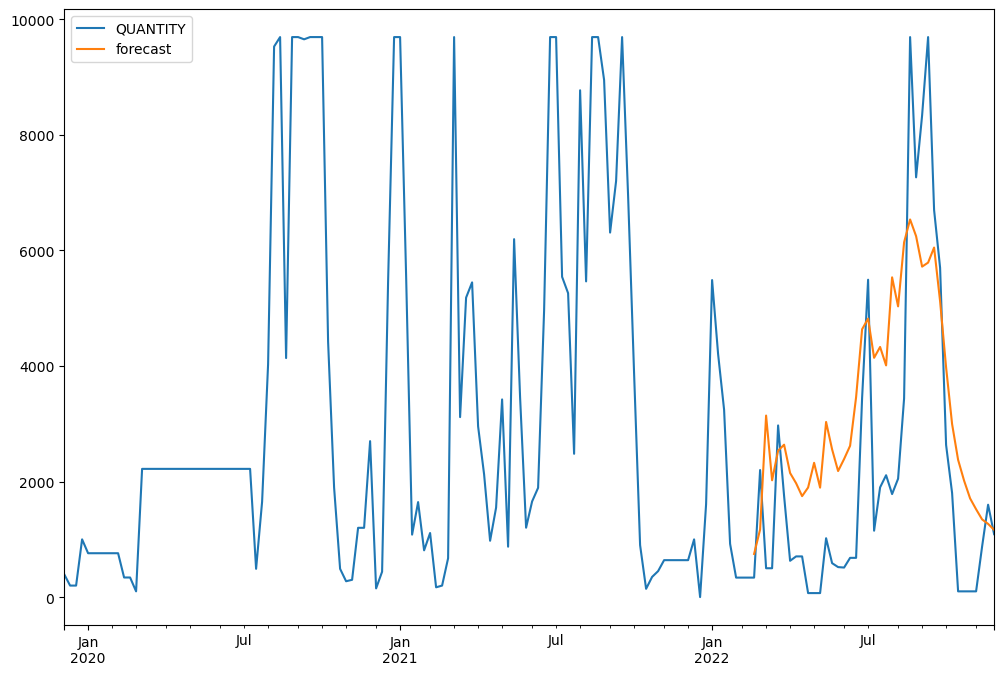

In [143]:
model=sm.tsa.statespace.SARIMAX(d5.QUANTITY,order=(1, 1, 1),seasonal_order=(2,1,0,52))
results=model.fit()
d5['forecast']=results.predict(start=115,end=155,dynamic=True)
d5[['QUANTITY','forecast']].plot(figsize=(12,8))

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.18437D+00    |proj g|=  2.87606D-01

At iterate    5    f=  6.07102D+00    |proj g|=  7.54238D-03

At iterate   10    f=  6.06894D+00    |proj g|=  2.69618D-04

At iterate   15    f=  6.06894D+00    |proj g|=  9.43081D-04

At iterate   20    f=  6.06831D+00    |proj g|=  1.30864D-02

At iterate   25    f=  5.98630D+00    |proj g|=  7.42264D-02

At iterate   30    f=  5.95916D+00    |proj g|=  6.45633D-03

At iterate   35    f=  5.95878D+00    |proj g|=  9.04733D-04

At iterate   40    f=  5.95220D+00    |proj g|=  1.45173D-01

At iterate   45    f=  5.94409D+00    |proj g|=  4.32278D-02


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.94318D+00    |proj g|=  5.13303D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     70      1     0     0   5.133D-05   5.943D+00
  F =   5.9431827514417588     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


<Axes: >

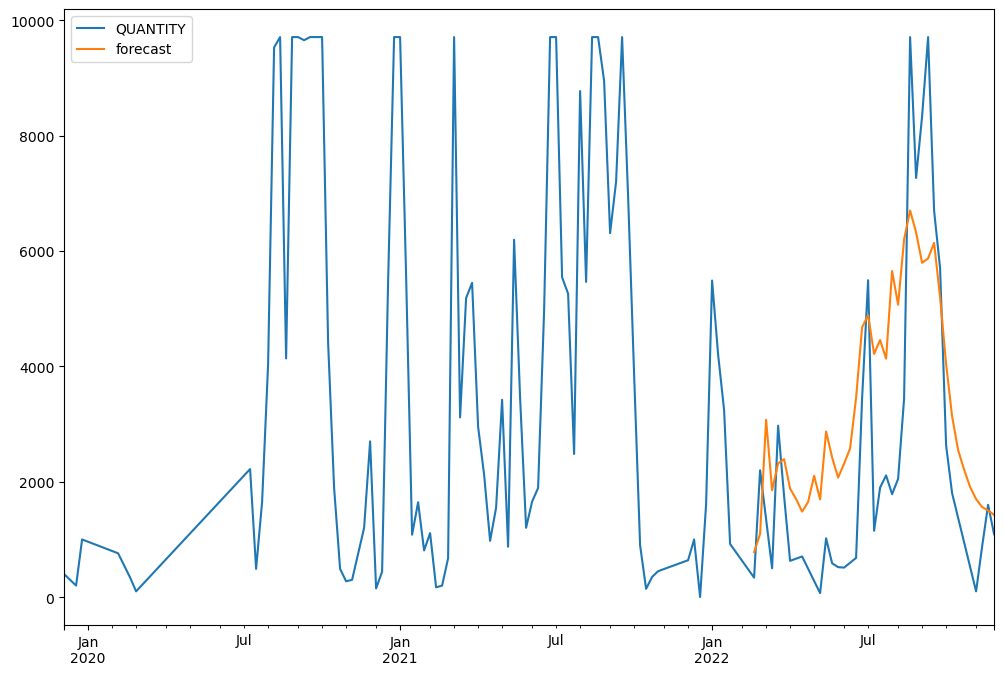

In [144]:
model=sm.tsa.statespace.SARIMAX(d6.QUANTITY,order=(1, 1, 1),seasonal_order=(2,1,0,52))
results=model.fit()
d6['forecast']=results.predict(start=115,end=155,dynamic=True)
d6[['QUANTITY','forecast']].plot(figsize=(12,8))

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.74461D+00    |proj g|=  7.18425D-01

At iterate    5    f=  6.25930D+00    |proj g|=  1.86229D-02

At iterate   10    f=  6.25263D+00    |proj g|=  3.58310D-04

At iterate   15    f=  6.25262D+00    |proj g|=  6.08429D-04

At iterate   20    f=  6.25217D+00    |proj g|=  7.15725D-03

At iterate   25    f=  6.17947D+00    |proj g|=  1.13445D-01

At iterate   30    f=  6.12381D+00    |proj g|=  6.89445D-02

At iterate   35    f=  6.12229D+00    |proj g|=  5.75686D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

<Axes: >

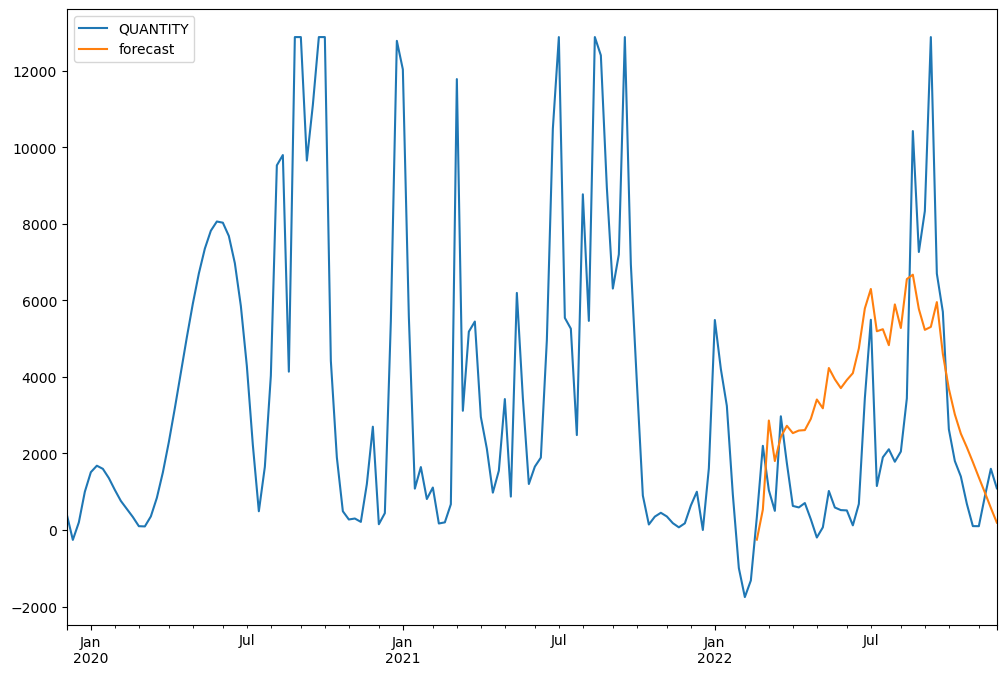

In [145]:
model=sm.tsa.statespace.SARIMAX(d7.QUANTITY,order=(1, 1, 1),seasonal_order=(2,1,0,52))
results=model.fit()
d7['forecast']=results.predict(start=115,end=155,dynamic=True)
d7[['QUANTITY','forecast']].plot(figsize=(12,8))

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.24058D+00    |proj g|=  3.05556D-01

At iterate    5    f=  6.11624D+00    |proj g|=  3.13924D-02

At iterate   10    f=  6.09579D+00    |proj g|=  2.61051D-03

At iterate   15    f=  6.09533D+00    |proj g|=  9.58108D-05

At iterate   20    f=  6.09529D+00    |proj g|=  1.10785D-03

At iterate   25    f=  6.06246D+00    |proj g|=  6.25264D-02

At iterate   30    f=  6.02387D+00    |proj g|=  2.93701D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

<Axes: >

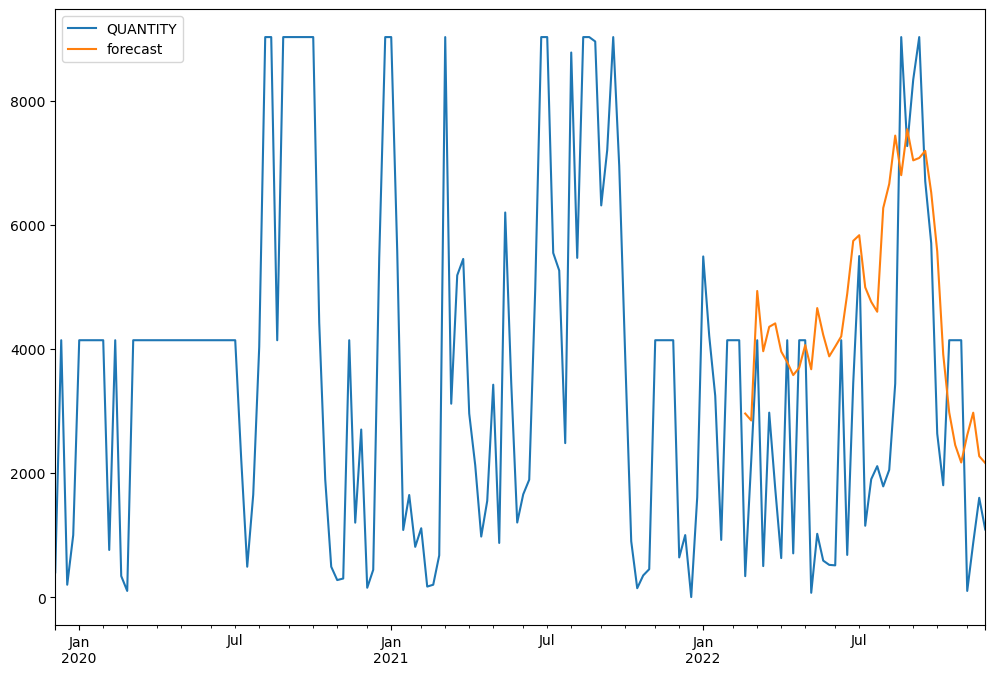

In [146]:
model=sm.tsa.statespace.SARIMAX(d8.QUANTITY,order=(1, 1, 1),seasonal_order=(2,1,0,52))
results=model.fit()
d8['forecast']=results.predict(start=115,end=155,dynamic=True)
d8[['QUANTITY','forecast']].plot(figsize=(12,8))

In [147]:
d1

QUANTITY     forecast
2019-12-08     400.0          NaN
2019-12-15     300.0          NaN
2019-12-22     200.0          NaN
2019-12-29    1000.0          NaN
2020-01-05     960.0          NaN
...              ...          ...
2022-10-30     525.5  3175.717481
2022-11-06     100.0  2989.108874
2022-11-13     875.0  2908.930445
2022-11-20    1600.0  2829.779648
2022-11-27    1090.0  3248.516150

[156 rows x 2 columns]

In [148]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(d1.iloc[115:156,0:1],d1.iloc[115:156,1:] ))
print(mean_absolute_percentage_error(d2.iloc[115:156,0:1],d2.iloc[115:156,1:] ))
print(mean_absolute_percentage_error(d3.iloc[115:156,0:1],d3.iloc[115:156,1:] ))
print(mean_absolute_percentage_error(d4.iloc[115:156,0:1],d4.iloc[115:156,1:] ))
print(mean_absolute_percentage_error(d5.iloc[115:156,0:1],d5.iloc[115:156,1:] ))
print(mean_absolute_percentage_error(d6.iloc[115:156,0:1],d6.iloc[115:156,1:] ))
print(mean_absolute_percentage_error(d7.iloc[115:156,0:1],d7.iloc[115:156,1:] ))
print(mean_absolute_percentage_error(d8.iloc[115:156,0:1],d8.iloc[115:156,1:] ))

3.755838901121182
2.349694067612681
5.637230494323212
2.1007109905138694
5.001643562065747
2.3493527610791216
4.832165038728201
3.7398309329720614


# Moving Average

In [149]:
import matplotlib.pyplot as plt
tl=125
tr=d1[0:tl]
tt=d1[tl:]

ma=d1.copy()
window_size=52
ma['forecast']=d1['QUANTITY'].rolling(window_size).mean()
ma['forecast'][tl:]=ma['forecast'][tl-1]

/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/390601600.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ma['forecast'][tl:]=ma['forecast'][tl-1]
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/390601600.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` inste

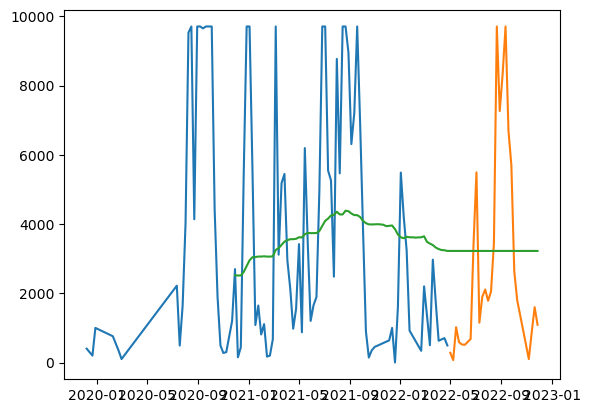

In [150]:
plt.plot(tr['QUANTITY'],label='train')
plt.plot(tt['QUANTITY'],label='test')
plt.plot(ma['forecast'],label='simple average forecast')

In [151]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(ma.iloc[115:156,0:1],ma.iloc[115:156,1:]))

4.196114981786793


In [152]:
import matplotlib.pyplot as plt
tl=125
tr=d2[0:tl]
tt=d2[tl:]

ma=d2.copy()
window_size=52
ma['forecast']=d2['QUANTITY'].rolling(window_size).mean()
ma['forecast'][tl:]=ma['forecast'][tl-1]

/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/3265162598.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ma['forecast'][tl:]=ma['forecast'][tl-1]
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/3265162598.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` ins

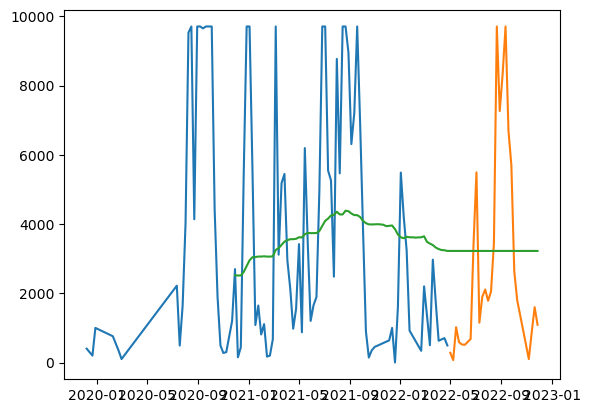

In [153]:
plt.plot(tr['QUANTITY'],label='train')
plt.plot(tt['QUANTITY'],label='test')
plt.plot(ma['forecast'],label='simple average forecast')

In [154]:
print(mean_absolute_percentage_error(ma.iloc[115:156,0:1],ma.iloc[115:156,1:]))

4.196114981786793


In [155]:
import matplotlib.pyplot as plt
tl=125
tr=d3[0:tl]
tt=d3[tl:]

ma=d3.copy()
window_size=52
ma['forecast']=d3['QUANTITY'].rolling(window_size).mean()
ma['forecast'][tl:]=ma['forecast'][tl-1]

/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/2178226014.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ma['forecast'][tl:]=ma['forecast'][tl-1]
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/2178226014.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` ins

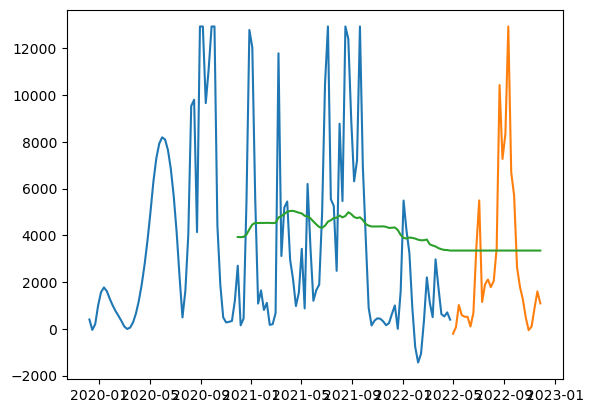

In [156]:
plt.plot(tr['QUANTITY'],label='train')
plt.plot(tt['QUANTITY'],label='test')
plt.plot(ma['forecast'],label='simple average forecast')

In [157]:
import matplotlib.pyplot as plt
tl=125
tr=d4[0:tl]
tt=d4[tl:]

ma=d4.copy()
window_size=52
ma['forecast']=d4['QUANTITY'].rolling(window_size).mean()
ma['forecast'][tl:]=ma['forecast'][tl-1]

/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/1383618506.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ma['forecast'][tl:]=ma['forecast'][tl-1]
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/1383618506.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` ins

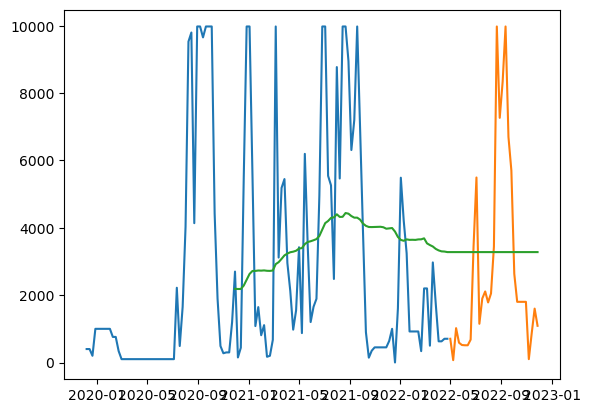

In [158]:
plt.plot(tr['QUANTITY'],label='train')
plt.plot(tt['QUANTITY'],label='test')
plt.plot(ma['forecast'],label='simple average forecast')

In [159]:
print(mean_absolute_percentage_error(ma.iloc[115:156,0:1],ma.iloc[115:156,1:]))

3.8992914037960977


In [160]:
import matplotlib.pyplot as plt
tl=125
tr=d5[0:tl]
tt=d5[tl:]

ma=d5.copy()
window_size=52
ma['forecast']=d5['QUANTITY'].rolling(window_size).mean()
ma['forecast'][tl:]=ma['forecast'][tl-1]

/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/2686684914.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ma['forecast'][tl:]=ma['forecast'][tl-1]
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/2686684914.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` ins

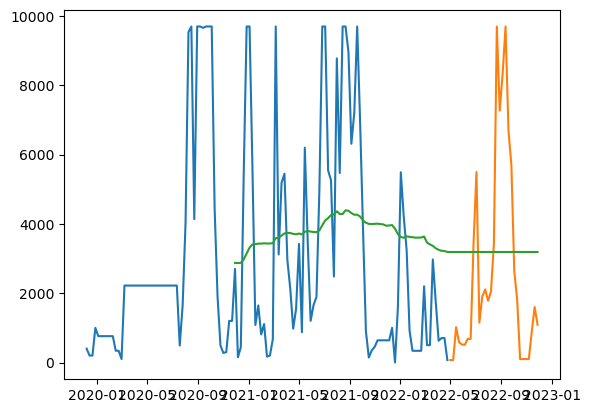

In [161]:
plt.plot(tr['QUANTITY'],label='train')
plt.plot(tt['QUANTITY'],label='test')
plt.plot(ma['forecast'],label='simple average forecast')

In [162]:
print(mean_absolute_percentage_error(ma.iloc[115:156,0:1],ma.iloc[115:156,1:]))

8.068196909205401


In [163]:
import matplotlib.pyplot as plt
tl=125
tr=d6[0:tl]
tt=d6[tl:]

ma=d6.copy()
window_size=52
ma['forecast']=d6['QUANTITY'].rolling(window_size).mean()
ma['forecast'][tl:]=ma['forecast'][tl-1]

/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/346624677.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ma['forecast'][tl:]=ma['forecast'][tl-1]
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/346624677.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` inste

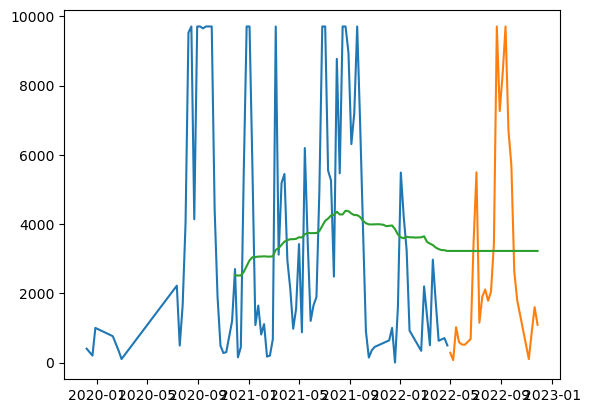

In [164]:
plt.plot(tr['QUANTITY'],label='train')
plt.plot(tt['QUANTITY'],label='test')
plt.plot(ma['forecast'],label='simple average forecast')

In [165]:
print(mean_absolute_percentage_error(ma.iloc[115:156,0:1],ma.iloc[115:156,1:]))

4.1959828195756605


In [166]:
import matplotlib.pyplot as plt
tl=125
tr=d7[0:tl]
tt=d7[tl:]

ma=d7.copy()
window_size=52
ma['forecast']=d7['QUANTITY'].rolling(window_size).mean()
ma['forecast'][tl:]=ma['forecast'][tl-1]

/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/630900693.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ma['forecast'][tl:]=ma['forecast'][tl-1]
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/630900693.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` inste

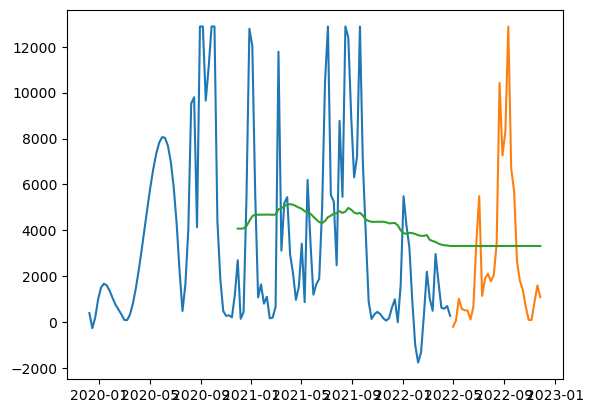

In [167]:
plt.plot(tr['QUANTITY'],label='train')
plt.plot(tt['QUANTITY'],label='test')
plt.plot(ma['forecast'],label='simple average forecast')

In [168]:
print(mean_absolute_percentage_error(ma.iloc[115:156,0:1],ma.iloc[115:156,1:]))

5.885626777749835


In [169]:
import matplotlib.pyplot as plt
tl=125
tr=d8[0:tl]
tt=d8[tl:]

ma=d8.copy()
window_size=52
ma['forecast']=d8['QUANTITY'].rolling(window_size).mean()
ma['forecast'][tl:]=ma['forecast'][tl-1]

/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/157521582.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ma['forecast'][tl:]=ma['forecast'][tl-1]
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/157521582.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` inste

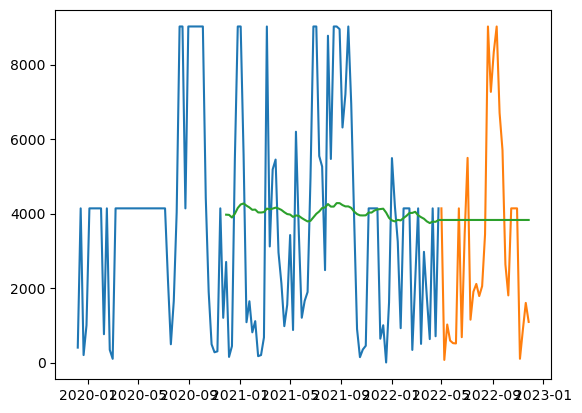

In [170]:
plt.plot(tr['QUANTITY'],label='train')
plt.plot(tt['QUANTITY'],label='test')
plt.plot(ma['forecast'],label='simple average forecast')

In [171]:
print(mean_absolute_percentage_error(ma.iloc[115:156,0:1],ma.iloc[115:156,1:]))

4.024878550398212


# Holt-Winters Method

In [172]:
d1=d1.iloc[:,:1]
d2=d2.iloc[:,:1]
d3=d3.iloc[:,:1]
d4=d4.iloc[:,:1]
d5=d5.iloc[:,:1]
d6=d6.iloc[:,:1]
d7=d7.iloc[:,:1]
d8=d8.iloc[:,:1]

In [173]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
train_data = d1.iloc[:125,:1]
test_data = d1.iloc[125:,:1]
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=52)
result = model.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [174]:
predictions = result.forecast(len(test_data))

In [175]:
predictions

2022-05-01     1989.672935
2022-05-08       65.547081
2022-05-15     4362.398913
2022-05-22     2459.055228
2022-05-29      753.408275
2022-06-05     1885.586736
2022-06-12     2269.342464
2022-06-19     3258.712669
2022-06-26     4238.682801
2022-07-03     3562.084690
2022-07-10     2171.497055
2022-07-17     1117.390999
2022-07-24     1297.118689
2022-07-31     5184.312049
2022-08-07     8278.363302
2022-08-14    10485.947178
2022-08-21     6421.377091
2022-08-28     9796.436912
2022-09-04     9542.156019
2022-09-11    10247.097681
2022-09-18    11098.277575
2022-09-25    10185.231688
2022-10-02     9620.303573
2022-10-09     5427.435984
2022-10-16     3376.865084
2022-10-23     2214.959256
2022-10-30     1818.958686
2022-11-06     1696.588252
2022-11-13     1971.147913
2022-11-20     2329.485454
2022-11-27     3545.288274
Freq: W-SUN, dtype: float64

In [176]:
print(mean_absolute_percentage_error(d1[125:],predictions))

2.0562239040063472


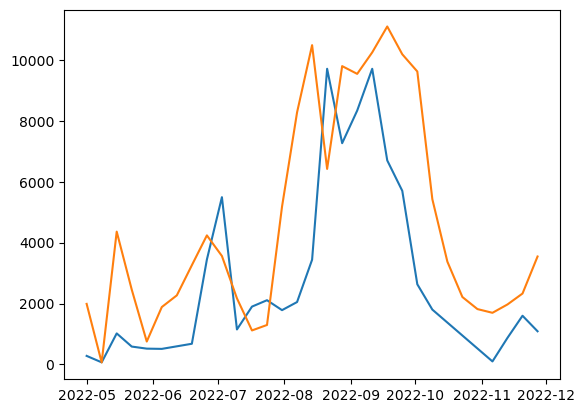

In [177]:

plt.plot(d1[125:],label='test')
plt.plot(predictions,label='forecast')

In [178]:
result.predict(157)

2022-12-11    2208.289106
Freq: W-SUN, dtype: float64

In [179]:
from statsmodels.tsa.api import ExponentialSmoothing
train_data = d2[:125]
test_data = d2[125:]
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=52)
result = model.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [180]:
predictions = result.forecast(len(test_data))

In [181]:
print(mean_absolute_percentage_error(d2[125:],predictions))

2.0562239040063472


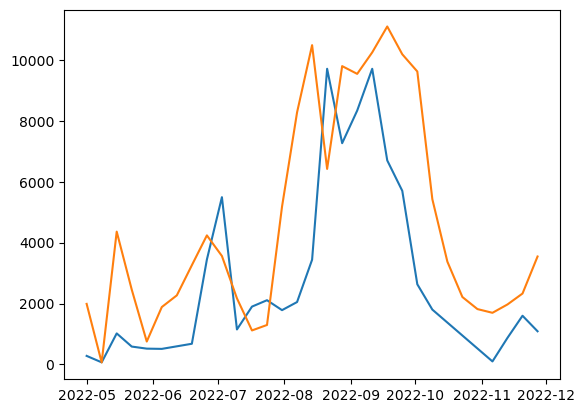

In [182]:
plt.plot(d2[125:],label='test')
plt.plot(predictions,label='forecast')

In [183]:
from statsmodels.tsa.api import ExponentialSmoothing
train_data = d3[:125]
test_data = d3[125:]
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=52)
result = model.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [184]:
predictions = result.forecast(len(test_data))

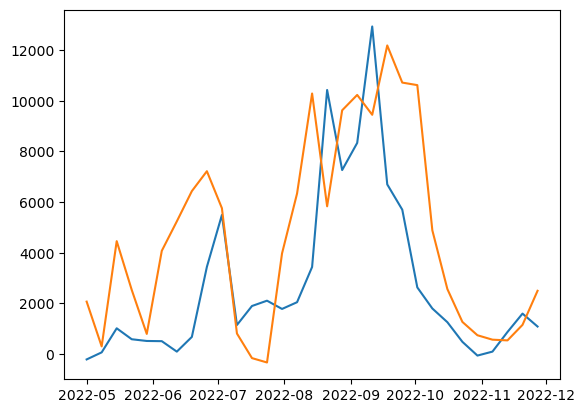

In [185]:
plt.plot(d3[125:],label='test')
plt.plot(predictions,label='forecast')

In [186]:
print(mean_absolute_percentage_error(d3[125:],predictions))

4.158740884714822


In [187]:
from statsmodels.tsa.api import ExponentialSmoothing
train_data = d4[:125]
test_data = d4[125:]
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=52)
result = model.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [188]:
predictions = result.forecast(len(test_data))

In [189]:
print(mean_absolute_percentage_error(d4[125:],predictions))

2.0395051285280865


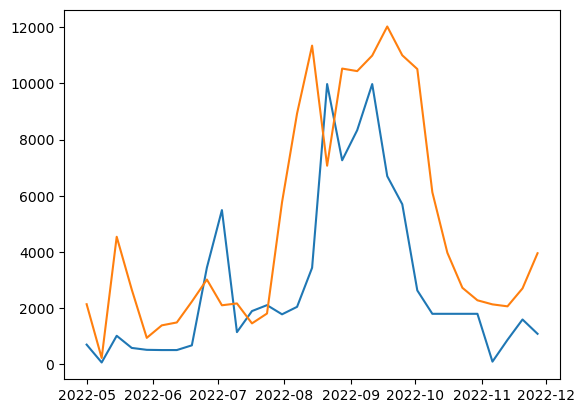

In [190]:
plt.plot(d4[125:],label='test')
plt.plot(predictions,label='forecast')

In [191]:
from statsmodels.tsa.api import ExponentialSmoothing
train_data = d5[:125]
test_data = d5[125:]
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=52)
result = model.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [192]:
predictions = result.forecast(len(test_data))

In [193]:
print(mean_absolute_percentage_error(d5[125:],predictions))

4.4010548644883025


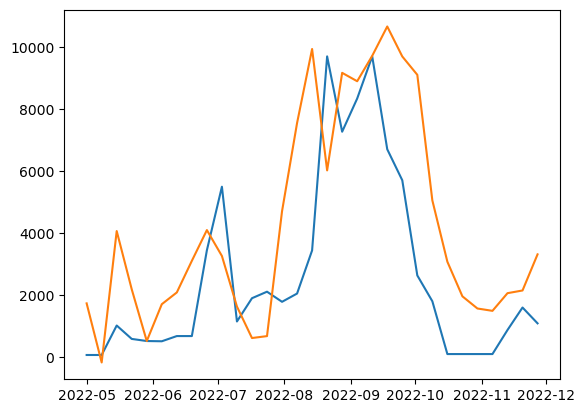

In [194]:
plt.plot(d5[125:],label='test')
plt.plot(predictions,label='forecast')

In [195]:
from statsmodels.tsa.api import ExponentialSmoothing
train_data = d6[:125]
test_data = d6[125:]
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=52)
result = model.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [196]:
predictions = result.forecast(len(test_data))

In [197]:
print(mean_absolute_percentage_error(d6[125:],predictions))

2.056126178893818


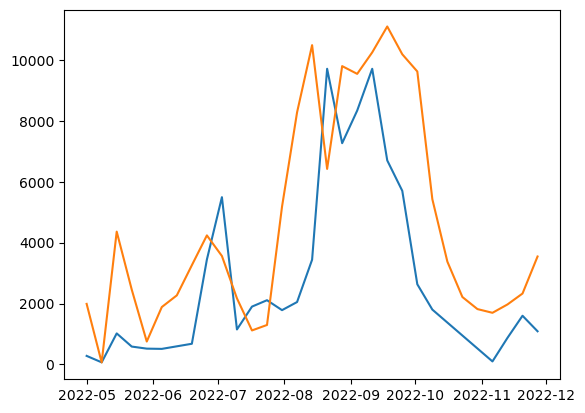

In [198]:
plt.plot(d6[125:],label='test')
plt.plot(predictions,label='forecast')

In [199]:
from statsmodels.tsa.api import ExponentialSmoothing
train_data = d7[:125]
test_data = d7[125:]
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=52)
result = model.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [200]:
predictions = result.forecast(len(test_data))

In [201]:
print(mean_absolute_percentage_error(d7[125:],predictions))

3.2063487148685366


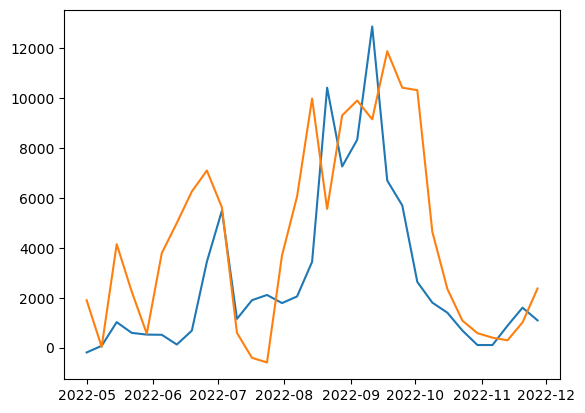

In [202]:
plt.plot(d7[125:],label='test')
plt.plot(predictions,label='forecast')

In [203]:
from statsmodels.tsa.api import ExponentialSmoothing
train_data = d8[:125]
test_data = d8[125:]
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=52)
result = model.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [204]:
predictions = result.forecast(len(test_data))

In [205]:
print(mean_absolute_percentage_error(d8[125:],predictions))

4.140844103575207


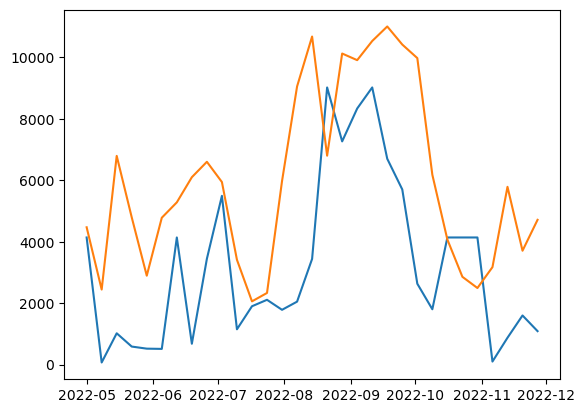

In [206]:
plt.plot(d8[125:],label='test')
plt.plot(predictions,label='forecast')

# Simple Exponential smoothing

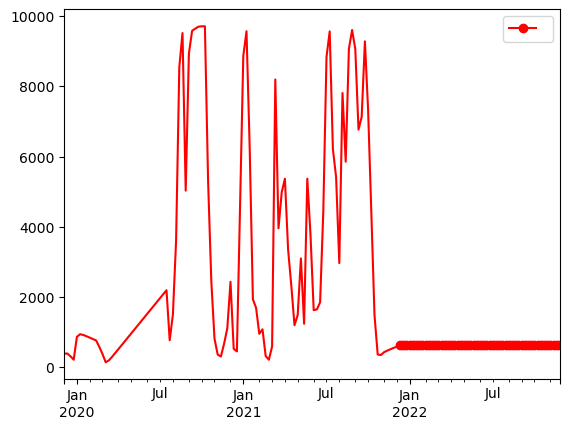

In [207]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
fit1 = SimpleExpSmoothing(d1.iloc[:105],initialization_method="estimated").fit()
fcast1 = fit1.forecast(51)
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(  color='red')
plt.show()

In [208]:
fcast1 

2021-12-12    632.426471
2021-12-19    632.426471
2021-12-26    632.426471
2022-01-02    632.426471
2022-01-09    632.426471
2022-01-16    632.426471
2022-01-23    632.426471
2022-01-30    632.426471
2022-02-06    632.426471
2022-02-13    632.426471
2022-02-20    632.426471
2022-02-27    632.426471
2022-03-06    632.426471
2022-03-13    632.426471
2022-03-20    632.426471
2022-03-27    632.426471
2022-04-03    632.426471
2022-04-10    632.426471
2022-04-17    632.426471
2022-04-24    632.426471
2022-05-01    632.426471
2022-05-08    632.426471
2022-05-15    632.426471
2022-05-22    632.426471
2022-05-29    632.426471
2022-06-05    632.426471
2022-06-12    632.426471
2022-06-19    632.426471
2022-06-26    632.426471
2022-07-03    632.426471
2022-07-10    632.426471
2022-07-17    632.426471
2022-07-24    632.426471
2022-07-31    632.426471
2022-08-07    632.426471
2022-08-14    632.426471
2022-08-21    632.426471
2022-08-28    632.426471
2022-09-04    632.426471
2022-09-11    632.426471


In [209]:
d1

QUANTITY
2019-12-08     400.0
2019-12-15     300.0
2019-12-22     200.0
2019-12-29    1000.0
2020-01-05     960.0
...              ...
2022-10-30     525.5
2022-11-06     100.0
2022-11-13     875.0
2022-11-20    1600.0
2022-11-27    1090.0

[156 rows x 1 columns]

In [210]:
print(mean_absolute_percentage_error(d1[105:],fcast1))

13.149092014977287


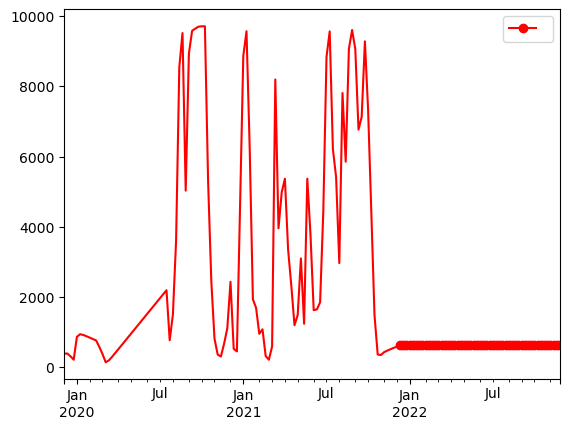

In [211]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
fit1 = SimpleExpSmoothing(d2.iloc[:105],initialization_method="estimated").fit()
fcast1 = fit1.forecast(51)
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(  color='red')
plt.show()

In [212]:
fcast1

2021-12-12    632.426471
2021-12-19    632.426471
2021-12-26    632.426471
2022-01-02    632.426471
2022-01-09    632.426471
2022-01-16    632.426471
2022-01-23    632.426471
2022-01-30    632.426471
2022-02-06    632.426471
2022-02-13    632.426471
2022-02-20    632.426471
2022-02-27    632.426471
2022-03-06    632.426471
2022-03-13    632.426471
2022-03-20    632.426471
2022-03-27    632.426471
2022-04-03    632.426471
2022-04-10    632.426471
2022-04-17    632.426471
2022-04-24    632.426471
2022-05-01    632.426471
2022-05-08    632.426471
2022-05-15    632.426471
2022-05-22    632.426471
2022-05-29    632.426471
2022-06-05    632.426471
2022-06-12    632.426471
2022-06-19    632.426471
2022-06-26    632.426471
2022-07-03    632.426471
2022-07-10    632.426471
2022-07-17    632.426471
2022-07-24    632.426471
2022-07-31    632.426471
2022-08-07    632.426471
2022-08-14    632.426471
2022-08-21    632.426471
2022-08-28    632.426471
2022-09-04    632.426471
2022-09-11    632.426471


In [213]:
print(mean_absolute_percentage_error(d2[105:],fcast1))

13.149092014977287


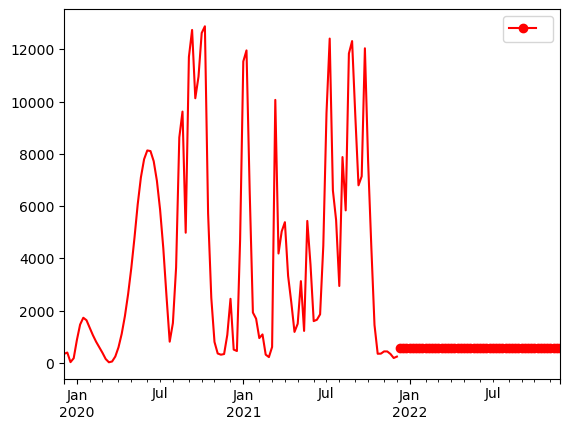

In [214]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
fit1 = SimpleExpSmoothing(d3.iloc[:105],initialization_method="estimated").fit()
fcast1 = fit1.forecast(51)
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(  color='red')
plt.show()

In [215]:
fcast1

2021-12-12    577.890642
2021-12-19    577.890642
2021-12-26    577.890642
2022-01-02    577.890642
2022-01-09    577.890642
2022-01-16    577.890642
2022-01-23    577.890642
2022-01-30    577.890642
2022-02-06    577.890642
2022-02-13    577.890642
2022-02-20    577.890642
2022-02-27    577.890642
2022-03-06    577.890642
2022-03-13    577.890642
2022-03-20    577.890642
2022-03-27    577.890642
2022-04-03    577.890642
2022-04-10    577.890642
2022-04-17    577.890642
2022-04-24    577.890642
2022-05-01    577.890642
2022-05-08    577.890642
2022-05-15    577.890642
2022-05-22    577.890642
2022-05-29    577.890642
2022-06-05    577.890642
2022-06-12    577.890642
2022-06-19    577.890642
2022-06-26    577.890642
2022-07-03    577.890642
2022-07-10    577.890642
2022-07-17    577.890642
2022-07-24    577.890642
2022-07-31    577.890642
2022-08-07    577.890642
2022-08-14    577.890642
2022-08-21    577.890642
2022-08-28    577.890642
2022-09-04    577.890642
2022-09-11    577.890642


In [216]:
print(mean_absolute_percentage_error(d3[105:],fcast1))

12.504579438591078


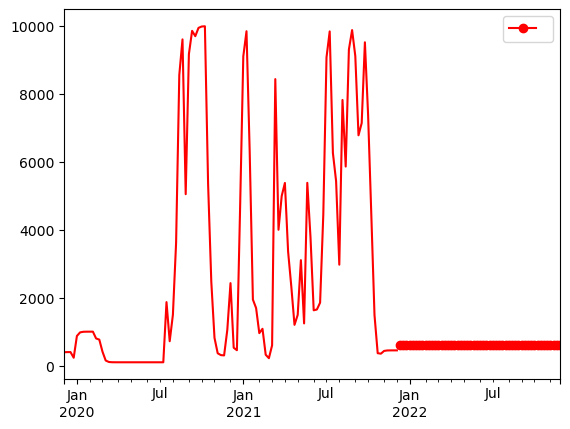

In [217]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
fit1 = SimpleExpSmoothing(d4.iloc[:105],initialization_method="estimated").fit()
fcast1 = fit1.forecast(51)
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(  color='red')
plt.show()

In [218]:
fcast1

2021-12-12    608.515032
2021-12-19    608.515032
2021-12-26    608.515032
2022-01-02    608.515032
2022-01-09    608.515032
2022-01-16    608.515032
2022-01-23    608.515032
2022-01-30    608.515032
2022-02-06    608.515032
2022-02-13    608.515032
2022-02-20    608.515032
2022-02-27    608.515032
2022-03-06    608.515032
2022-03-13    608.515032
2022-03-20    608.515032
2022-03-27    608.515032
2022-04-03    608.515032
2022-04-10    608.515032
2022-04-17    608.515032
2022-04-24    608.515032
2022-05-01    608.515032
2022-05-08    608.515032
2022-05-15    608.515032
2022-05-22    608.515032
2022-05-29    608.515032
2022-06-05    608.515032
2022-06-12    608.515032
2022-06-19    608.515032
2022-06-26    608.515032
2022-07-03    608.515032
2022-07-10    608.515032
2022-07-17    608.515032
2022-07-24    608.515032
2022-07-31    608.515032
2022-08-07    608.515032
2022-08-14    608.515032
2022-08-21    608.515032
2022-08-28    608.515032
2022-09-04    608.515032
2022-09-11    608.515032


In [219]:
print(mean_absolute_percentage_error(d4[105:],fcast1))

12.681757389649174


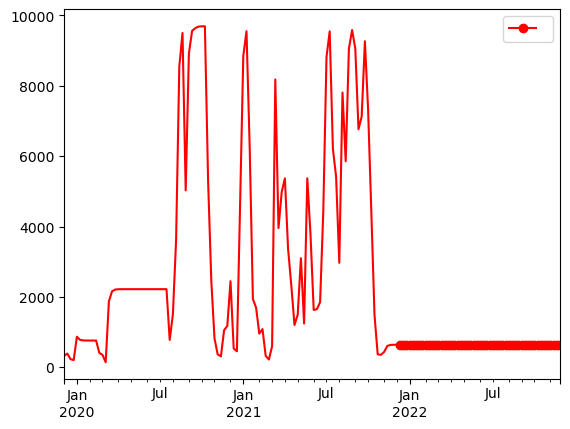

In [220]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
fit1 = SimpleExpSmoothing(d5.iloc[:105],initialization_method="estimated").fit()
fcast1 = fit1.forecast(51)
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(  color='red')
plt.show()

In [221]:
fcast1

2021-12-12    639.973889
2021-12-19    639.973889
2021-12-26    639.973889
2022-01-02    639.973889
2022-01-09    639.973889
2022-01-16    639.973889
2022-01-23    639.973889
2022-01-30    639.973889
2022-02-06    639.973889
2022-02-13    639.973889
2022-02-20    639.973889
2022-02-27    639.973889
2022-03-06    639.973889
2022-03-13    639.973889
2022-03-20    639.973889
2022-03-27    639.973889
2022-04-03    639.973889
2022-04-10    639.973889
2022-04-17    639.973889
2022-04-24    639.973889
2022-05-01    639.973889
2022-05-08    639.973889
2022-05-15    639.973889
2022-05-22    639.973889
2022-05-29    639.973889
2022-06-05    639.973889
2022-06-12    639.973889
2022-06-19    639.973889
2022-06-26    639.973889
2022-07-03    639.973889
2022-07-10    639.973889
2022-07-17    639.973889
2022-07-24    639.973889
2022-07-31    639.973889
2022-08-07    639.973889
2022-08-14    639.973889
2022-08-21    639.973889
2022-08-28    639.973889
2022-09-04    639.973889
2022-09-11    639.973889


In [222]:
print(mean_absolute_percentage_error(d5[105:],fcast1))

13.924479150916705


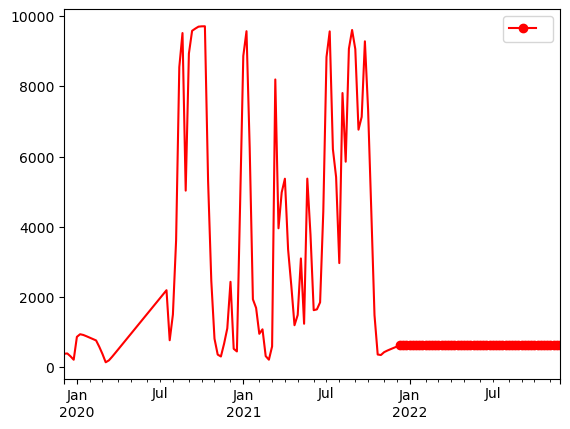

In [223]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
fit1 = SimpleExpSmoothing(d6.iloc[:105],initialization_method="estimated").fit()
fcast1 = fit1.forecast(51)
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(  color='red')
plt.show()

In [224]:
fcast1

2021-12-12    632.438462
2021-12-19    632.438462
2021-12-26    632.438462
2022-01-02    632.438462
2022-01-09    632.438462
2022-01-16    632.438462
2022-01-23    632.438462
2022-01-30    632.438462
2022-02-06    632.438462
2022-02-13    632.438462
2022-02-20    632.438462
2022-02-27    632.438462
2022-03-06    632.438462
2022-03-13    632.438462
2022-03-20    632.438462
2022-03-27    632.438462
2022-04-03    632.438462
2022-04-10    632.438462
2022-04-17    632.438462
2022-04-24    632.438462
2022-05-01    632.438462
2022-05-08    632.438462
2022-05-15    632.438462
2022-05-22    632.438462
2022-05-29    632.438462
2022-06-05    632.438462
2022-06-12    632.438462
2022-06-19    632.438462
2022-06-26    632.438462
2022-07-03    632.438462
2022-07-10    632.438462
2022-07-17    632.438462
2022-07-24    632.438462
2022-07-31    632.438462
2022-08-07    632.438462
2022-08-14    632.438462
2022-08-21    632.438462
2022-08-28    632.438462
2022-09-04    632.438462
2022-09-11    632.438462


In [225]:
print(mean_absolute_percentage_error(d6[105:],fcast1))

13.149299311786162


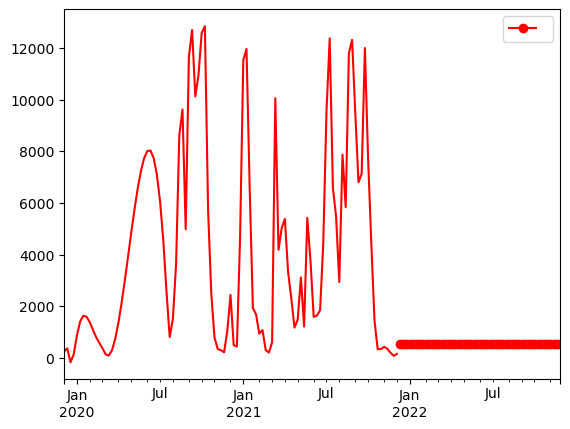

In [226]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
fit1 = SimpleExpSmoothing(d7.iloc[:105],initialization_method="estimated").fit()
fcast1 = fit1.forecast(51)
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(  color='red')
plt.show()

In [227]:
fcast1

2021-12-12    566.065358
2021-12-19    566.065358
2021-12-26    566.065358
2022-01-02    566.065358
2022-01-09    566.065358
2022-01-16    566.065358
2022-01-23    566.065358
2022-01-30    566.065358
2022-02-06    566.065358
2022-02-13    566.065358
2022-02-20    566.065358
2022-02-27    566.065358
2022-03-06    566.065358
2022-03-13    566.065358
2022-03-20    566.065358
2022-03-27    566.065358
2022-04-03    566.065358
2022-04-10    566.065358
2022-04-17    566.065358
2022-04-24    566.065358
2022-05-01    566.065358
2022-05-08    566.065358
2022-05-15    566.065358
2022-05-22    566.065358
2022-05-29    566.065358
2022-06-05    566.065358
2022-06-12    566.065358
2022-06-19    566.065358
2022-06-26    566.065358
2022-07-03    566.065358
2022-07-10    566.065358
2022-07-17    566.065358
2022-07-24    566.065358
2022-07-31    566.065358
2022-08-07    566.065358
2022-08-14    566.065358
2022-08-21    566.065358
2022-08-28    566.065358
2022-09-04    566.065358
2022-09-11    566.065358


In [228]:
print(mean_absolute_percentage_error(d7[105:],fcast1))

12.121661049622634


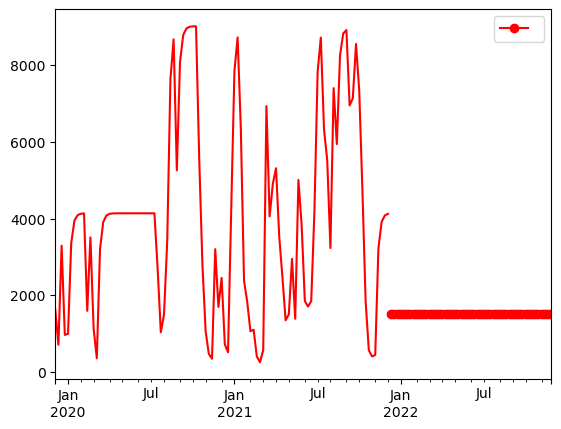

In [229]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
fit1 = SimpleExpSmoothing(d8.iloc[:105],initialization_method="estimated").fit()
fcast1 = fit1.forecast(51)
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(  color='red')
plt.show()

In [230]:
fcast1

2021-12-12    1499.881324
2021-12-19    1499.881324
2021-12-26    1499.881324
2022-01-02    1499.881324
2022-01-09    1499.881324
2022-01-16    1499.881324
2022-01-23    1499.881324
2022-01-30    1499.881324
2022-02-06    1499.881324
2022-02-13    1499.881324
2022-02-20    1499.881324
2022-02-27    1499.881324
2022-03-06    1499.881324
2022-03-13    1499.881324
2022-03-20    1499.881324
2022-03-27    1499.881324
2022-04-03    1499.881324
2022-04-10    1499.881324
2022-04-17    1499.881324
2022-04-24    1499.881324
2022-05-01    1499.881324
2022-05-08    1499.881324
2022-05-15    1499.881324
2022-05-22    1499.881324
2022-05-29    1499.881324
2022-06-05    1499.881324
2022-06-12    1499.881324
2022-06-19    1499.881324
2022-06-26    1499.881324
2022-07-03    1499.881324
2022-07-10    1499.881324
2022-07-17    1499.881324
2022-07-24    1499.881324
2022-07-31    1499.881324
2022-08-07    1499.881324
2022-08-14    1499.881324
2022-08-21    1499.881324
2022-08-28    1499.881324
2022-09-04  

In [231]:
print(mean_absolute_percentage_error(d8[105:],fcast1))

30.764751879576544


#Prophet Modelling


In [232]:
!pip install pystan~=2.14

  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [3 lines of output]
      /private/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/pip-install-aqltfo0a/pystan_bcba2f3bf1fa4b1083f862a4efe74e84/setup.py:61: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
        self.version = node.value.s
      Cython>=0.22 and NumPy are required.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pystan
  Running setup.py clean for pystan
Failed to build pystan
ERROR: Could not build wheels for pystan, which is required to install pyproject.toml-based projects


In [233]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [234]:
!pip install prophet



18:40:25 - cmdstanpy - INFO - Chain [1] start processing
18:40:25 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  dates = pd.date_range(
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetim

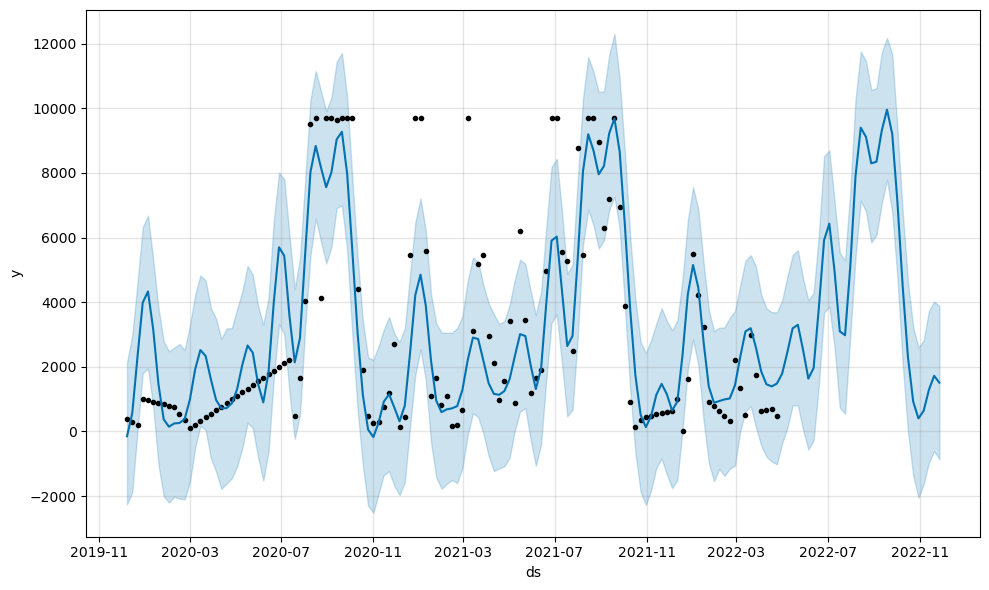

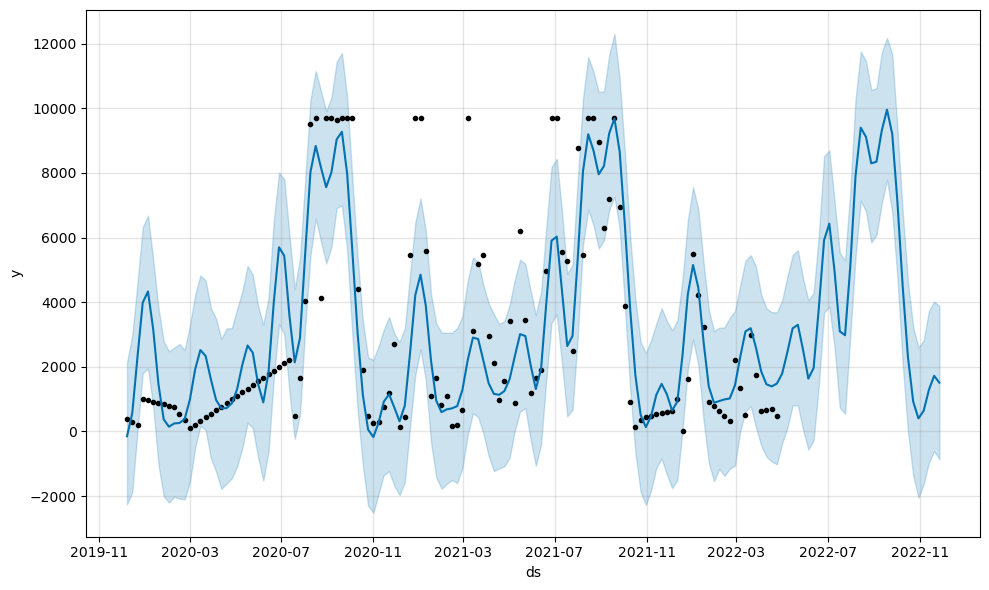

In [235]:
from prophet import Prophet
t1=d1.reset_index(level=0)
t1
t1.rename(columns = {'index':'ds','QUANTITY':'y'}, inplace = True)
m = Prophet(yearly_seasonality=True)
m.fit(t1.iloc[:125,:])
future = m.make_future_dataframe(periods=31, freq='w')
forecast = m.predict(future)
m.plot(forecast)

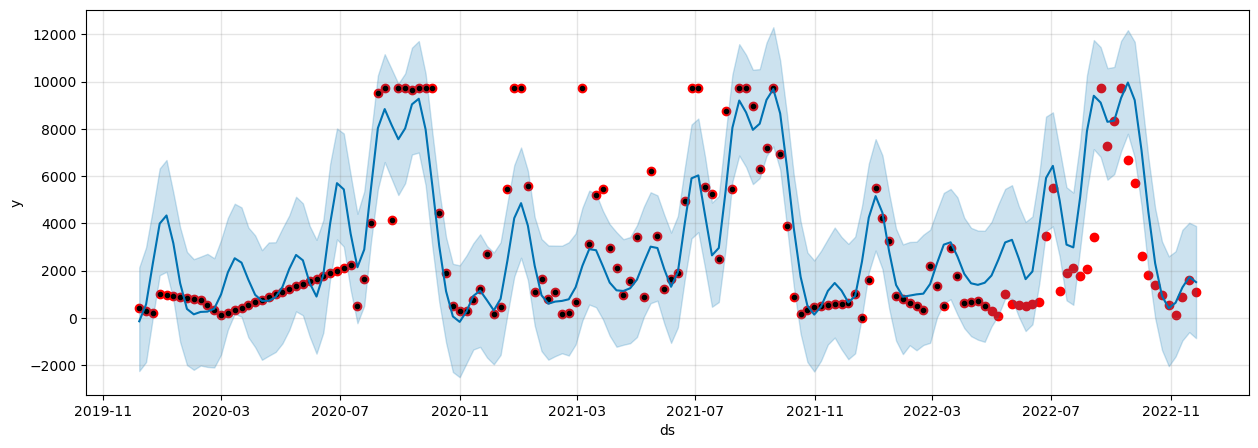

In [236]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(t1.ds, t1.y, color='r')
fig = m.plot(forecast, ax=ax)


In [237]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(d1.iloc[125:,0:],forecast['yhat'].iloc[125:]))

2.664038426576392


18:40:25 - cmdstanpy - INFO - Chain [1] start processing
18:40:25 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  dates = pd.date_range(
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetim

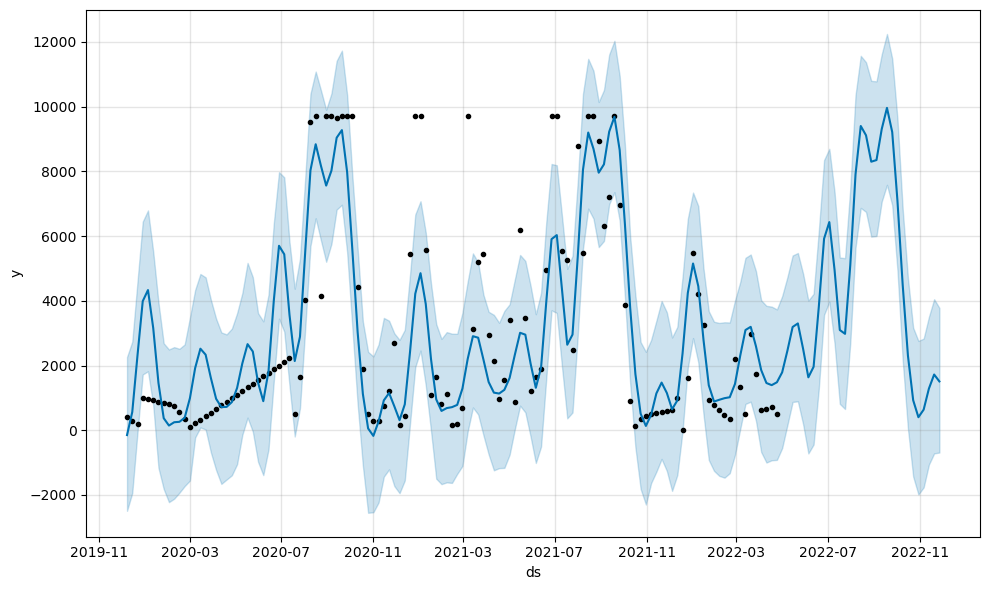

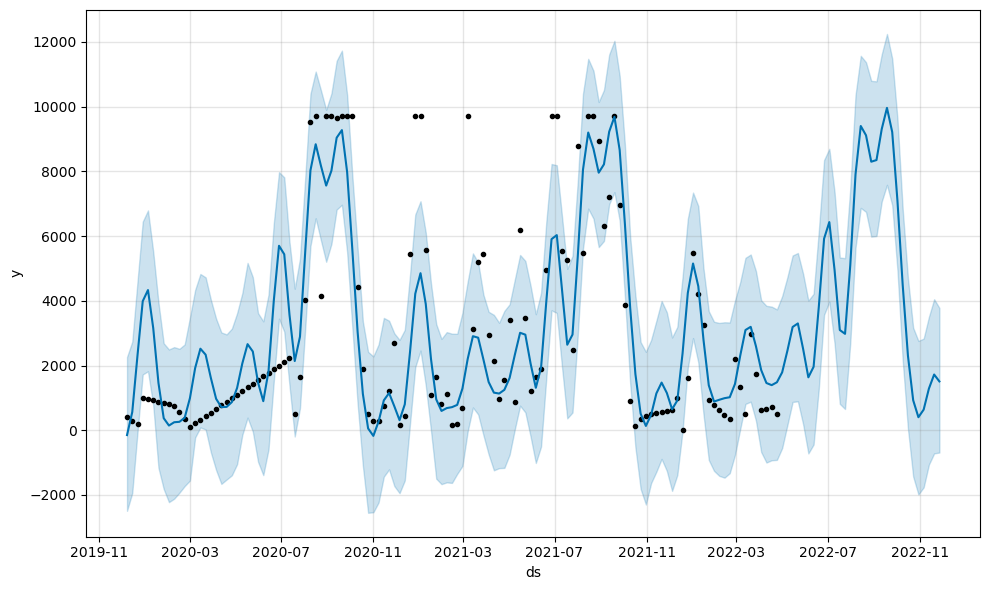

In [238]:
from prophet import Prophet
t1=d2.reset_index(level=0)
t1
t1.rename(columns = {'index':'ds','QUANTITY':'y'}, inplace = True)
m = Prophet(yearly_seasonality=True)
m.fit(t1.iloc[:125,:])
future = m.make_future_dataframe(periods=31, freq='w')
forecast = m.predict(future)
m.plot(forecast)

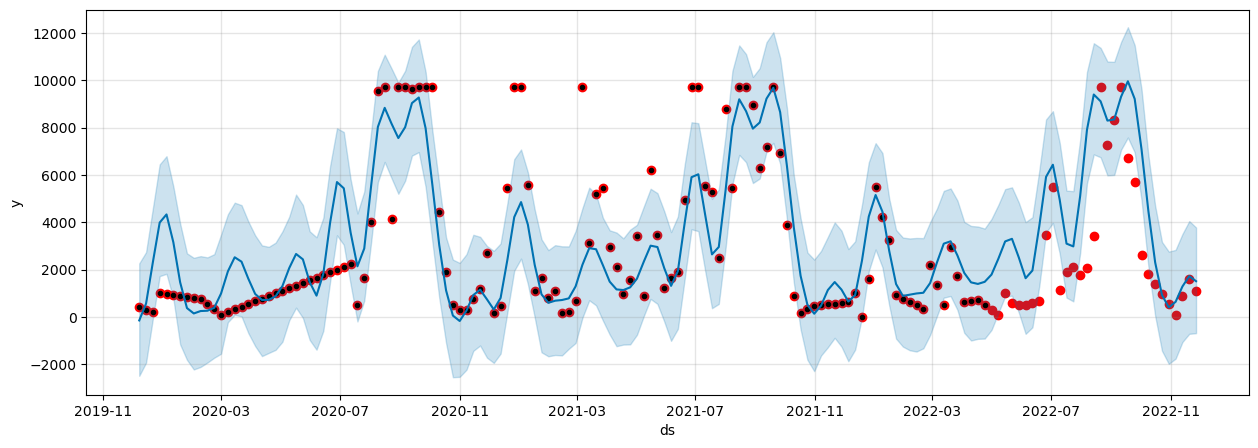

In [239]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(t1.ds, t1.y, color='r')
fig = m.plot(forecast, ax=ax)

In [240]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(d2.iloc[125:,0:],forecast['yhat'].iloc[125:]))

2.664038426576392


18:40:26 - cmdstanpy - INFO - Chain [1] start processing
18:40:26 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  dates = pd.date_range(
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetim

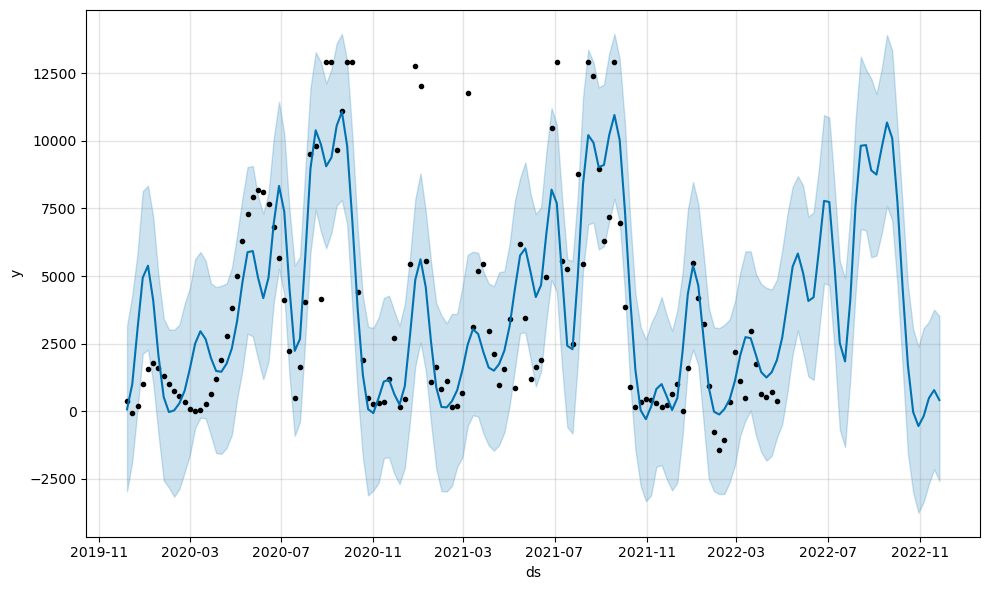

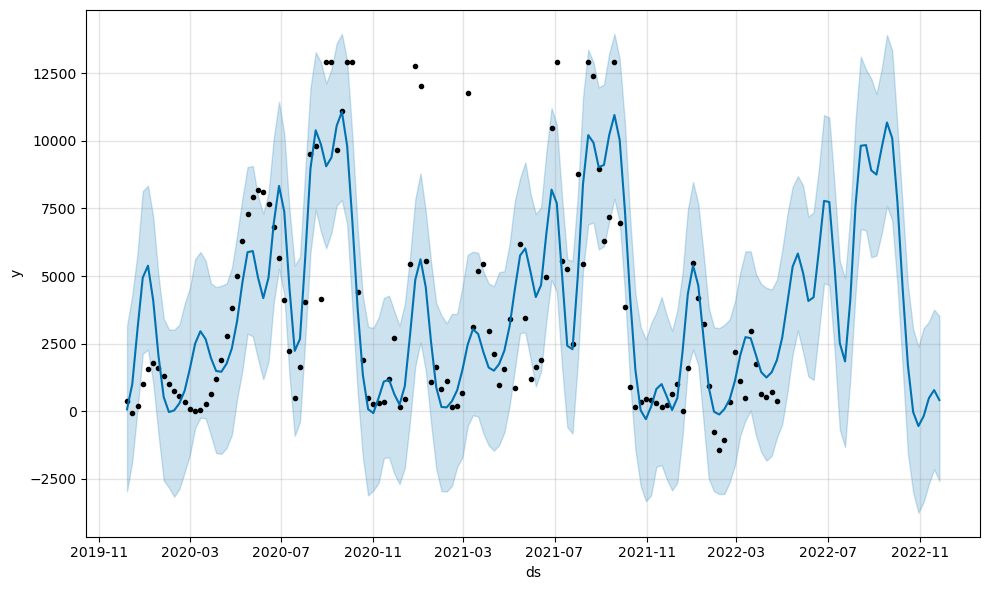

In [241]:
from prophet import Prophet
t1=d3.reset_index(level=0)
t1
t1.rename(columns = {'index':'ds','QUANTITY':'y'}, inplace = True)
m = Prophet(yearly_seasonality=True)
m.fit(t1.iloc[:125,:])
future = m.make_future_dataframe(periods=31, freq='w')
forecast = m.predict(future)
m.plot(forecast)

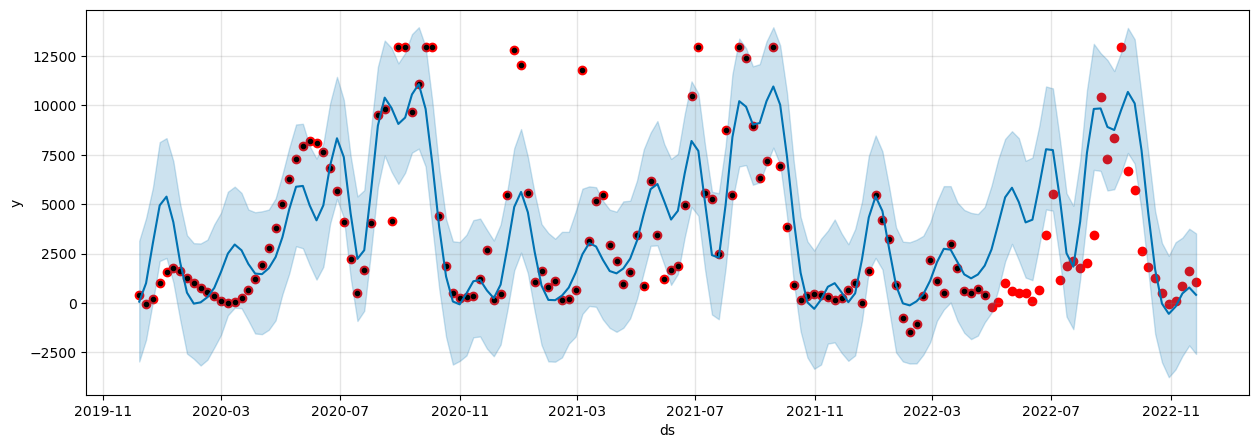

In [242]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(t1.ds, t1.y, color='r')
fig = m.plot(forecast, ax=ax)

In [243]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(d3.iloc[125:,0:],forecast['yhat'].iloc[125:]))

5.805004223154752


18:40:26 - cmdstanpy - INFO - Chain [1] start processing
18:40:26 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  dates = pd.date_range(
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetim

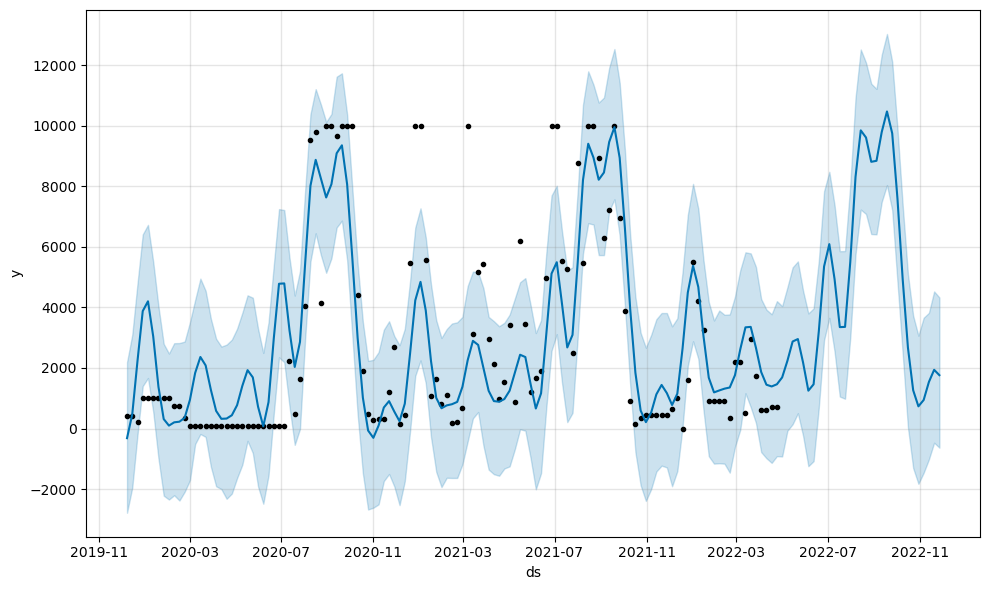

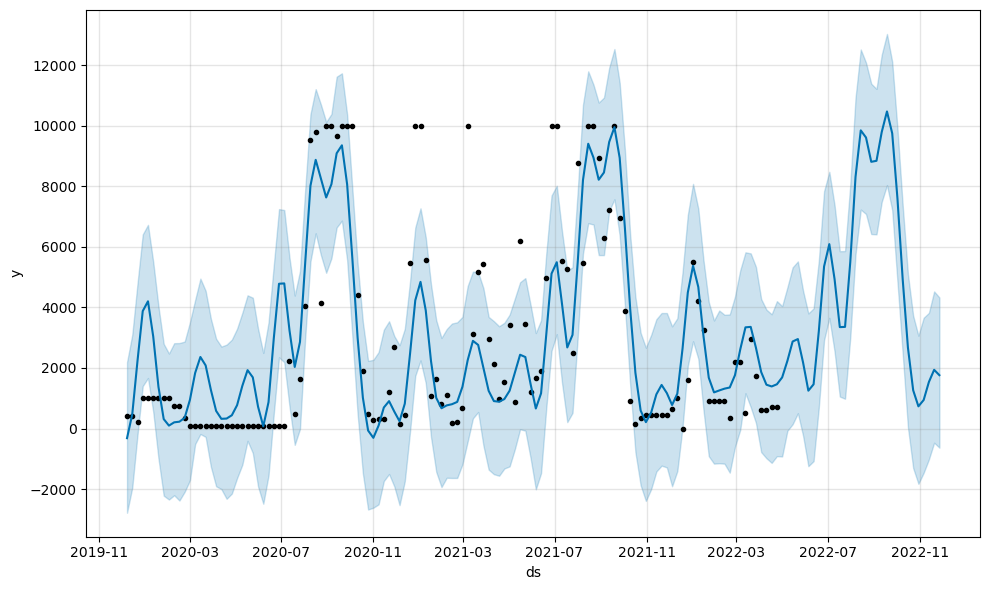

In [244]:
from prophet import Prophet
t1=d4.reset_index(level=0)
t1
t1.rename(columns = {'index':'ds','QUANTITY':'y'}, inplace = True)
m = Prophet(yearly_seasonality=True)
m.fit(t1.iloc[:125,:])
future = m.make_future_dataframe(periods=31, freq='w')
forecast = m.predict(future)
m.plot(forecast)

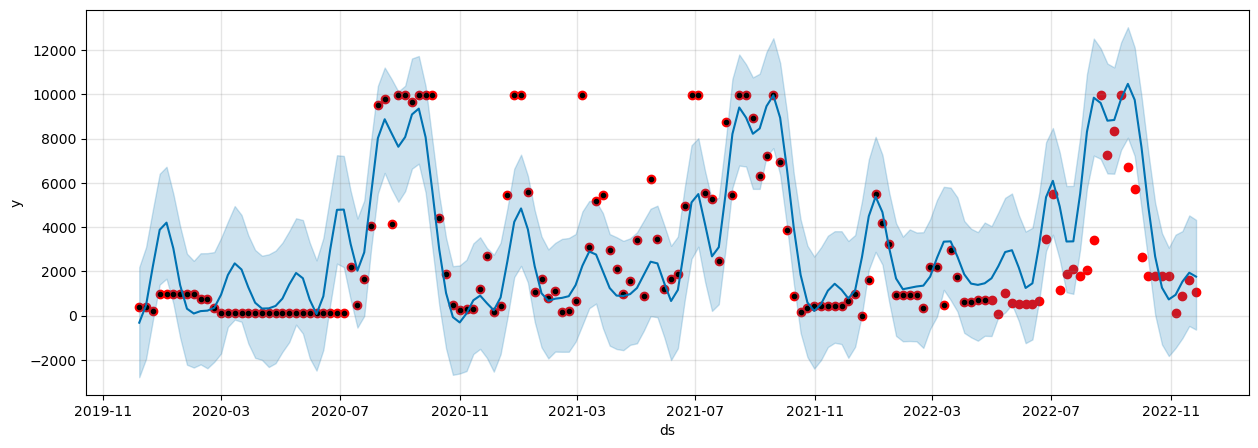

In [245]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(t1.ds, t1.y, color='r')
fig = m.plot(forecast, ax=ax)

In [246]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(d4.iloc[125:,0:],forecast['yhat'].iloc[125:]))

2.493684426913996


18:40:27 - cmdstanpy - INFO - Chain [1] start processing
18:40:27 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  dates = pd.date_range(
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetim

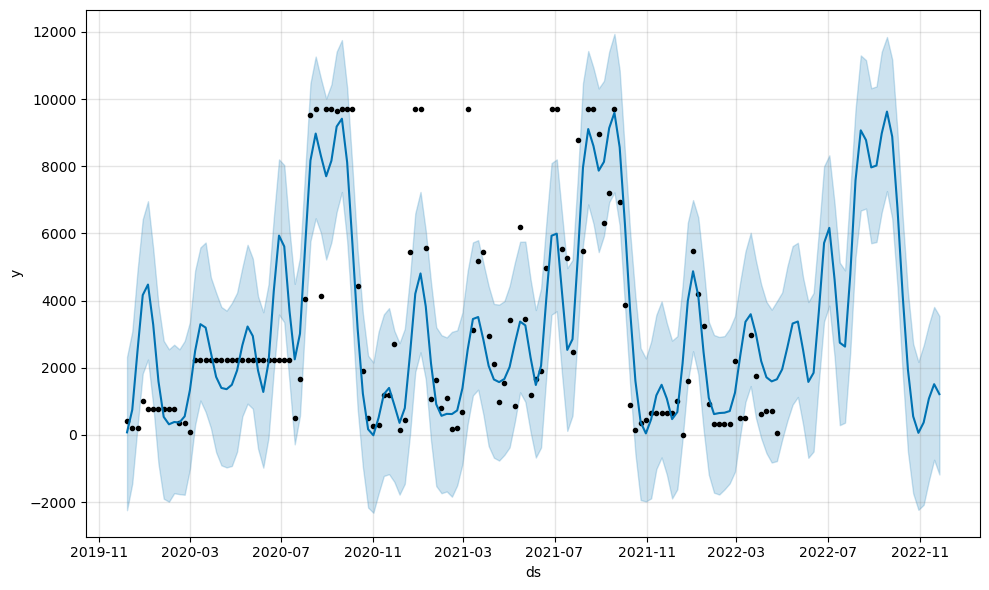

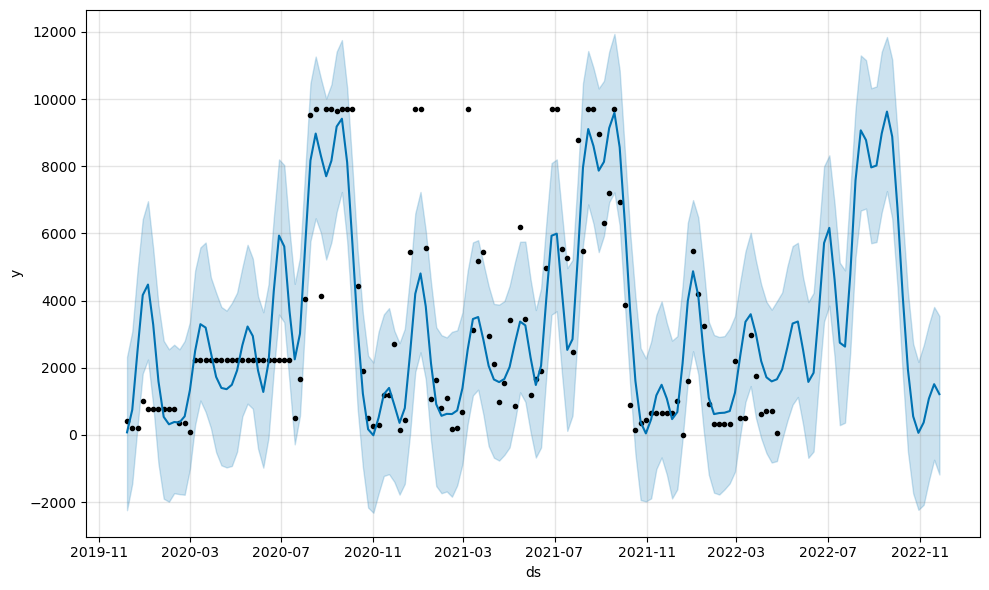

In [247]:
from prophet import Prophet
t1=d5.reset_index(level=0)
t1
t1.rename(columns = {'index':'ds','QUANTITY':'y'}, inplace = True)
m = Prophet(yearly_seasonality=True)
m.fit(t1.iloc[:125,:])
future = m.make_future_dataframe(periods=31, freq='w')
forecast = m.predict(future)
m.plot(forecast)

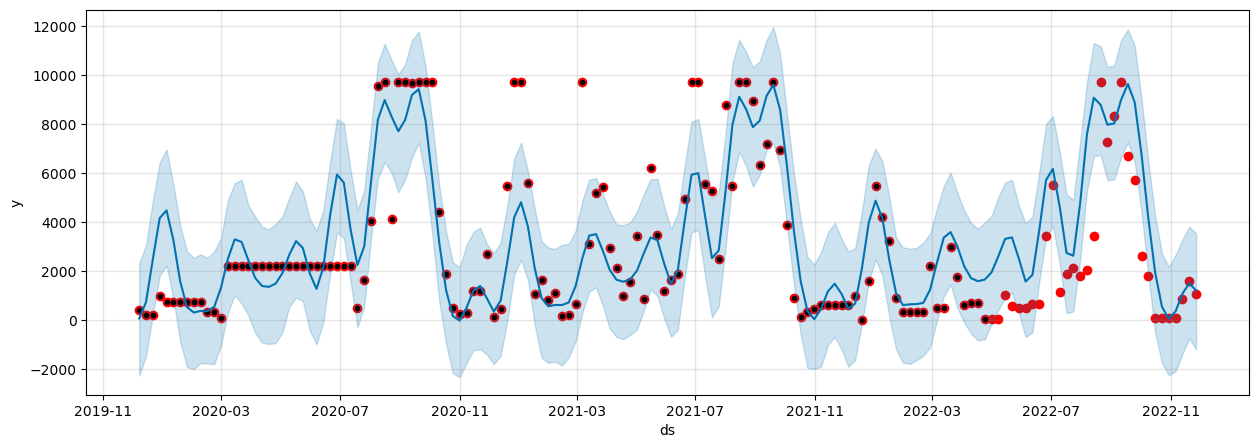

In [248]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(t1.ds, t1.y, color='r')
fig = m.plot(forecast, ax=ax)


In [249]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(d5.iloc[125:,0:],forecast['yhat'].iloc[125:]))

3.976557040793042


18:40:27 - cmdstanpy - INFO - Chain [1] start processing
18:40:27 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  dates = pd.date_range(
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetim

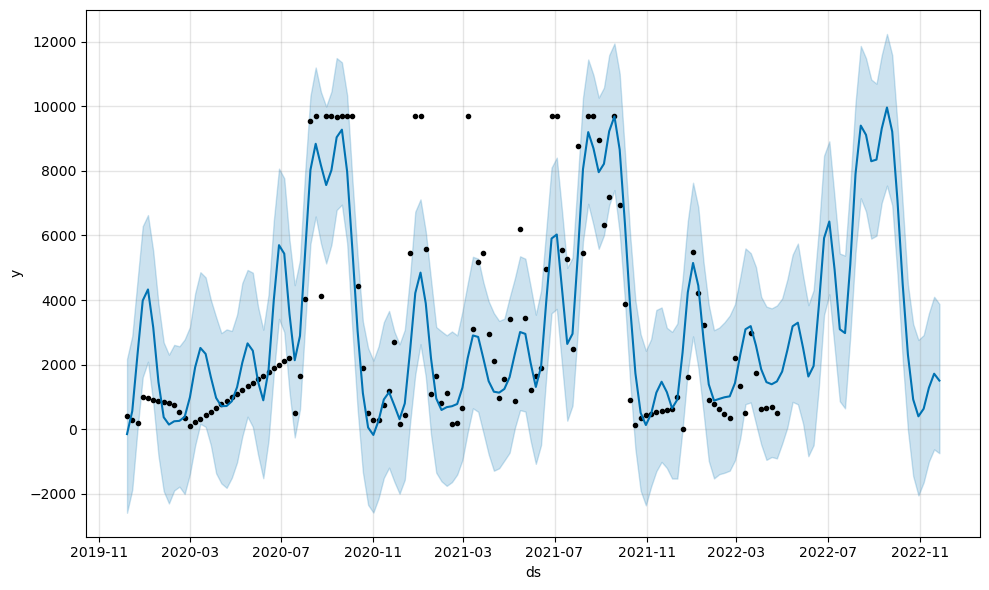

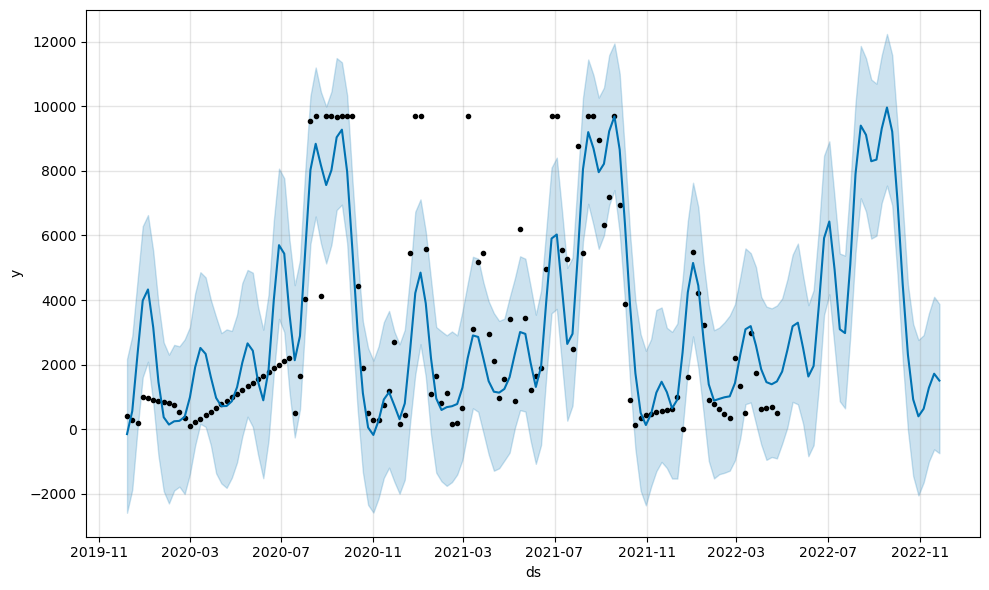

In [250]:
from prophet import Prophet
t1=d6.reset_index(level=0)
t1
t1.rename(columns = {'index':'ds','QUANTITY':'y'}, inplace = True)
m = Prophet(yearly_seasonality=True)
m.fit(t1.iloc[:125,:])
future = m.make_future_dataframe(periods=31, freq='w')
forecast = m.predict(future)
m.plot(forecast)

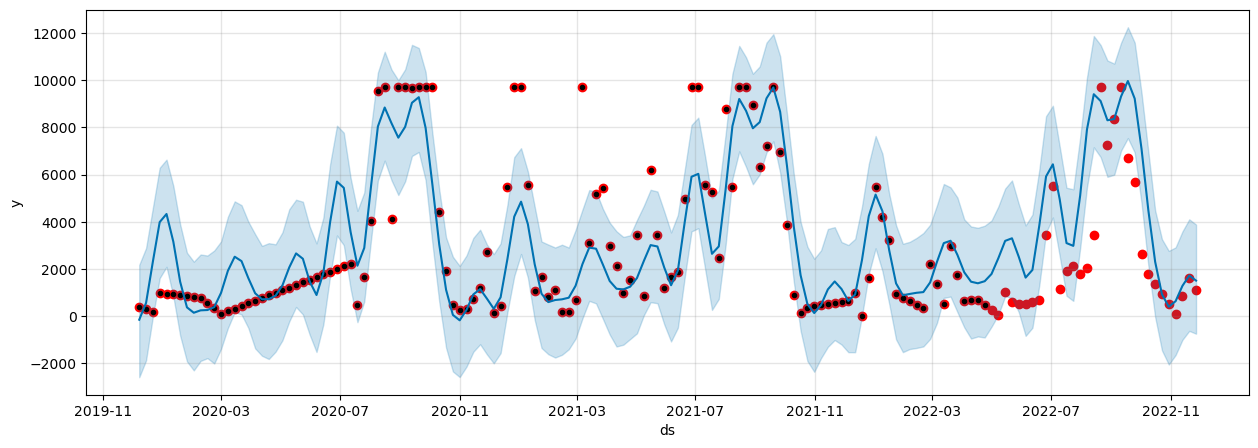

In [251]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(t1.ds, t1.y, color='r')
fig = m.plot(forecast, ax=ax)

In [252]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(d6.iloc[125:,0:],forecast['yhat'].iloc[125:]))

2.6629260198852958


18:40:28 - cmdstanpy - INFO - Chain [1] start processing
18:40:28 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  dates = pd.date_range(
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetim

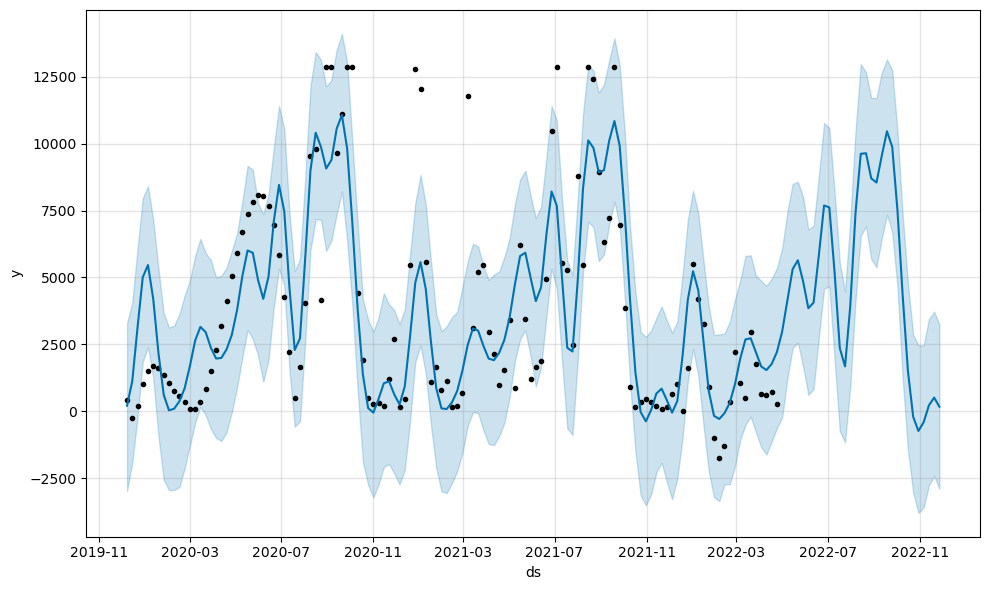

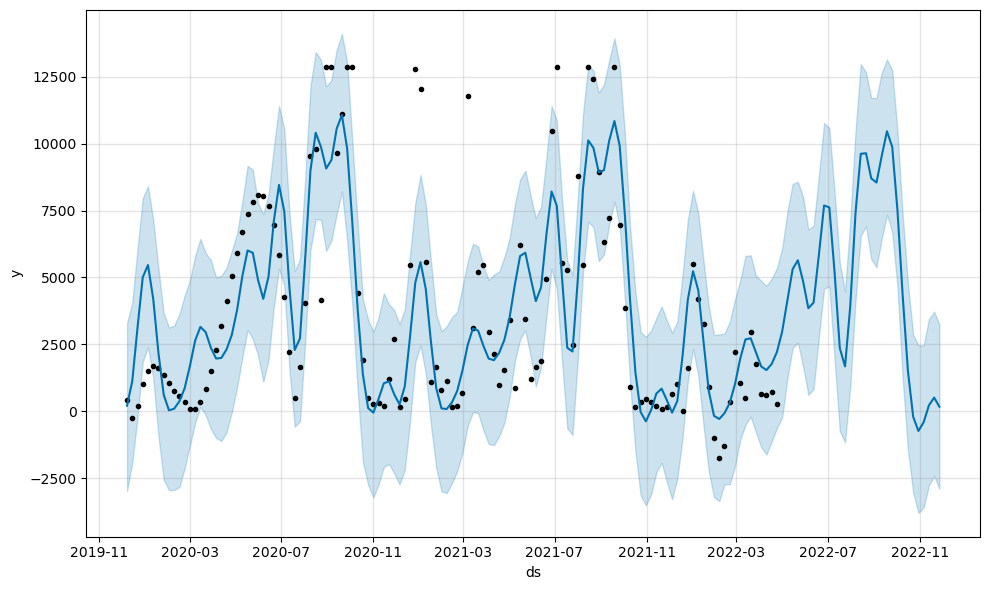

In [253]:
from prophet import Prophet
t1=d7.reset_index(level=0)
t1
t1.rename(columns = {'index':'ds','QUANTITY':'y'}, inplace = True)
m = Prophet(yearly_seasonality=True)
m.fit(t1.iloc[:125,:])
future = m.make_future_dataframe(periods=31, freq='w')
forecast = m.predict(future)
m.plot(forecast)


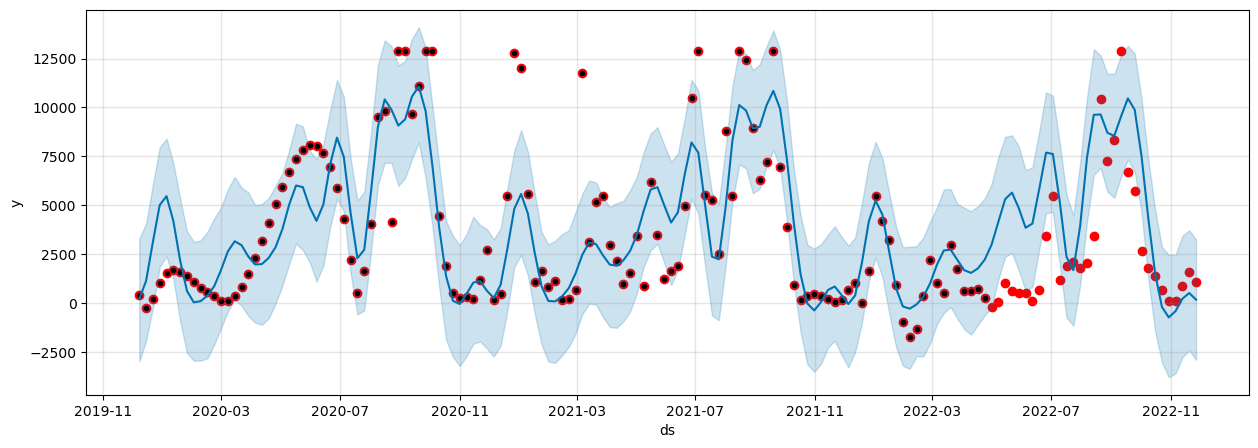

In [254]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(t1.ds, t1.y, color='r')
fig = m.plot(forecast, ax=ax)

In [255]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(d7.iloc[125:,0:],forecast['yhat'].iloc[125:]))

5.6555383606345915


In [256]:
d8

QUANTITY
2019-12-08   400.000000
2019-12-15  4138.626087
2019-12-22   200.000000
2019-12-29  1000.000000
2020-01-05  4138.626087
...                 ...
2022-10-30  4138.626087
2022-11-06   100.000000
2022-11-13   875.000000
2022-11-20  1600.000000
2022-11-27  1090.000000

[156 rows x 1 columns]

18:40:28 - cmdstanpy - INFO - Chain [1] start processing
18:40:28 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  dates = pd.date_range(
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetim

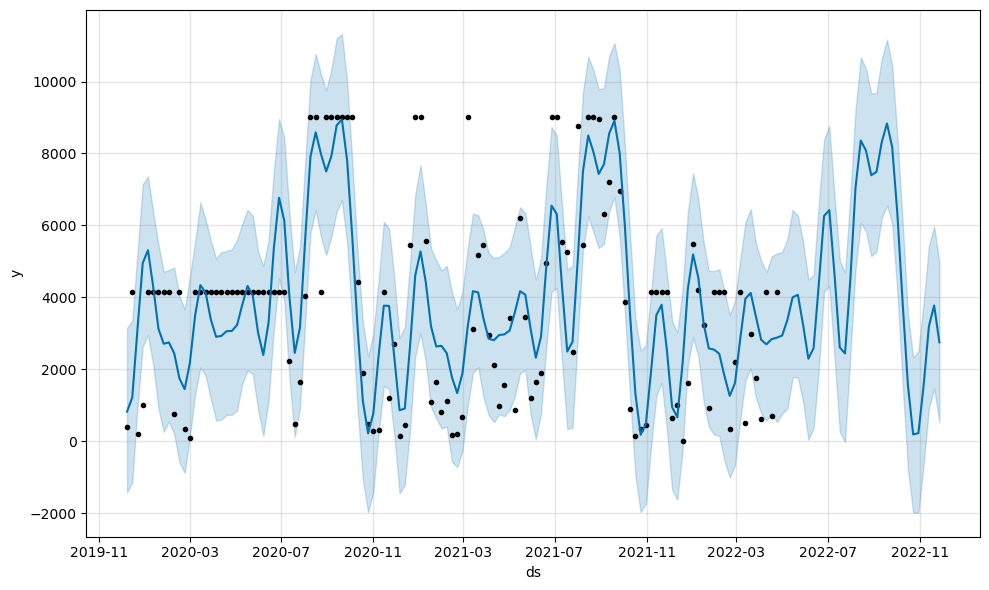

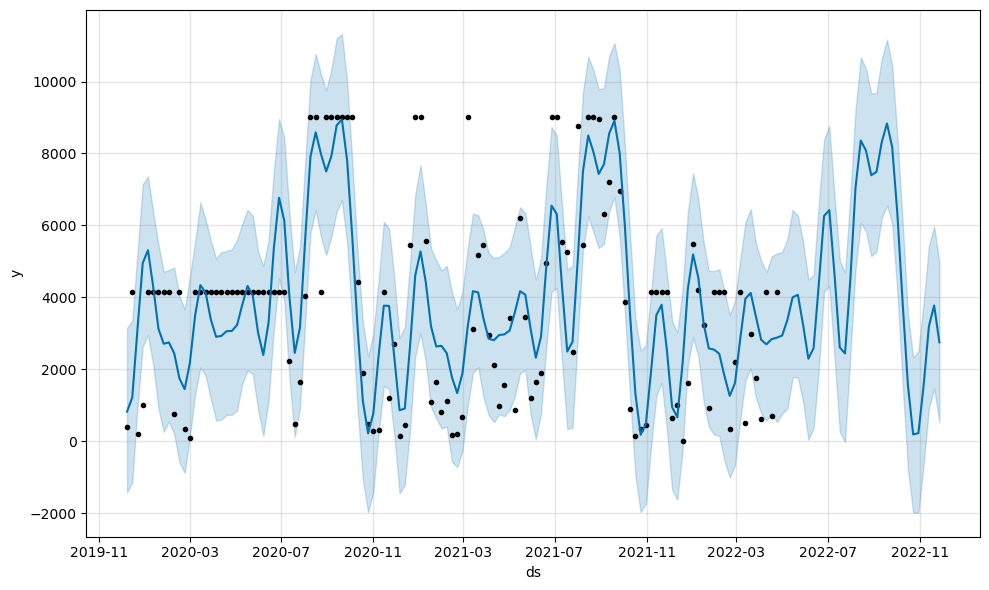

In [257]:
from prophet import Prophet
t1=d8.reset_index(level=0)
t1
t1.rename(columns = {'index':'ds','QUANTITY':'y'}, inplace = True)
m = Prophet(yearly_seasonality=True)
m.fit(t1.iloc[:125,:])
future = m.make_future_dataframe(periods=31, freq='w')
forecast = m.predict(future)
m.plot(forecast)

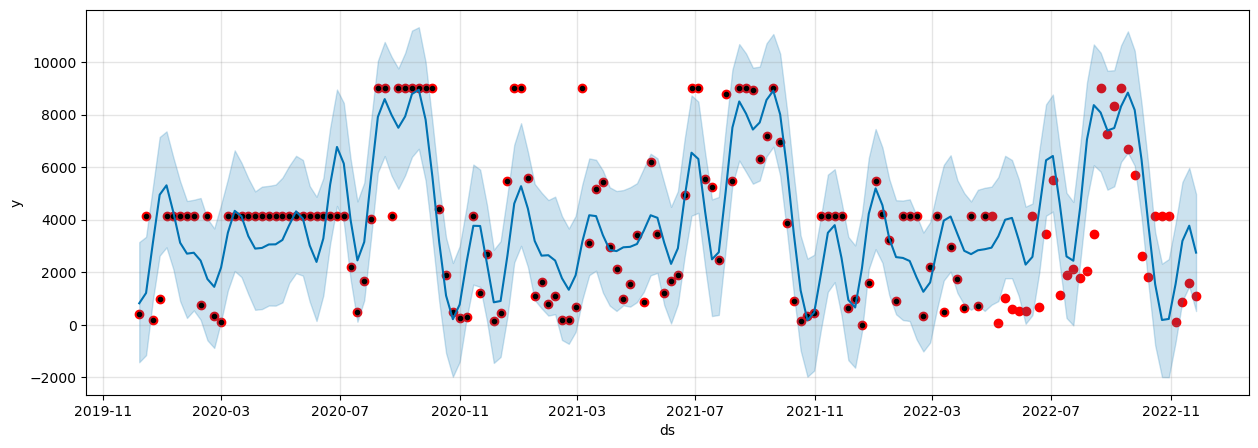

In [258]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(t1.ds, t1.y, color='r')
fig = m.plot(forecast, ax=ax)

In [259]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(d8.iloc[125:,0:],forecast['yhat'].iloc[125:]))

3.4480538712495776


# seasonal and trend decomposition using loess

In [260]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA

In [261]:
stl_res = STL(d1).fit()

Text(0, 0.5, 'Residual Component')

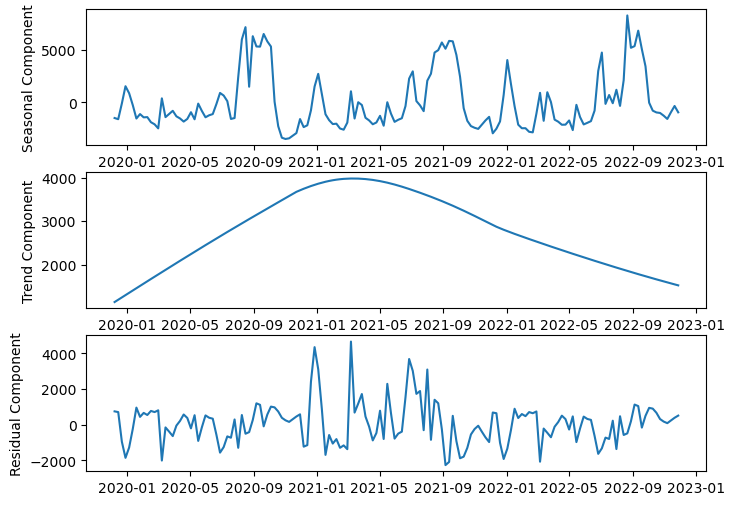

In [262]:
fig, ax = plt.subplots(3, 1, figsize=(8, 6))
ax[0].plot(stl_res.seasonal)
ax[0].set_ylabel("Seasonal Component")
ax[1].plot(stl_res.trend)
ax[1].set_ylabel("Trend Component")
ax[2].plot(stl_res.resid)
ax[2].set_ylabel("Residual Component")

In [263]:
tr = d1.iloc[:125,:]
tt = d1.iloc[125:,:]
model = ARIMA(stl_res.trend[:125], order=(1,0,3))
model_fit = model.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [264]:
trend_pred = model_fit.predict(start=125, end=155)

In [265]:
trend_pred

2022-05-01    2284.175271
2022-05-08    2271.286262
2022-05-15    2268.696649
2022-05-22    2269.318728
2022-05-29    2269.940268
2022-06-05    2270.561267
2022-06-12    2271.181727
2022-06-19    2271.801647
2022-06-26    2272.421030
2022-07-03    2273.039874
2022-07-10    2273.658181
2022-07-17    2274.275951
2022-07-24    2274.893184
2022-07-31    2275.509881
2022-08-07    2276.126042
2022-08-14    2276.741668
2022-08-21    2277.356760
2022-08-28    2277.971317
2022-09-04    2278.585340
2022-09-11    2279.198830
2022-09-18    2279.811787
2022-09-25    2280.424211
2022-10-02    2281.036104
2022-10-09    2281.647465
2022-10-16    2282.258295
2022-10-23    2282.868594
2022-10-30    2283.478363
2022-11-06    2284.087603
2022-11-13    2284.696314
2022-11-20    2285.304495
2022-11-27    2285.912149
Freq: W-SUN, Name: predicted_mean, dtype: float64

In [266]:
seasonal_pred = stl_res.seasonal[125:156]

In [267]:
seasonal_pred

2022-05-01   -1729.755273
2022-05-08   -2652.258328
2022-05-15    -231.695478
2022-05-22   -1397.845739
2022-05-29   -2108.681973
2022-06-05   -1958.002652
2022-06-12   -1794.014204
2022-06-19    -783.291169
2022-06-26    3011.682940
2022-07-03    4776.696252
2022-07-10    -140.944496
2022-07-17     710.265248
2022-07-24     -76.862800
2022-07-31    1211.083719
2022-08-07    -335.082370
2022-08-14    2129.191891
2022-08-21    8333.414330
2022-08-28    5235.244220
2022-09-04    5394.858104
2022-09-11    6877.532315
2022-09-18    5099.785846
2022-09-25    3464.153662
2022-10-02     -25.196320
2022-10-09    -790.109360
2022-10-16    -960.436907
2022-10-23   -1010.214809
2022-10-30   -1270.006481
2022-11-06   -1584.305575
2022-11-13    -941.322821
2022-11-20    -341.005303
2022-11-27    -949.865425
Freq: W-SUN, Name: season, dtype: float64

In [268]:
y_pred = trend_pred + seasonal_pred

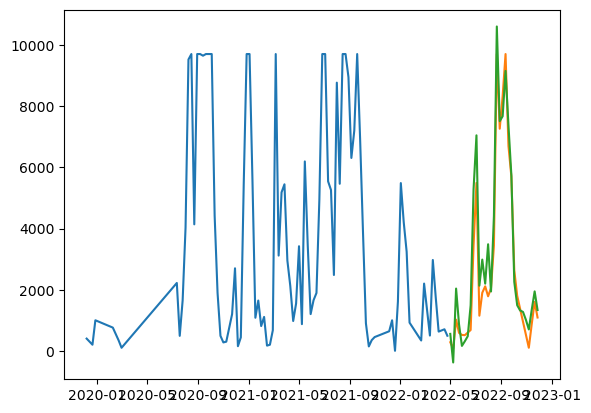

In [269]:
plt.plot(tr.index, tr, label="Train")
plt.plot(tt.index, tt, label="Test")
plt.plot(y_pred.index, y_pred, label="Forecast")

In [270]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(d1.iloc[125:,0:],y_pred))

0.7709326509100858


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


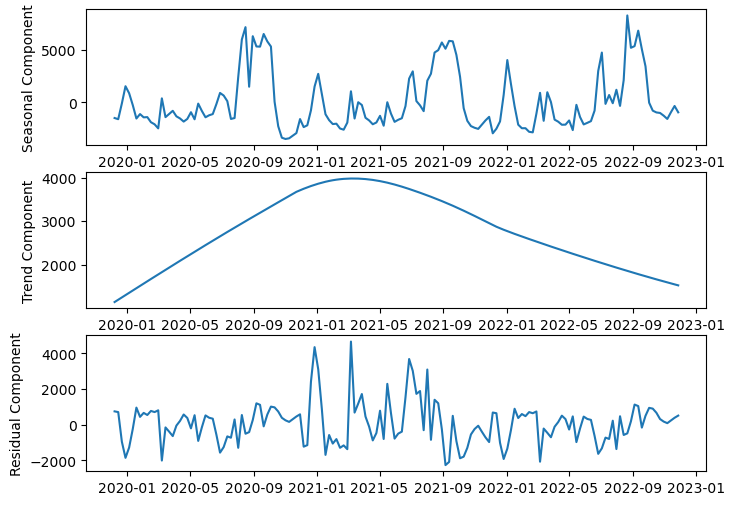

In [271]:
stl_res = STL(d2).fit()
fig, ax = plt.subplots(3, 1, figsize=(8, 6))
ax[0].plot(stl_res.seasonal)
ax[0].set_ylabel("Seasonal Component")
ax[1].plot(stl_res.trend)
ax[1].set_ylabel("Trend Component")
ax[2].plot(stl_res.resid)
ax[2].set_ylabel("Residual Component")
tr = d2.iloc[:125,:]
tt = d2.iloc[125:,:]
model = ARIMA(stl_res.trend[:125], order=(1,0,3))
model_fit = model.fit()
trend_pred = model_fit.predict(start=125, end=155)
trend_pred
seasonal_pred = stl_res.seasonal[125:156]
y_pred = trend_pred + seasonal_pred

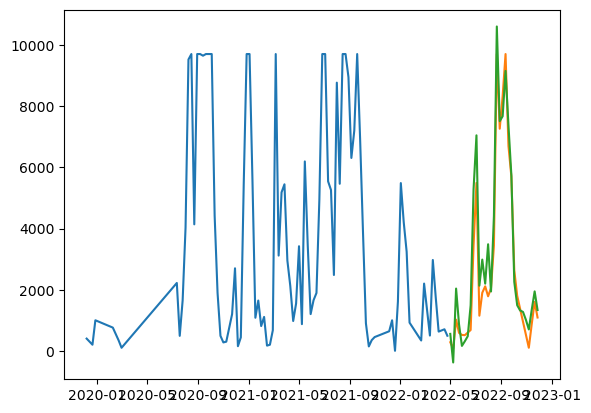

In [272]:
plt.plot(tr.index, tr, label="Train")
plt.plot(tt.index, tt, label="Test")
plt.plot(y_pred.index, y_pred, label="Forecast")

In [273]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(d2.iloc[125:,0:],y_pred))

0.7709326509100858


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


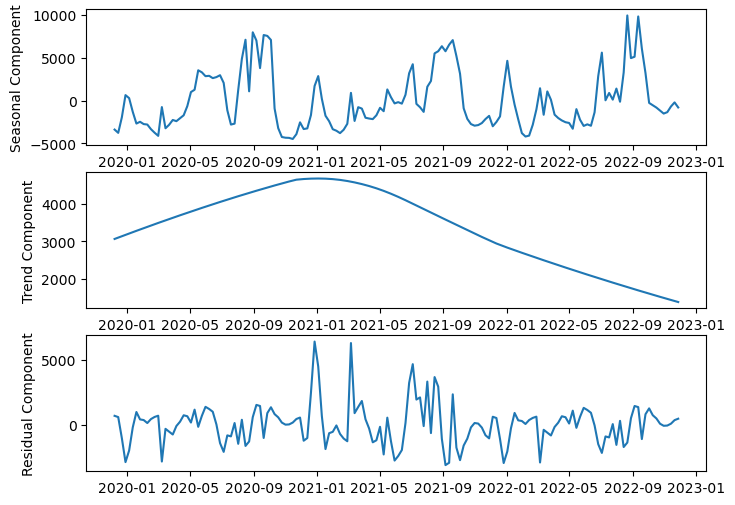

In [274]:
stl_res = STL(d3).fit()
fig, ax = plt.subplots(3, 1, figsize=(8, 6))
ax[0].plot(stl_res.seasonal)
ax[0].set_ylabel("Seasonal Component")
ax[1].plot(stl_res.trend)
ax[1].set_ylabel("Trend Component")
ax[2].plot(stl_res.resid)
ax[2].set_ylabel("Residual Component")
tr = d3.iloc[:125,:]
tt = d3.iloc[125:,:]
model = ARIMA(stl_res.trend[:125], order=(1,0,3))
model_fit = model.fit()
trend_pred = model_fit.predict(start=125, end=155)
trend_pred
seasonal_pred = stl_res.seasonal[125:156]
y_pred = trend_pred + seasonal_pred

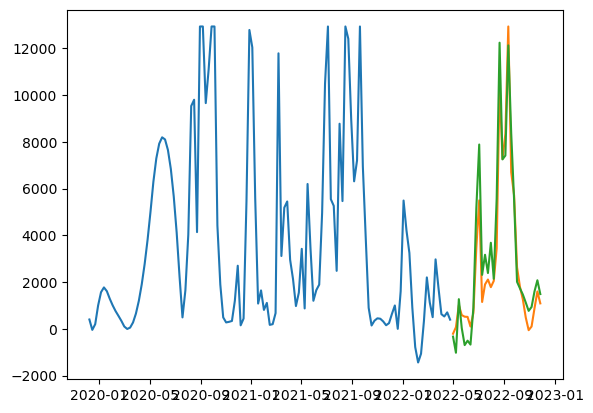

In [275]:
plt.plot(tr.index, tr, label="Train")
plt.plot(tt.index, tt, label="Test")
plt.plot(y_pred.index, y_pred, label="Forecast")

In [276]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(d3.iloc[125:,0:],y_pred))

1.970773000383473


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


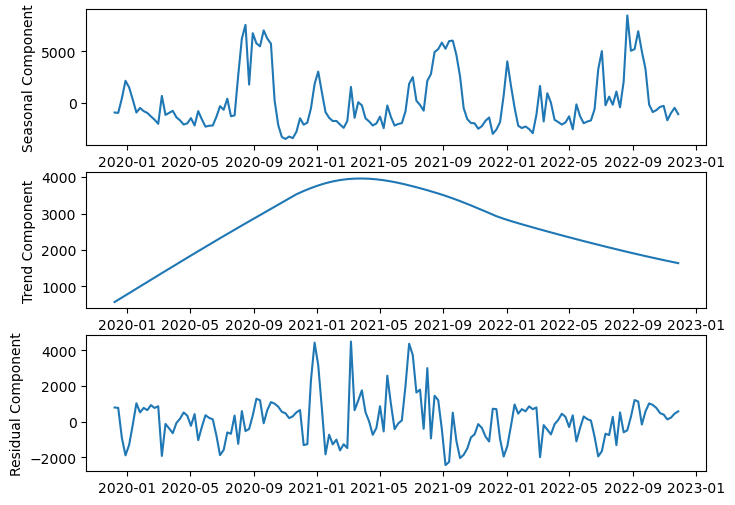

In [277]:
stl_res = STL(d4).fit()
fig, ax = plt.subplots(3, 1, figsize=(8, 6))
ax[0].plot(stl_res.seasonal)
ax[0].set_ylabel("Seasonal Component")
ax[1].plot(stl_res.trend)
ax[1].set_ylabel("Trend Component")
ax[2].plot(stl_res.resid)
ax[2].set_ylabel("Residual Component")
tr = d4.iloc[:125,:]
tt = d4.iloc[125:,:]
model = ARIMA(stl_res.trend[:125], order=(1,0,3))
model_fit = model.fit()
trend_pred = model_fit.predict(start=125, end=155)
trend_pred
seasonal_pred = stl_res.seasonal[125:156]
y_pred = trend_pred + seasonal_pred

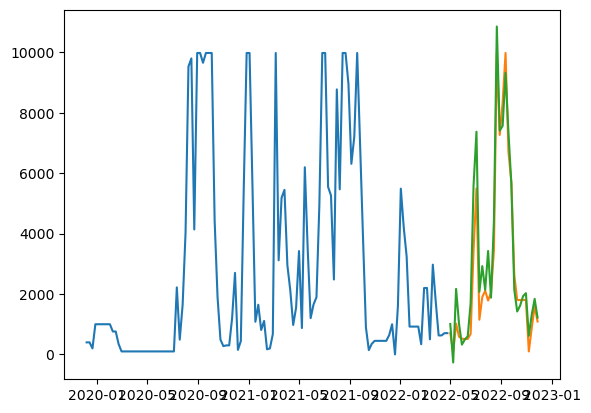

In [278]:
plt.plot(tr.index, tr, label="Train")
plt.plot(tt.index, tt, label="Test")
plt.plot(y_pred.index, y_pred, label="Forecast")

In [279]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(d4.iloc[125:,0:],y_pred))

0.6386611684819843


#Adaptive exponential smoothing

In [280]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

def adaptive_exponential_smoothing(series, alpha=0.5, beta=0.5):
    predicted_values = []
    level = series[0]
    trend = 0
    
    for i in range(len(series)):
        if i == 0:
            predicted_values.append(series[0])
        else:
            last_level = level
            last_trend = trend
            level = alpha*series[i] + (1-alpha)*(level+trend)
            trend = beta*(level-last_level) + (1-beta)*last_trend
            predicted_values.append(level+trend)
    
    return predicted_values


In [281]:
d1

QUANTITY
2019-12-08     400.0
2019-12-15     300.0
2019-12-22     200.0
2019-12-29    1000.0
2020-01-05     960.0
...              ...
2022-10-30     525.5
2022-11-06     100.0
2022-11-13     875.0
2022-11-20    1600.0
2022-11-27    1090.0

[156 rows x 1 columns]

In [282]:
alpha = 0.5
beta = 0.5
aes_forecast = adaptive_exponential_smoothing(d1['QUANTITY'], alpha, beta)

/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/2734988739.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  level = series[0]
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/2734988739.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_values.append(series[0])
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/2734988739.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

In [283]:
aes_forecast

[400.0,
 325.0,
 206.25,
 745.3125,
 1048.515625,
 1147.98828125,
 1110.7275390625,
 1004.415283203125,
 880.1553344726562,
 767.9865264892578,
 552.4054908752441,
 286.51360034942627,
 -13.060745000839233,
 -50.898520899446396,
 79.48616874453266,
 289.2806555909154,
 514.2261561690094,
 718.405525310541,
 889.0517232905137,
 1028.164523036819,
 1144.6271605718193,
 1248.5437944595228,
 1348.1030048937569,
 1448.488437834803,
 1552.0853606360993,
 1659.2835345093015,
 1769.3775272922614,
 1881.2906681764653,
 1994.0298347323455,
 2106.8919593271994,
 2219.494768634932,
 2331.7119548142755,
 1062.3925592003784,
 1154.6347215933354,
 3111.0971223914803,
 8443.054042192682,
 11515.112741545112,
 8421.301405835049,
 9981.914136521256,
 10694.023217734046,
 10763.259453906927,
 10561.406458516636,
 10247.40959619233,
 9955.840015982096,
 5783.032721881455,
 1462.6208943607703,
 -1644.240242989764,
 -2825.3607509175904,
 -2622.0808171521057,
 -1452.4206459813372,
 20.514601099381423,
 2176.

In [284]:
len(d1['QUANTITY'])

156

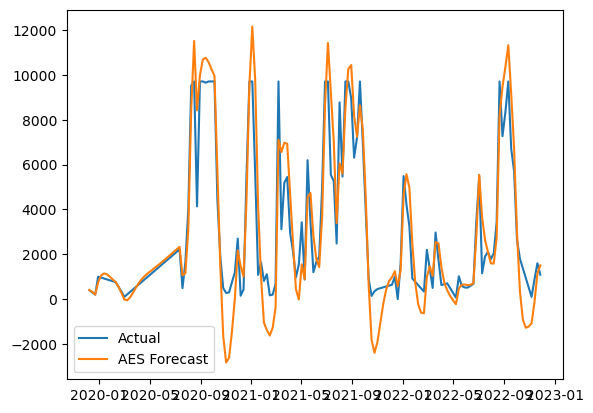

In [285]:
plt.plot(d1.index, d1['QUANTITY'], label='Actual')
plt.plot(d1.index, aes_forecast, label='AES Forecast')
plt.legend()
plt.show()

In [286]:
print(mean_absolute_percentage_error(d1.iloc[:,0:],aes_forecast))

4.73403142159474


/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/2734988739.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  level = series[0]
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/2734988739.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_values.append(series[0])
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/2734988739.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

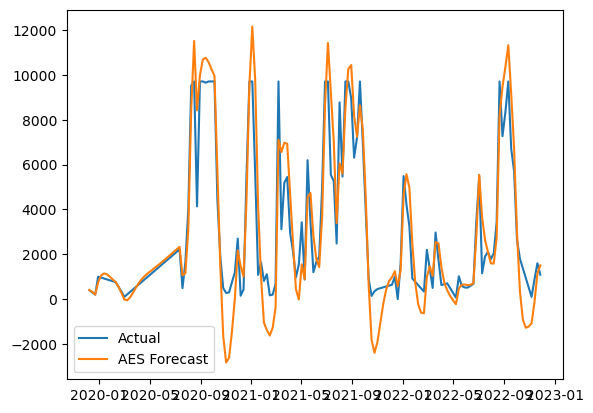

4.73403142159474


In [287]:
alpha = 0.5
beta = 0.5
aes_forecast = adaptive_exponential_smoothing(d2['QUANTITY'], alpha, beta)
plt.plot(d2.index, d2['QUANTITY'], label='Actual')
plt.plot(d2.index, aes_forecast, label='AES Forecast')
plt.legend()
plt.show()
print(mean_absolute_percentage_error(d2.iloc[:,0:],aes_forecast))

/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/2734988739.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  level = series[0]
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/2734988739.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_values.append(series[0])
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/2734988739.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

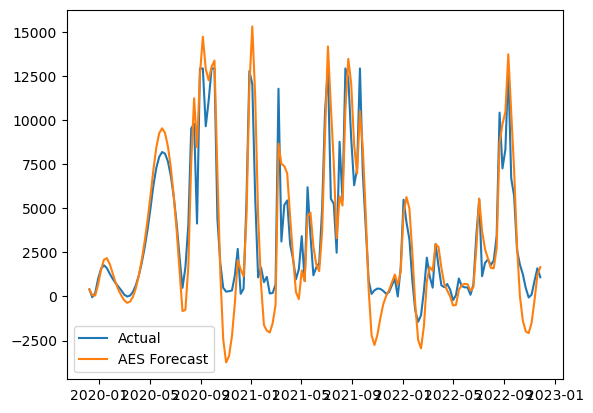

6.3948724526978316


In [288]:
alpha = 0.5
beta = 0.5
aes_forecast = adaptive_exponential_smoothing(d3['QUANTITY'], alpha, beta)
plt.plot(d3.index, d3['QUANTITY'], label='Actual')
plt.plot(d3.index, aes_forecast, label='AES Forecast')
plt.legend()
plt.show()
print(mean_absolute_percentage_error(d3.iloc[:,0:],aes_forecast))

/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/2734988739.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  level = series[0]
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/2734988739.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_values.append(series[0])
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/2734988739.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

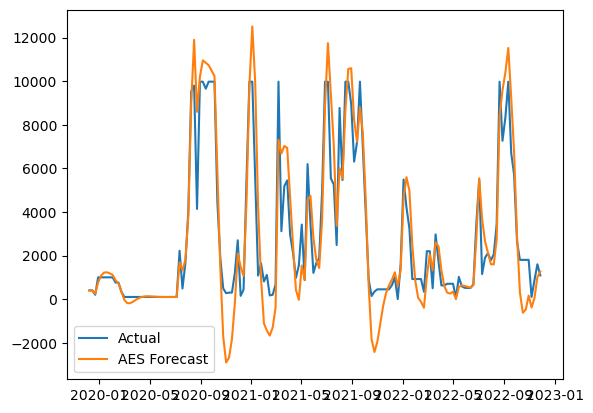

4.876322963744751


In [289]:
alpha = 0.5
beta = 0.5
aes_forecast = adaptive_exponential_smoothing(d4['QUANTITY'], alpha, beta)
plt.plot(d4.index, d4['QUANTITY'], label='Actual')
plt.plot(d4.index, aes_forecast, label='AES Forecast')
plt.legend()
plt.show()
print(mean_absolute_percentage_error(d4.iloc[:,0:],aes_forecast))

/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/2734988739.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  level = series[0]
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/2734988739.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_values.append(series[0])
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/2734988739.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

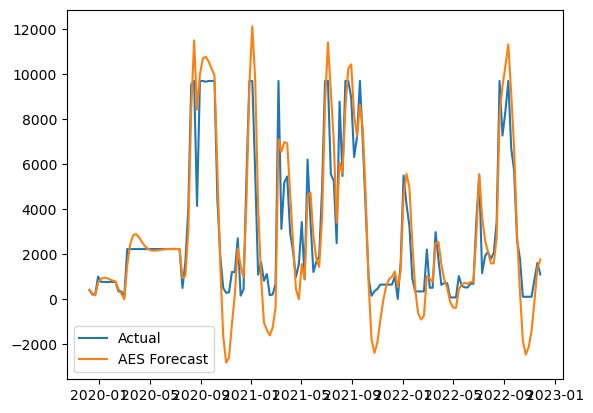

4.985901593782089


In [290]:
alpha = 0.5
beta = 0.5
aes_forecast = adaptive_exponential_smoothing(d5['QUANTITY'], alpha, beta)
plt.plot(d5.index, d5['QUANTITY'], label='Actual')
plt.plot(d5.index, aes_forecast, label='AES Forecast')
plt.legend()
plt.show()
print(mean_absolute_percentage_error(d5.iloc[:,0:],aes_forecast))

/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/2734988739.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  level = series[0]
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/2734988739.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_values.append(series[0])
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/2734988739.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

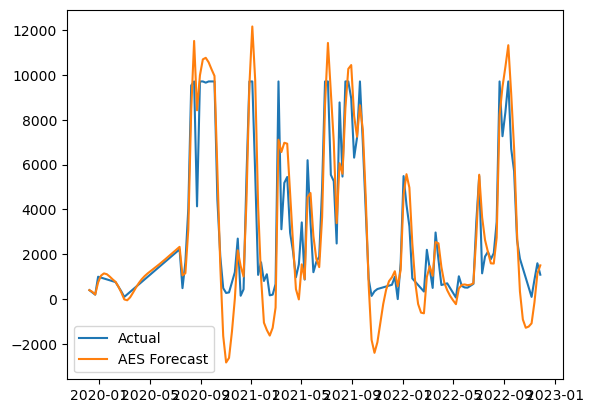

4.733905026470769


In [291]:
alpha = 0.5
beta = 0.5
aes_forecast = adaptive_exponential_smoothing(d6['QUANTITY'], alpha, beta)
plt.plot(d6.index, d6['QUANTITY'], label='Actual')
plt.plot(d6.index, aes_forecast, label='AES Forecast')
plt.legend()
plt.show()
print(mean_absolute_percentage_error(d6.iloc[:,0:],aes_forecast))

/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/2734988739.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  level = series[0]
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/2734988739.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_values.append(series[0])
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/2734988739.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

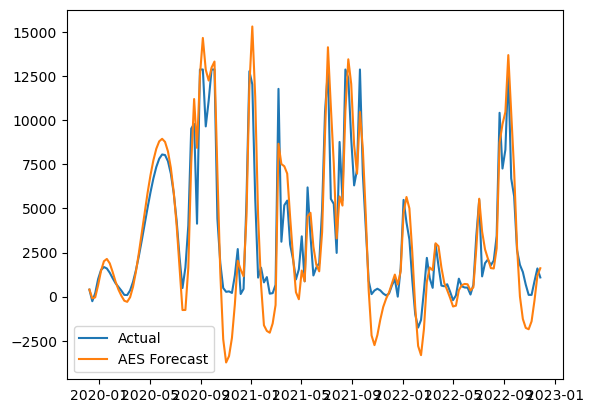

6.013824725223403


In [292]:
alpha = 0.5
beta = 0.5
aes_forecast = adaptive_exponential_smoothing(d7['QUANTITY'], alpha, beta)
plt.plot(d7.index, d7['QUANTITY'], label='Actual')
plt.plot(d7.index, aes_forecast, label='AES Forecast')
plt.legend()
plt.show()
print(mean_absolute_percentage_error(d7.iloc[:,0:],aes_forecast))

/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/2734988739.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  level = series[0]
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/2734988739.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_values.append(series[0])
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_5703/2734988739.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

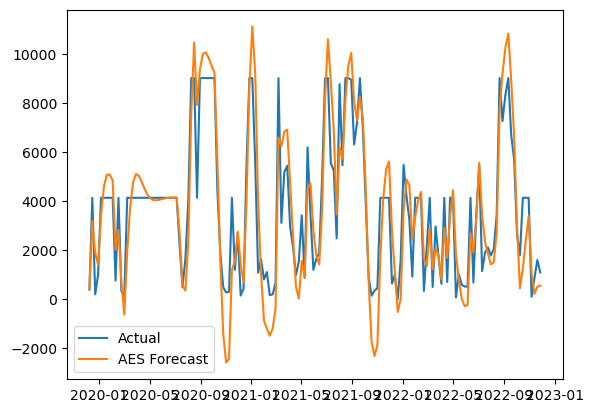

4.540024844396341


In [293]:
alpha = 0.5
beta = 0.5
aes_forecast = adaptive_exponential_smoothing(d8['QUANTITY'], alpha, beta)
plt.plot(d8.index, d8['QUANTITY'], label='Actual')
plt.plot(d8.index, aes_forecast, label='AES Forecast')
plt.legend()
plt.show()
print(mean_absolute_percentage_error(d8.iloc[:,0:],aes_forecast))

	                              Arima	   Sarima	  moving average Holt-winters	Prophet
# Linear interpolation	        3.657679301	3.755838901	4.196114982	2.056223904	2.664038427
# Linear interpolation backward	3.650543101	2.349694068	4.196114982	2.056223904	2.664038427
# Polynomial interpolation	    7.284600247	5.637230494	3.899291404	4.158740885	5.805004223
# forward imputation	        3.163323789	2.100710991	3.899291404	2.039505129	2.493684427
# BACK Fill imputation	        7.730141016	5.001643562	8.068196909	4.401054864	3.976557041
# SPLINE imputation	            3.650366893	2.349352761	4.19598282	2.056126179	2.66292602
# Cubic imputation	            6.480080255	4.832165039	5.885626778	3.206348715	5.655538361
# KNN Imputation	            3.99327427	3.739830933	4.02487855	4.140844104	3.448053871